In [1]:
import sklearn
import pandas as pd
import numpy as np
import nltk
import sklearn
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import train_test_split
import re
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import pickle
from wordcloud import WordCloud

In [2]:
full_reviewed_data_drop = pd.read_csv('../../input_data/full_datasets/fully_hand_labelled_texts.csv')

In [3]:
full_reviewed_data_drop.text = full_reviewed_data_drop.text.str.replace("_x000D_\n", "\t")


In [4]:
indices = pd.read_csv('medrobertanl-haga_smoking_predictions.csv', delimiter=';')

In [5]:
test_set = full_reviewed_data_drop.loc[indices['index']]

In [6]:
train_set = full_reviewed_data_drop.loc[~full_reviewed_data_drop.index.isin(test_set.index)]

In [7]:
train_set

,Unnamed: 0,label_id,text,Roken,Alcohol,Drugs
0,0,1.0,Beloop: \tPatiÃ«nte heeft 10 minuten van te vo...,Niets gevonden,Niets gevonden,Niets gevonden
1,1,1.0,Beloop: \tG5P4 36 wkGrav 1e lijnALL geen Hb Pa...,Niets gevonden,Niets gevonden,Niets gevonden
3,3,1.0,Beleid: \tAlgemeen: Dagopname voor 3x PC a 2....,Niets gevonden,Niets gevonden,Niets gevonden
4,4,1.0,Anamnese: \t34W4D,Niets gevonden,Niets gevonden,Niets gevonden
5,5,1.0,"Conclusie: \tMw gebeld, vertelde dat het goed ...",Niets gevonden,Niets gevonden,Niets gevonden
...,...,...,...,...,...,...
4694,94,2.0,Beloop: \tVOORBEREIDING:G3P1 // AD 39+0 // B P...,Geen gebruiker,Geen gebruiker,Geen gebruiker
4695,95,2.0,Beloop: \tCONSULTENKAMERGezien door co-ass Y. ...,Geen gebruiker,Geen gebruiker,Geen gebruiker
4696,96,2.0,Reden van komst / Verwijzing: \tReden verwijzi...,Geen gebruiker,Geen gebruiker,Geen gebruiker
4697,97,2.0,"Beloop: \tMR CPG7P4M4 // MI: 4x sectio ia, 1x...",Geen gebruiker,Geen gebruiker,Geen gebruiker


In [8]:
Corpus = full_reviewed_data_drop.copy()

In [23]:
Corpus['text'] = Corpus['text'].astype(str)

# Roken

## Experiment 1

In [24]:
rook_corpus = Corpus[["text", "Roken"]].rename(columns={"Roken":"label"})

In [25]:
rook_corpus

,text,label
0,Beloop: \tPatiÃ«nte heeft 10 minuten van te vo...,Niets gevonden
1,Beloop: \tG5P4 36 wkGrav 1e lijnALL geen Hb Pa...,Niets gevonden
2,Conclusie: \tNormale nacontrole. Kijkt goed te...,Niets gevonden
3,Beleid: \tAlgemeen: Dagopname voor 3x PC a 2....,Niets gevonden
4,Anamnese: \t34W4D,Niets gevonden
...,...,...
4695,Beloop: \tCONSULTENKAMERGezien door co-ass Y. ...,Geen gebruiker
4696,Reden van komst / Verwijzing: \tReden verwijzi...,Geen gebruiker
4697,"Beloop: \tMR CPG7P4M4 // MI: 4x sectio ia, 1x...",Geen gebruiker
4698,Reden van komst / Verwijzing: \tReden van koms...,Geen gebruiker


In [26]:
rook_corpus['text'] = rook_corpus['text'].str.replace('\t',' ')
rook_corpus.drop_duplicates(inplace=True)
rook_corpus['text'] = rook_corpus['text'].astype(str)

In [27]:
stemmer = SnowballStemmer("dutch")
rook_corpus['text'] = rook_corpus['text'].str.lower()
rook_corpus['text'] = [stemmer.stem(text) for text in rook_corpus['text']]
rook_corpus = rook_corpus.drop(rook_corpus[rook_corpus.label == '--'].index)
rook_corpus_backup = rook_corpus.copy()

In [28]:
stopwords_filter = ['niet', 'niets', 'geen', 'zonder']
with open('../../helping_files/stopwords.txt') as file:
    full_stopwords = [line.rstrip() for line in file]
    filtered_stopwords = [item for item in full_stopwords if item not in stopwords_filter]

In [29]:
test_set = rook_corpus.loc[indices['index']]

In [30]:
train_set = rook_corpus.loc[~rook_corpus.index.isin(test_set.index)]

In [31]:
train_set

,text,label
0,beloop: patiã«nte heeft 10 minuten van te vor...,Niets gevonden
1,beloop: g5p4 36 wkgrav 1e lijnall geen hb pat...,Niets gevonden
3,beleid: algemeen: dagopname voor 3x pc a 2.5...,Niets gevonden
4,anamnese: 34w4d,Niets gevonden
5,"conclusie: mw gebeld, vertelde dat het goed g...",Niets gevonden
...,...,...
4694,beloop: voorbereiding:g3p1 // ad 39+0 // b po...,Geen gebruiker
4695,beloop: consultenkamergezien door co-ass y. t...,Geen gebruiker
4696,reden van komst / verwijzing: reden verwijzin...,Geen gebruiker
4697,"beloop: mr cpg7p4m4 // mi: 4x sectio ia, 1x ...",Geen gebruiker


In [32]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.44, NNZs: 4963, Bias: 0.000000, T: 2256, Avg. loss: 0.380919
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.92, NNZs: 2591, Bias: 0.000000, T: 4512, Avg. loss: 0.257075
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 39.70, NNZs: 1854, Bias: 0.000000, T: 6768, Avg. loss: 0.221490
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 45.33, NNZs: 1535, Bias: 0.000000, T: 9024, Avg. loss: 0.201711
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 50.14, NNZs: 1328, Bias: 0.000000, T: 11280, Avg. loss: 0.188065
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 54.41, NNZs: 1198, Bias: 0.000000, T: 13536, Avg. loss: 0.178112
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 55.16, NNZs: 1137, Bias: 0.000000, T: 15792, Avg. loss: 0.171522
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 55.90, NNZs: 1106, Bias: 0.000000, T: 18048, Avg. loss: 0.170332
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 56.64, NNZs: 1082, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.549 total time=   1.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.15, NNZs: 5069, Bias: 0.000000, T: 2256, Avg. loss: 0.393031
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.44, NNZs: 2565, Bias: 0.000000, T: 4512, Avg. loss: 0.272809
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 39.35, NNZs: 1931, Bias: 0.000000, T: 6768, Avg. loss: 0.237768
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 44.98, NNZs: 1610, Bias: 0.000000, T: 9024, Avg. loss: 0.217403
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 49.84, NNZs: 1412, Bias: 0.000000, T: 11280, Avg. loss: 0.203140
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 54.24, NNZs: 1260, Bias: 0.000000, T: 13536, Avg. loss: 0.192888
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 55.01, NNZs: 1187, Bias: 0.000000, T: 15792, Avg. loss: 0.185897
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 55.77, NNZs: 1166, Bias: 0.000000, T: 18048, Avg. loss: 0.184605
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 56.51, NNZs: 1150, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.626 total time=   1.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.38, NNZs: 5035, Bias: 0.000000, T: 2256, Avg. loss: 0.389871
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.56, NNZs: 2518, Bias: 0.000000, T: 4512, Avg. loss: 0.269872
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 39.38, NNZs: 1913, Bias: 0.000000, T: 6768, Avg. loss: 0.235908
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 44.96, NNZs: 1572, Bias: 0.000000, T: 9024, Avg. loss: 0.216051
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 49.77, NNZs: 1395, Bias: 0.000000, T: 11280, Avg. loss: 0.202296
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 54.08, NNZs: 1258, Bias: 0.000000, T: 13536, Avg. loss: 0.192163
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 54.82, NNZs: 1183, Bias: 0.000000, T: 15792, Avg. loss: 0.185447
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 55.56, NNZs: 1158, Bias: 0.000000, T: 18048, Avg. loss: 0.184427
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 56.28, NNZs: 1148, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.649 total time=   1.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.65, NNZs: 5224, Bias: 0.000000, T: 2256, Avg. loss: 0.380205
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.70, NNZs: 2586, Bias: 0.000000, T: 4512, Avg. loss: 0.260202
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 39.55, NNZs: 1914, Bias: 0.000000, T: 6768, Avg. loss: 0.225809
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 45.20, NNZs: 1573, Bias: 0.000000, T: 9024, Avg. loss: 0.206057
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 49.99, NNZs: 1364, Bias: 0.000000, T: 11280, Avg. loss: 0.192469
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 54.31, NNZs: 1210, Bias: 0.000000, T: 13536, Avg. loss: 0.182812
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 55.05, NNZs: 1154, Bias: 0.000000, T: 15792, Avg. loss: 0.175754
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 55.79, NNZs: 1136, Bias: 0.000000, T: 18048, Avg. loss: 0.174749
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 56.51, NNZs: 1100, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.593 total time=   1.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 23.16, NNZs: 5013, Bias: 0.000000, T: 2256, Avg. loss: 0.390913
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.43, NNZs: 2571, Bias: 0.000000, T: 4512, Avg. loss: 0.271505
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 39.21, NNZs: 1931, Bias: 0.000000, T: 6768, Avg. loss: 0.236849
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 44.85, NNZs: 1533, Bias: 0.000000, T: 9024, Avg. loss: 0.216533
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 49.67, NNZs: 1322, Bias: 0.000000, T: 11280, Avg. loss: 0.202564
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 54.00, NNZs: 1183, Bias: 0.000000, T: 13536, Avg. loss: 0.192371
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 54.78, NNZs: 1126, Bias: 0.000000, T: 15792, Avg. loss: 0.185541
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 55.54, NNZs: 1110, Bias: 0.000000, T: 18048, Avg. loss: 0.184218
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 56.28, NNZs: 1092, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Norm: 59.92, NNZs: 1096, Bias: 0.000000, T: 45120, Avg. loss: 0.168126
Total training time: 0.08 seconds.
[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.650 total time=   1.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 129601285387603.66, NNZs: 12896, Bias: 0.000000, T: 2256, Avg. loss: 2679321727511991500668928.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 83553662237219.39, NNZs: 12898, Bias: 0.000000, T: 4512, Avg. loss: 5963598203761059516383232.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 58215279776672.65, NNZs: 12898, Bias: 0.000000, T: 6768, Avg. loss: 2149670939892447749079040.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 42636578916650.61, NNZs: 12898, Bias: 0.000000, T: 9024, Avg. loss: 925956764668081324687360.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 31603125622082.79, NNZs: 12898, Bias: 0.000000, T: 11280, Avg. loss: 454855404101630267752448.000000
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 24007593559791.59, NNZs: 12898, Bias: 0.000000, T: 13536, Avg. loss: 220806907674073816367104.000000
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 127778156103177.31, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 129131613919610.88, NNZs: 12717, Bias: 0.000000, T: 2256, Avg. loss: 2799117296214975501565952.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 85817281100182.38, NNZs: 12717, Bias: 0.000000, T: 4512, Avg. loss: 5820118283143014676168704.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 59790275312887.24, NNZs: 12717, Bias: 0.000000, T: 6768, Avg. loss: 2317610525913137067065344.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 43682586035637.78, NNZs: 12717, Bias: 0.000000, T: 9024, Avg. loss: 989380565819587894968320.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 32593155085827.16, NNZs: 12717, Bias: 0.000000, T: 11280, Avg. loss: 476690485507326753112064.000000
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 24676461646134.09, NNZs: 12717, Bias: 0.000000, T: 13536, Avg. loss: 238843345069914474938368.000000
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 132265979431939.00, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 120531382668769.45, NNZs: 13143, Bias: 0.000000, T: 2256, Avg. loss: 2182651184528505629048832.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 78670365096867.72, NNZs: 13143, Bias: 0.000000, T: 4512, Avg. loss: 5216237036067638764109824.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 54190250009985.29, NNZs: 13143, Bias: 0.000000, T: 6768, Avg. loss: 1982282133708120216567808.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 39422357024919.84, NNZs: 13143, Bias: 0.000000, T: 9024, Avg. loss: 813432465519038485757952.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 29112791848889.59, NNZs: 13143, Bias: 0.000000, T: 11280, Avg. loss: 396228251926560757514240.000000
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 21722025270335.03, NNZs: 13143, Bias: 0.000000, T: 13536, Avg. loss: 200344152550098920800256.000000
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 128860219063171.22, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 114433093760032.41, NNZs: 13618, Bias: 0.000000, T: 2256, Avg. loss: 1900733399140429488717824.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 74629569786210.61, NNZs: 13618, Bias: 0.000000, T: 4512, Avg. loss: 4840614778028044020875264.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 50275192139326.80, NNZs: 13618, Bias: 0.000000, T: 6768, Avg. loss: 1816811322003461836374016.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 35740393740014.23, NNZs: 13618, Bias: 0.000000, T: 9024, Avg. loss: 720182834500364465602560.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 25986758981906.52, NNZs: 13618, Bias: 0.000000, T: 11280, Avg. loss: 333268795794861624131584.000000
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 19599076447364.38, NNZs: 13618, Bias: 0.000000, T: 13536, Avg. loss: 151864266339316104429568.000000
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 127900788686109.03, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 124409239880952.70, NNZs: 13465, Bias: 0.000000, T: 2256, Avg. loss: 2356747052498280872148992.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 81864182149230.03, NNZs: 13465, Bias: 0.000000, T: 4512, Avg. loss: 5414918379169723715682304.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 56854121071262.46, NNZs: 13465, Bias: 0.000000, T: 6768, Avg. loss: 2095270885898111802146816.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 41008006468574.98, NNZs: 13465, Bias: 0.000000, T: 9024, Avg. loss: 907134404938537990356992.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 30172146973543.06, NNZs: 13465, Bias: 0.000000, T: 11280, Avg. loss: 429541196408694316728320.000000
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 22611843121903.42, NNZs: 13465, Bias: 0.000000, T: 13536, Avg. loss: 207661415080468521418752.000000
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 126343860820005.92, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 38.07, NNZs: 9673, Bias: 0.000000, T: 2256, Avg. loss: 0.242309
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.44, NNZs: 4921, Bias: 0.000000, T: 4512, Avg. loss: 0.037537
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 48.97, NNZs: 3464, Bias: 0.000000, T: 6768, Avg. loss: 0.040268
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 53.51, NNZs: 2729, Bias: 0.000000, T: 9024, Avg. loss: 0.032546
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 57.54, NNZs: 2306, Bias: 0.000000, T: 11280, Avg. loss: 0.029855
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 61.16, NNZs: 2030, Bias: 0.000000, T: 13536, Avg. loss: 0.028765
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 35.30, NNZs: 8730, Bias: 0.000000, T: 2256, Avg. loss: 0.211304
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 40.69, NNZs: 4349, Bias: 0.000000, T: 4512, Avg. loss: 0.036879
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 45.95, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 39.21, NNZs: 10023, Bias: 0.000000, T: 2256, Avg. loss: 0.249784
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 44.39, NNZs: 5246, Bias: 0.000000, T: 4512, Avg. loss: 0.038717
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 49.87, NNZs: 3663, Bias: 0.000000, T: 6768, Avg. loss: 0.039173
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 54.73, NNZs: 3009, Bias: 0.000000, T: 9024, Avg. loss: 0.036272
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 58.91, NNZs: 2530, Bias: 0.000000, T: 11280, Avg. loss: 0.031905
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 62.60, NNZs: 2166, Bias: 0.000000, T: 13536, Avg. loss: 0.030317
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 36.34, NNZs: 9287, Bias: 0.000000, T: 2256, Avg. loss: 0.228724
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.19, NNZs: 4744, Bias: 0.000000, T: 4512, Avg. loss: 0.044135
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 47.48, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 39.24, NNZs: 10304, Bias: 0.000000, T: 2256, Avg. loss: 0.265387
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 45.01, NNZs: 5371, Bias: 0.000000, T: 4512, Avg. loss: 0.045836
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 50.65, NNZs: 3822, Bias: 0.000000, T: 6768, Avg. loss: 0.041369
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 55.45, NNZs: 3066, Bias: 0.000000, T: 9024, Avg. loss: 0.038052
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 59.69, NNZs: 2550, Bias: 0.000000, T: 11280, Avg. loss: 0.035602
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 63.51, NNZs: 2224, Bias: 0.000000, T: 13536, Avg. loss: 0.032471
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 36.58, NNZs: 9319, Bias: 0.000000, T: 2256, Avg. loss: 0.224680
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.99, NNZs: 4552, Bias: 0.000000, T: 4512, Avg. loss: 0.040861
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 47.47, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 38.01, NNZs: 10136, Bias: 0.000000, T: 2256, Avg. loss: 0.237250
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.45, NNZs: 5152, Bias: 0.000000, T: 4512, Avg. loss: 0.038283
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 49.10, NNZs: 3598, Bias: 0.000000, T: 6768, Avg. loss: 0.037862
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 53.66, NNZs: 2839, Bias: 0.000000, T: 9024, Avg. loss: 0.033495
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 57.82, NNZs: 2409, Bias: 0.000000, T: 11280, Avg. loss: 0.031696
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 61.53, NNZs: 2075, Bias: 0.000000, T: 13536, Avg. loss: 0.030126
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 35.30, NNZs: 9445, Bias: 0.000000, T: 2256, Avg. loss: 0.211882
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.26, NNZs: 4691, Bias: 0.000000, T: 4512, Avg. loss: 0.039713
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 46.63, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 39.19, NNZs: 10779, Bias: 0.000000, T: 2256, Avg. loss: 0.258709
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 45.05, NNZs: 5511, Bias: 0.000000, T: 4512, Avg. loss: 0.044043
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 50.55, NNZs: 3814, Bias: 0.000000, T: 6768, Avg. loss: 0.039071
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 55.49, NNZs: 2968, Bias: 0.000000, T: 9024, Avg. loss: 0.037516
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 59.67, NNZs: 2485, Bias: 0.000000, T: 11280, Avg. loss: 0.034420
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 63.42, NNZs: 2180, Bias: 0.000000, T: 13536, Avg. loss: 0.031094
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 36.05, NNZs: 9381, Bias: 0.000000, T: 2256, Avg. loss: 0.223322
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.60, NNZs: 4578, Bias: 0.000000, T: 4512, Avg. loss: 0.036463
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 47.18, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 16.97, NNZs: 6596, Bias: 0.000000, T: 2256, Avg. loss: 0.170875
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 21.91, NNZs: 4707, Bias: 0.000000, T: 4512, Avg. loss: 0.076292
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.34, NNZs: 3802, Bias: 0.000000, T: 6768, Avg. loss: 0.058598
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 28.36, NNZs: 3304, Bias: 0.000000, T: 9024, Avg. loss: 0.051062
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 30.93, NNZs: 2953, Bias: 0.000000, T: 11280, Avg. loss: 0.045683
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 33.25, NNZs: 2716, Bias: 0.000000, T: 13536, Avg. loss: 0.043129
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 24.42, NNZs: 9189, Bias: 0.000000, T: 2256, Avg. loss: 0.199222
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 26.12, NNZs: 5530, Bias: 0.000000, T: 4512, Avg. loss: 0.054784
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 30.14, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 17.30, NNZs: 6783, Bias: 0.000000, T: 2256, Avg. loss: 0.173333
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 21.86, NNZs: 4659, Bias: 0.000000, T: 4512, Avg. loss: 0.076547
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.55, NNZs: 3820, Bias: 0.000000, T: 6768, Avg. loss: 0.058085
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 28.55, NNZs: 3320, Bias: 0.000000, T: 9024, Avg. loss: 0.048775
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 31.15, NNZs: 2951, Bias: 0.000000, T: 11280, Avg. loss: 0.045399
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 33.42, NNZs: 2695, Bias: 0.000000, T: 13536, Avg. loss: 0.041797
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 24.90, NNZs: 9200, Bias: 0.000000, T: 2256, Avg. loss: 0.208305
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 26.99, NNZs: 5992, Bias: 0.000000, T: 4512, Avg. loss: 0.065658
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 30.84, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 17.37, NNZs: 6849, Bias: 0.000000, T: 2256, Avg. loss: 0.182140
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 22.12, NNZs: 4851, Bias: 0.000000, T: 4512, Avg. loss: 0.083370
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.92, NNZs: 3948, Bias: 0.000000, T: 6768, Avg. loss: 0.064143
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 29.11, NNZs: 3433, Bias: 0.000000, T: 9024, Avg. loss: 0.055379
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 31.77, NNZs: 3066, Bias: 0.000000, T: 11280, Avg. loss: 0.050195
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 34.19, NNZs: 2815, Bias: 0.000000, T: 13536, Avg. loss: 0.046708
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 25.46, NNZs: 9382, Bias: 0.000000, T: 2256, Avg. loss: 0.227534
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 27.83, NNZs: 6053, Bias: 0.000000, T: 4512, Avg. loss: 0.065590
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 31.98, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 17.19, NNZs: 7048, Bias: 0.000000, T: 2256, Avg. loss: 0.177114
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 22.32, NNZs: 4908, Bias: 0.000000, T: 4512, Avg. loss: 0.078138
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 26.07, NNZs: 3978, Bias: 0.000000, T: 6768, Avg. loss: 0.060203
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 29.12, NNZs: 3486, Bias: 0.000000, T: 9024, Avg. loss: 0.051495
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 31.74, NNZs: 3137, Bias: 0.000000, T: 11280, Avg. loss: 0.046637
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 34.04, NNZs: 2859, Bias: 0.000000, T: 13536, Avg. loss: 0.043768
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 25.19, NNZs: 9647, Bias: 0.000000, T: 2256, Avg. loss: 0.212613
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 27.52, NNZs: 6261, Bias: 0.000000, T: 4512, Avg. loss: 0.063924
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 31.45, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 17.45, NNZs: 7015, Bias: 0.000000, T: 2256, Avg. loss: 0.180763
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 22.45, NNZs: 4916, Bias: 0.000000, T: 4512, Avg. loss: 0.079336
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 26.16, NNZs: 3988, Bias: 0.000000, T: 6768, Avg. loss: 0.059515
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 29.27, NNZs: 3435, Bias: 0.000000, T: 9024, Avg. loss: 0.051270
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 31.83, NNZs: 3029, Bias: 0.000000, T: 11280, Avg. loss: 0.046403
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 34.19, NNZs: 2773, Bias: 0.000000, T: 13536, Avg. loss: 0.043484
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 25.28, NNZs: 9724, Bias: 0.000000, T: 2256, Avg. loss: 0.215505
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 27.55, NNZs: 6351, Bias: 0.000000, T: 4512, Avg. loss: 0.064804
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 31.67, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.23, NNZs: 25006, Bias: -0.106250, T: 2256, Avg. loss: 0.187681
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 25006, Bias: -0.150897, T: 4512, Avg. loss: 0.154882
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.13, NNZs: 25006, Bias: -0.183442, T: 6768, Avg. loss: 0.135819
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.37, NNZs: 25006, Bias: -0.209186, T: 9024, Avg. loss: 0.124184
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.56, NNZs: 25006, Bias: -0.230972, T: 11280, Avg. loss: 0.115764
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.72, NNZs: 25006, Bias: -0.250174, T: 13536, Avg. loss: 0.108807
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 1.28, NNZs: 25006, Bias: -0.115990, T: 2256, Avg. loss: 0.182572
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.85, NNZs: 25006, Bias: -0.166483, T: 4512, Avg. loss: 0.145304
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.22, NNZs: 25109, Bias: -0.103941, T: 2256, Avg. loss: 0.187308
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 25109, Bias: -0.147725, T: 4512, Avg. loss: 0.155344
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.06, NNZs: 25109, Bias: -0.179218, T: 6768, Avg. loss: 0.138423
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 25109, Bias: -0.204344, T: 9024, Avg. loss: 0.127956
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.44, NNZs: 25109, Bias: -0.225760, T: 11280, Avg. loss: 0.120020
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.59, NNZs: 25109, Bias: -0.244699, T: 13536, Avg. loss: 0.113341
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 1.26, NNZs: 25109, Bias: -0.114124, T: 2256, Avg. loss: 0.182687
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 25109, Bias: -0.163999, T: 4512, Avg. loss: 0.146106
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.20, NNZs: 25958, Bias: -0.103567, T: 2256, Avg. loss: 0.188208
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.72, NNZs: 25958, Bias: -0.147439, T: 4512, Avg. loss: 0.156953
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.04, NNZs: 25958, Bias: -0.179311, T: 6768, Avg. loss: 0.139684
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 25958, Bias: -0.204736, T: 9024, Avg. loss: 0.128939
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.44, NNZs: 25958, Bias: -0.226374, T: 11280, Avg. loss: 0.120891
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.58, NNZs: 25958, Bias: -0.245506, T: 13536, Avg. loss: 0.114148
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 1.25, NNZs: 25958, Bias: -0.114722, T: 2256, Avg. loss: 0.182967
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 25958, Bias: -0.164672, T: 4512, Avg. loss: 0.146541
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.24, NNZs: 26761, Bias: -0.103442, T: 2256, Avg. loss: 0.187028
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.76, NNZs: 26761, Bias: -0.147046, T: 4512, Avg. loss: 0.155161
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.07, NNZs: 26761, Bias: -0.178449, T: 6768, Avg. loss: 0.138231
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.29, NNZs: 26761, Bias: -0.203505, T: 9024, Avg. loss: 0.127751
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.46, NNZs: 26761, Bias: -0.224873, T: 11280, Avg. loss: 0.119792
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.60, NNZs: 26761, Bias: -0.243790, T: 13536, Avg. loss: 0.113067
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 1.28, NNZs: 26761, Bias: -0.113961, T: 2256, Avg. loss: 0.181841
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.84, NNZs: 26761, Bias: -0.163724, T: 4512, Avg. loss: 0.144478
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.23, NNZs: 26152, Bias: -0.103244, T: 2256, Avg. loss: 0.186868
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 26152, Bias: -0.146757, T: 4512, Avg. loss: 0.154932
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.06, NNZs: 26152, Bias: -0.177966, T: 6768, Avg. loss: 0.138341
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.26, NNZs: 26152, Bias: -0.202825, T: 9024, Avg. loss: 0.128168
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.42, NNZs: 26152, Bias: -0.224012, T: 11280, Avg. loss: 0.120457
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.56, NNZs: 26152, Bias: -0.242796, T: 13536, Avg. loss: 0.113931
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 1.28, NNZs: 26152, Bias: -0.115025, T: 2256, Avg. loss: 0.181887
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.83, NNZs: 26152, Bias: -0.164779, T: 4512, Avg. loss: 0.144989
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 92.92, NNZs: 24461, Bias: -1.006831, T: 2256, Avg. loss: 0.772223
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 39.23, NNZs: 24856, Bias: -0.949733, T: 4512, Avg. loss: 0.921597
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 32.98, NNZs: 24942, Bias: -0.935631, T: 6768, Avg. loss: 0.268819
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 25.27, NNZs: 24941, Bias: -0.898523, T: 9024, Avg. loss: 0.151614
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 23.54, NNZs: 24943, Bias: -0.970492, T: 11280, Avg. loss: 0.064061
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 20.96, NNZs: 24946, Bias: -0.923751, T: 13536, Avg. loss: 0.026424
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 20.11, NNZs: 24950, Bias: -0.917894, T: 15792, Avg. loss: 0.009122
Total training time: 0.02 seconds.
Convergence after 7 epochs took 0.02 seconds
-- Epoch 1
Norm: 91.56, NNZs: 24304, Bias: -0.858721, T: 2256, Avg. loss: 0.732016
Total training time: 0.00 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 91.64, NNZs: 24564, Bias: -1.030451, T: 2256, Avg. loss: 0.766052
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 40.14, NNZs: 24943, Bias: -0.862831, T: 4512, Avg. loss: 0.910453
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 33.01, NNZs: 25024, Bias: -0.970831, T: 6768, Avg. loss: 0.263107
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 25.37, NNZs: 25038, Bias: -0.920231, T: 9024, Avg. loss: 0.154270
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 22.20, NNZs: 25033, Bias: -0.921242, T: 11280, Avg. loss: 0.063649
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 20.63, NNZs: 25037, Bias: -0.929165, T: 13536, Avg. loss: 0.023451
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 91.10, NNZs: 24370, Bias: -0.933535, T: 2256, Avg. loss: 0.754662
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 39.96, NNZs: 24879, Bias: -1.042840, T: 4512, Avg. loss: 0.921676
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 91.56, NNZs: 25137, Bias: -1.004189, T: 2256, Avg. loss: 0.771305
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.36, NNZs: 25519, Bias: -0.908694, T: 4512, Avg. loss: 0.887659
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 34.28, NNZs: 25629, Bias: -0.967364, T: 6768, Avg. loss: 0.270055
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 26.00, NNZs: 25633, Bias: -0.984115, T: 9024, Avg. loss: 0.167441
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 23.05, NNZs: 25636, Bias: -0.927189, T: 11280, Avg. loss: 0.069261
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 20.80, NNZs: 25637, Bias: -0.977550, T: 13536, Avg. loss: 0.021762
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 90.22, NNZs: 24831, Bias: -0.747353, T: 2256, Avg. loss: 0.724467
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.49, NNZs: 25462, Bias: -0.947722, T: 4512, Avg. loss: 0.886039
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 93.39, NNZs: 26272, Bias: -0.889481, T: 2256, Avg. loss: 0.772876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 40.90, NNZs: 26555, Bias: -0.929503, T: 4512, Avg. loss: 0.918530
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 33.46, NNZs: 26661, Bias: -0.988371, T: 6768, Avg. loss: 0.282765
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 26.23, NNZs: 26656, Bias: -0.888626, T: 9024, Avg. loss: 0.158598
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 23.03, NNZs: 26658, Bias: -0.955951, T: 11280, Avg. loss: 0.068545
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 21.14, NNZs: 26658, Bias: -0.890085, T: 13536, Avg. loss: 0.024357
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 20.14, NNZs: 26663, Bias: -0.911368, T: 15792, Avg. loss: 0.008626
Total training time: 0.02 seconds.
Convergence after 7 epochs took 0.02 seconds
-- Epoch 1
Norm: 92.85, NNZs: 26202, Bias: -0.999409, T: 2256, Avg. loss: 0.742895
Total training time: 0.00 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 93.55, NNZs: 25655, Bias: -1.086203, T: 2256, Avg. loss: 0.792036
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 40.84, NNZs: 26010, Bias: -1.027748, T: 4512, Avg. loss: 0.910219
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 33.84, NNZs: 26083, Bias: -0.943704, T: 6768, Avg. loss: 0.283081
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 26.26, NNZs: 26091, Bias: -0.926347, T: 9024, Avg. loss: 0.157669
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 23.25, NNZs: 26084, Bias: -0.917593, T: 11280, Avg. loss: 0.068485
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 21.80, NNZs: 26093, Bias: -0.930091, T: 13536, Avg. loss: 0.023823
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 92.34, NNZs: 25676, Bias: -1.049253, T: 2256, Avg. loss: 0.759175
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 39.57, NNZs: 25947, Bias: -0.846777, T: 4512, Avg. loss: 0.927697
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 42.53, NNZs: 5470, Bias: 0.000000, T: 2256, Avg. loss: 0.223242
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 53.29, NNZs: 3516, Bias: 0.000000, T: 4512, Avg. loss: 0.078345
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 61.06, NNZs: 2686, Bias: 0.000000, T: 6768, Avg. loss: 0.047133
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 68.04, NNZs: 2230, Bias: 0.000000, T: 9024, Avg. loss: 0.038485
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 73.59, NNZs: 1917, Bias: 0.000000, T: 11280, Avg. loss: 0.033966
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 78.72, NNZs: 1706, Bias: 0.000000, T: 13536, Avg. loss: 0.029806
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 62.07, NNZs: 7674, Bias: 0.000000, T: 2256, Avg. loss: 0.261355
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 71.16, NNZs: 4818, Bias: 0.000000, T: 4512, Avg. loss: 0.061944
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 79.06, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 43.08, NNZs: 5554, Bias: 0.000000, T: 2256, Avg. loss: 0.239463
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 55.66, NNZs: 3755, Bias: 0.000000, T: 4512, Avg. loss: 0.084307
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 63.55, NNZs: 2929, Bias: 0.000000, T: 6768, Avg. loss: 0.050349
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 69.95, NNZs: 2382, Bias: 0.000000, T: 9024, Avg. loss: 0.040411
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 75.68, NNZs: 2055, Bias: 0.000000, T: 11280, Avg. loss: 0.038323
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 81.19, NNZs: 1787, Bias: 0.000000, T: 13536, Avg. loss: 0.034889
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 59.76, NNZs: 7694, Bias: 0.000000, T: 2256, Avg. loss: 0.261883
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 69.04, NNZs: 4599, Bias: 0.000000, T: 4512, Avg. loss: 0.061834
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 77.43, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 43.94, NNZs: 5735, Bias: 0.000000, T: 2256, Avg. loss: 0.239314
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 55.07, NNZs: 3738, Bias: 0.000000, T: 4512, Avg. loss: 0.079916
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 63.29, NNZs: 2886, Bias: 0.000000, T: 6768, Avg. loss: 0.049740
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 69.68, NNZs: 2364, Bias: 0.000000, T: 9024, Avg. loss: 0.043032
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 75.51, NNZs: 2105, Bias: 0.000000, T: 11280, Avg. loss: 0.036849
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 81.05, NNZs: 1869, Bias: 0.000000, T: 13536, Avg. loss: 0.033508
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 62.80, NNZs: 8021, Bias: 0.000000, T: 2256, Avg. loss: 0.317025
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 73.31, NNZs: 5046, Bias: 0.000000, T: 4512, Avg. loss: 0.071602
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 80.77, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 44.49, NNZs: 5827, Bias: 0.000000, T: 2256, Avg. loss: 0.234222
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 55.51, NNZs: 3720, Bias: 0.000000, T: 4512, Avg. loss: 0.079374
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 63.81, NNZs: 2859, Bias: 0.000000, T: 6768, Avg. loss: 0.052601
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 70.82, NNZs: 2352, Bias: 0.000000, T: 9024, Avg. loss: 0.042153
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 76.89, NNZs: 2066, Bias: 0.000000, T: 11280, Avg. loss: 0.033806
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 82.02, NNZs: 1791, Bias: 0.000000, T: 13536, Avg. loss: 0.030848
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 61.04, NNZs: 7857, Bias: 0.000000, T: 2256, Avg. loss: 0.268344
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 70.67, NNZs: 4850, Bias: 0.000000, T: 4512, Avg. loss: 0.055676
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 78.76, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 43.97, NNZs: 5649, Bias: 0.000000, T: 2256, Avg. loss: 0.229951
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 55.59, NNZs: 3742, Bias: 0.000000, T: 4512, Avg. loss: 0.081774
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 63.98, NNZs: 2850, Bias: 0.000000, T: 6768, Avg. loss: 0.046697
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 70.85, NNZs: 2374, Bias: 0.000000, T: 9024, Avg. loss: 0.037758
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 76.60, NNZs: 2013, Bias: 0.000000, T: 11280, Avg. loss: 0.030655
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 81.82, NNZs: 1790, Bias: 0.000000, T: 13536, Avg. loss: 0.029086
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 59.27, NNZs: 7524, Bias: 0.000000, T: 2256, Avg. loss: 0.253702
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 71.65, NNZs: 4836, Bias: 0.000000, T: 4512, Avg. loss: 0.070592
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 79.06, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.28, NNZs: 12897, Bias: 0.000000, T: 2256, Avg. loss: 0.693473
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.38, NNZs: 12897, Bias: 0.000000, T: 4512, Avg. loss: 0.677015
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 12897, Bias: 0.000000, T: 6768, Avg. loss: 0.666870
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.52, NNZs: 12897, Bias: 0.000000, T: 9024, Avg. loss: 0.659001
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 12897, Bias: 0.000000, T: 11280, Avg. loss: 0.652216
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.62, NNZs: 12897, Bias: 0.000000, T: 13536, Avg. loss: 0.646209
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.27, NNZs: 12897, Bias: 0.000000, T: 2256, Avg. loss: 0.692892
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.35, NNZs: 12897, Bias: 0.000000, T: 4512, Avg. loss: 0.678616
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.42, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.29, NNZs: 12717, Bias: 0.000000, T: 2256, Avg. loss: 0.692914
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.39, NNZs: 12717, Bias: 0.000000, T: 4512, Avg. loss: 0.676434
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 12717, Bias: 0.000000, T: 6768, Avg. loss: 0.666419
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.52, NNZs: 12717, Bias: 0.000000, T: 9024, Avg. loss: 0.658576
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.58, NNZs: 12717, Bias: 0.000000, T: 11280, Avg. loss: 0.651864
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.63, NNZs: 12717, Bias: 0.000000, T: 13536, Avg. loss: 0.645962
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.27, NNZs: 12717, Bias: 0.000000, T: 2256, Avg. loss: 0.709492
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 12717, Bias: 0.000000, T: 4512, Avg. loss: 0.695912
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.38, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.29, NNZs: 13141, Bias: 0.000000, T: 2256, Avg. loss: 0.693600
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.39, NNZs: 13141, Bias: 0.000000, T: 4512, Avg. loss: 0.677866
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 13141, Bias: 0.000000, T: 6768, Avg. loss: 0.668270
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.52, NNZs: 13141, Bias: 0.000000, T: 9024, Avg. loss: 0.660684
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 13141, Bias: 0.000000, T: 11280, Avg. loss: 0.654328
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.62, NNZs: 13141, Bias: 0.000000, T: 13536, Avg. loss: 0.648554
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.26, NNZs: 13141, Bias: 0.000000, T: 2256, Avg. loss: 0.694977
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 13141, Bias: 0.000000, T: 4512, Avg. loss: 0.680810
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.40, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.29, NNZs: 13618, Bias: 0.000000, T: 2256, Avg. loss: 0.692752
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.38, NNZs: 13618, Bias: 0.000000, T: 4512, Avg. loss: 0.676622
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 13618, Bias: 0.000000, T: 6768, Avg. loss: 0.666900
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.52, NNZs: 13618, Bias: 0.000000, T: 9024, Avg. loss: 0.659131
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 13618, Bias: 0.000000, T: 11280, Avg. loss: 0.652543
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.62, NNZs: 13618, Bias: 0.000000, T: 13536, Avg. loss: 0.646765
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.23, NNZs: 13618, Bias: 0.000000, T: 2256, Avg. loss: 0.699942
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 13618, Bias: 0.000000, T: 4512, Avg. loss: 0.685678
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.37, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.27, NNZs: 13464, Bias: 0.000000, T: 2256, Avg. loss: 0.694537
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.37, NNZs: 13464, Bias: 0.000000, T: 4512, Avg. loss: 0.678393
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.44, NNZs: 13464, Bias: 0.000000, T: 6768, Avg. loss: 0.668581
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.50, NNZs: 13464, Bias: 0.000000, T: 9024, Avg. loss: 0.660913
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.56, NNZs: 13464, Bias: 0.000000, T: 11280, Avg. loss: 0.654324
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 13464, Bias: 0.000000, T: 13536, Avg. loss: 0.648500
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.24, NNZs: 13464, Bias: 0.000000, T: 2256, Avg. loss: 0.695337
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 13464, Bias: 0.000000, T: 4512, Avg. loss: 0.681643
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.38, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 24.26, NNZs: 12896, Bias: 0.000000, T: 2256, Avg. loss: 0.332510
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.29, NNZs: 12896, Bias: 0.000000, T: 4512, Avg. loss: 0.192766
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 36.80, NNZs: 12896, Bias: 0.000000, T: 6768, Avg. loss: 0.149037
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 39.57, NNZs: 12896, Bias: 0.000000, T: 9024, Avg. loss: 0.128521
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 41.34, NNZs: 12896, Bias: 0.000000, T: 11280, Avg. loss: 0.117127
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 42.51, NNZs: 12896, Bias: 0.000000, T: 13536, Avg. loss: 0.110268
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 42.62, NNZs: 12896, Bias: 0.000000, T: 15792, Avg. loss: 0.106443
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 42.71, NNZs: 12896, Bias: 0.000000, T: 18048, Avg. loss: 0.103103
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 42.80, NNZs: 12896, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.662 total time=   1.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-- Epoch 1
Norm: 24.32, NNZs: 12715, Bias: 0.000000, T: 2256, Avg. loss: 0.347518
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.35, NNZs: 12715, Bias: 0.000000, T: 4512, Avg. loss: 0.206632
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 36.92, NNZs: 12715, Bias: 0.000000, T: 6768, Avg. loss: 0.161887
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 39.76, NNZs: 12715, Bias: 0.000000, T: 9024, Avg. loss: 0.140229
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 41.58, NNZs: 12715, Bias: 0.000000, T: 11280, Avg. loss: 0.128070
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 42.79, NNZs: 12715, Bias: 0.000000, T: 13536, Avg. loss: 0.120702
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 42.89, NNZs: 12715, Bias: 0.000000, T: 15792, Avg. loss: 0.115235
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 42.98, NNZs: 12715, Bias: 0.000000, T: 18048, Avg. loss: 0.112652
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 43.07, NNZs: 12715, Bias: 0.000000, T: 2030

[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.726 total time=   1.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-- Epoch 1
Norm: 24.90, NNZs: 13144, Bias: 0.000000, T: 2256, Avg. loss: 0.345107
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.58, NNZs: 13144, Bias: 0.000000, T: 4512, Avg. loss: 0.196413
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 36.90, NNZs: 13144, Bias: 0.000000, T: 6768, Avg. loss: 0.154403
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 39.56, NNZs: 13144, Bias: 0.000000, T: 9024, Avg. loss: 0.134403
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 41.28, NNZs: 13144, Bias: 0.000000, T: 11280, Avg. loss: 0.123218
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 42.41, NNZs: 13144, Bias: 0.000000, T: 13536, Avg. loss: 0.116438
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 42.49, NNZs: 13144, Bias: 0.000000, T: 15792, Avg. loss: 0.109397
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 42.57, NNZs: 13144, Bias: 0.000000, T: 18048, Avg. loss: 0.108028
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 42.65, NNZs: 13144, Bias: 0.000000, T: 2030

[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.761 total time=   1.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-- Epoch 1
Norm: 25.07, NNZs: 13616, Bias: 0.000000, T: 2256, Avg. loss: 0.345668
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.80, NNZs: 13616, Bias: 0.000000, T: 4512, Avg. loss: 0.192366
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 37.19, NNZs: 13616, Bias: 0.000000, T: 6768, Avg. loss: 0.149395
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 39.89, NNZs: 13616, Bias: 0.000000, T: 9024, Avg. loss: 0.129017
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 41.62, NNZs: 13616, Bias: 0.000000, T: 11280, Avg. loss: 0.117742
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 42.75, NNZs: 13616, Bias: 0.000000, T: 13536, Avg. loss: 0.110995
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 42.83, NNZs: 13616, Bias: 0.000000, T: 15792, Avg. loss: 0.102863
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 42.91, NNZs: 13616, Bias: 0.000000, T: 18048, Avg. loss: 0.102053
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 42.99, NNZs: 13616, Bias: 0.000000, T: 2030

[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.677 total time=   1.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-- Epoch 1
Norm: 24.08, NNZs: 13463, Bias: 0.000000, T: 2256, Avg. loss: 0.353334
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.56, NNZs: 13463, Bias: 0.000000, T: 4512, Avg. loss: 0.209990
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 37.40, NNZs: 13463, Bias: 0.000000, T: 6768, Avg. loss: 0.162674
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 40.38, NNZs: 13463, Bias: 0.000000, T: 9024, Avg. loss: 0.140016
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 42.29, NNZs: 13463, Bias: 0.000000, T: 11280, Avg. loss: 0.127428
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 43.54, NNZs: 13463, Bias: 0.000000, T: 13536, Avg. loss: 0.119872
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 43.66, NNZs: 13463, Bias: 0.000000, T: 15792, Avg. loss: 0.116424
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 43.77, NNZs: 13463, Bias: 0.000000, T: 18048, Avg. loss: 0.112242
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 43.86, NNZs: 13463, Bias: 0.000000, T: 2030

[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.691 total time=   1.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1
Norm: 59.78, NNZs: 7518, Bias: -0.970396, T: 2256, Avg. loss: 0.072785
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 40.12, NNZs: 8256, Bias: -1.199085, T: 4512, Avg. loss: 0.012688
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 30.14, NNZs: 8393, Bias: -1.084277, T: 6768, Avg. loss: 0.001184
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 23.73, NNZs: 8428, Bias: -1.083578, T: 9024, Avg. loss: 0.000428
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 20.33, NNZs: 8465, Bias: -1.002498, T: 11280, Avg. loss: 0.000337
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 17.64, NNZs: 8569, Bias: -0.976342, T: 13536, Avg. loss: 0.000219
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 111.00, NNZs: 8613, Bias: -1.915065, T: 2256, Avg. loss: 0.252349
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 73.54, NNZs: 9129, Bias: -1.916150, T: 4512, Avg. loss: 0.023838
Total training time: 0.00 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1
Norm: 61.36, NNZs: 7053, Bias: -0.902672, T: 2256, Avg. loss: 0.070457
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 40.03, NNZs: 7692, Bias: -1.182363, T: 4512, Avg. loss: 0.016009
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 30.79, NNZs: 8094, Bias: -1.097083, T: 6768, Avg. loss: 0.003453
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 24.49, NNZs: 8173, Bias: -1.059787, T: 9024, Avg. loss: 0.000537
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 20.62, NNZs: 8220, Bias: -1.002497, T: 11280, Avg. loss: 0.000059
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 17.78, NNZs: 8247, Bias: -0.973396, T: 13536, Avg. loss: 0.000087
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 110.25, NNZs: 8579, Bias: -2.334063, T: 2256, Avg. loss: 0.253886
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 76.95, NNZs: 9212, Bias: -2.160961, T: 4512, Avg. loss: 0.046143
Total training time: 0.00 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 60.52, NNZs: 7320, Bias: -1.197868, T: 2256, Avg. loss: 0.078650
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 40.83, NNZs: 8161, Bias: -1.242139, T: 4512, Avg. loss: 0.009248
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 30.43, NNZs: 8413, Bias: -1.237149, T: 6768, Avg. loss: 0.002114
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 24.63, NNZs: 8512, Bias: -1.184765, T: 9024, Avg. loss: 0.000707
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 20.63, NNZs: 8589, Bias: -1.148446, T: 11280, Avg. loss: 0.000354
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 18.15, NNZs: 8612, Bias: -1.085944, T: 13536, Avg. loss: 0.000168
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 110.38, NNZs: 8782, Bias: -2.005462, T: 2256, Avg. loss: 0.258745
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 78.05, NNZs: 9566, Bias: -1.929468, T: 4512, Avg. loss: 0.049143
Total training time: 0.00 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1
Norm: 57.46, NNZs: 7924, Bias: -1.380330, T: 2256, Avg. loss: 0.083557
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 39.81, NNZs: 8805, Bias: -1.313307, T: 4512, Avg. loss: 0.013437
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 30.09, NNZs: 9030, Bias: -1.213949, T: 6768, Avg. loss: 0.001925
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 23.95, NNZs: 9131, Bias: -1.194390, T: 9024, Avg. loss: 0.000279
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 20.28, NNZs: 9181, Bias: -1.145394, T: 11280, Avg. loss: 0.000471
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 17.68, NNZs: 9203, Bias: -1.092962, T: 13536, Avg. loss: 0.000266
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 114.38, NNZs: 9102, Bias: -2.051692, T: 2256, Avg. loss: 0.270559
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 81.60, NNZs: 10386, Bias: -1.993197, T: 4512, Avg. loss: 0.068160
Total training time: 0.00 seconds.
-- Epoch 3
Norm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 59.93, NNZs: 7928, Bias: -0.950723, T: 2256, Avg. loss: 0.078273
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.34, NNZs: 8853, Bias: -1.098890, T: 4512, Avg. loss: 0.011597
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 31.13, NNZs: 9107, Bias: -1.201554, T: 6768, Avg. loss: 0.002774
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 25.50, NNZs: 9204, Bias: -1.089007, T: 9024, Avg. loss: 0.000463
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 21.49, NNZs: 9303, Bias: -1.053914, T: 11280, Avg. loss: 0.000643
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 18.65, NNZs: 9315, Bias: -1.010491, T: 13536, Avg. loss: 0.000204
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 112.18, NNZs: 9241, Bias: -1.921299, T: 2256, Avg. loss: 0.298304
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 76.20, NNZs: 9784, Bias: -1.938421, T: 4512, Avg. loss: 0.030904
Total training time: 0.00 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 48.40, NNZs: 5786, Bias: 0.000000, T: 2820, Avg. loss: 0.214285
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 61.76, NNZs: 3456, Bias: 0.000000, T: 5640, Avg. loss: 0.077588
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 71.54, NNZs: 2670, Bias: 0.000000, T: 8460, Avg. loss: 0.051090
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 79.67, NNZs: 2214, Bias: 0.000000, T: 11280, Avg. loss: 0.041188
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 86.04, NNZs: 1843, Bias: 0.000000, T: 14100, Avg. loss: 0.035691
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 92.33, NNZs: 1672, Bias: 0.000000, T: 16920, Avg. loss: 0.035864
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 68.72, NNZs: 8465, Bias: 0.000000, T: 2820, Avg. loss: 0.262156
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 80.98, NNZs: 4799, Bias: 0.000000, T: 5640, Avg. loss: 0.060028
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 90.42, 

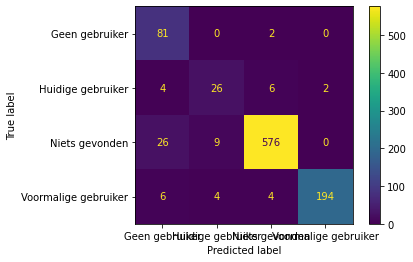

                      precision    recall  f1-score   support

      Geen gebruiker       0.69      0.98      0.81        83
   Huidige gebruiker       0.67      0.68      0.68        38
      Niets gevonden       0.98      0.94      0.96       611
Voormalige gebruiker       0.99      0.93      0.96       208

            accuracy                           0.93       940
           macro avg       0.83      0.88      0.85       940
        weighted avg       0.94      0.93      0.94       940



In [33]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(2,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(train_set['text'], train_set['label'])  
predicted_nb = random_search.predict(test_set['text'])
print(np.mean(predicted_nb == test_set['label']))
cm = confusion_matrix(test_set['label'], predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(test_set['label'], predicted_nb,
    target_names=random_search.classes_))

In [34]:
from pickle import dump

dump(random_search, open('smoking_ml_model.pkl', 'wb'))

In [36]:
test_set['predicted'] = predicted_nb

In [37]:
test_set

,text,label,predicted
2,conclusie: normale nacontrole. kijkt goed ter...,Niets gevonden,Niets gevonden
17,conclusie: samenvatting abcde: icc bij trauma...,Niets gevonden,Niets gevonden
37,"beloop: staat gepland voor tc, echter nummer ...",Niets gevonden,Niets gevonden
40,beloop: lab belt: materiaal van 24-uurs urine...,Niets gevonden,Niets gevonden
48,beloop: beloop: reguliere controle na acdf c4...,Huidige gebruiker,Huidige gebruiker
...,...,...,...
4678,samenvatting: voorgeschiedenis: in verleden p...,Geen gebruiker,Geen gebruiker
4682,"anamnese: nog steeds hielspoor links, heeft a...",Geen gebruiker,Geen gebruiker
4688,reden van komst / verwijzing: reden verwijzin...,Geen gebruiker,Geen gebruiker
4691,anamnese: verkort consult: aandachtspunten u...,Huidige gebruiker,Huidige gebruiker


In [38]:
test_set.to_csv('sgd_smoking_results.csv')

## Experiment 2

In [14]:
rook_corpus = rook_corpus_backup.copy()
stemmer = SnowballStemmer("dutch")
rook_corpus['text'] = rook_corpus['text'].str.lower()
rook_corpus['text'] = [stemmer.stem(text) for text in rook_corpus['text']]
rook_corpus['label'] = rook_corpus['label'].str.replace('Niets gevonden','Geen gebruiker')
rook_corpus['label'] = rook_corpus['label'].str.replace('Voormalige gebruiker','Geen gebruiker')
rook_corpus = rook_corpus.drop(rook_corpus[rook_corpus.label == '--'].index)
rook_corpus = rook_corpus.drop(rook_corpus[rook_corpus.label == 'Onbekend'].index)
rook_corpus_backup = rook_corpus.copy()

In [16]:
test_set = rook_corpus.loc[indices['index']]
train_set = rook_corpus.loc[~rook_corpus.index.isin(test_set.index)]

In [17]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 18.40, NNZs: 2218, Bias: 0.000000, T: 2256, Avg. loss: 0.263580
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 24.71, NNZs: 1179, Bias: 0.000000, T: 4512, Avg. loss: 0.199774
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 29.70, NNZs: 988, Bias: 0.000000, T: 6768, Avg. loss: 0.181247
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 33.58, NNZs: 856, Bias: 0.000000, T: 9024, Avg. loss: 0.170372
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 37.20, NNZs: 771, Bias: 0.000000, T: 11280, Avg. loss: 0.161485
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 40.87, NNZs: 704, Bias: 0.000000, T: 13536, Avg. loss: 0.154326
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 41.44, NNZs: 681, Bias: 0.000000, T: 15792, Avg. loss: 0.148946
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 42.01, NNZs: 676, Bias: 0.000000, T: 18048, Avg. loss: 0.147956
Total training time: 0.05 seconds.
-- Epoch 9
No

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.490 total time=   1.5s
-- Epoch 1
Norm: 18.96, NNZs: 2282, Bias: 0.000000, T: 2256, Avg. loss: 0.259260
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 24.85, NNZs: 1138, Bias: 0.000000, T: 4512, Avg. loss: 0.196494
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 29.14, NNZs: 907, Bias: 0.000000, T: 6768, Avg. loss: 0.180886
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 33.31, NNZs: 791, Bias: 0.000000, T: 9024, Avg. loss: 0.168861
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 36.91, NNZs: 723, Bias: 0.000000, T: 11280, Avg. loss: 0.160621
Total training time: 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.488 total time=   1.6s
-- Epoch 1
Norm: 18.73, NNZs: 2321, Bias: 0.000000, T: 2256, Avg. loss: 0.265481
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 24.58, NNZs: 1179, Bias: 0.000000, T: 4512, Avg. loss: 0.203432
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 29.37, NNZs: 975, Bias: 0.000000, T: 6768, Avg. loss: 0.186790
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 33.34, NNZs: 855, Bias: 0.000000, T: 9024, Avg. loss: 0.175916
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 37.21, NNZs: 780, Bias: 0.000000, T: 11280, Avg. loss: 0.167147
Total training time: 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.490 total time=   1.6s
-- Epoch 1
Norm: 18.78, NNZs: 2262, Bias: 0.000000, T: 2256, Avg. loss: 0.257708
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 24.65, NNZs: 1140, Bias: 0.000000, T: 4512, Avg. loss: 0.197373
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 29.02, NNZs: 924, Bias: 0.000000, T: 6768, Avg. loss: 0.181098
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 33.01, NNZs: 813, Bias: 0.000000, T: 9024, Avg. loss: 0.170843
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 36.47, NNZs: 740, Bias: 0.000000, T: 11280, Avg. loss: 0.162691
Total training time: 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.490 total time=   1.5s
-- Epoch 1
Norm: 19.11, NNZs: 2288, Bias: 0.000000, T: 2256, Avg. loss: 0.257593
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 24.68, NNZs: 1137, Bias: 0.000000, T: 4512, Avg. loss: 0.198000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 29.08, NNZs: 928, Bias: 0.000000, T: 6768, Avg. loss: 0.182259
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 33.26, NNZs: 814, Bias: 0.000000, T: 9024, Avg. loss: 0.170592
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 36.53, NNZs: 746, Bias: 0.000000, T: 11280, Avg. loss: 0.161729
Total training time: 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.489 total time=   1.5s
-- Epoch 1
Norm: 139778991018856.41, NNZs: 21253, Bias: 0.000000, T: 2256, Avg. loss: 3123021134527619200450560.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 93523897927562.53, NNZs: 21253, Bias: 0.000000, T: 4512, Avg. loss: 6593259318316962154545152.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 66889118193606.20, NNZs: 21253, Bias: 0.000000, T: 6768, Avg. loss: 2607106467527789658505216.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 49176006815333.08, NNZs: 21253, Bias: 0.000000, T: 9024, Avg. loss: 1198502412978658926

[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.795 total time=   1.4s
-- Epoch 1
Norm: 31.24, NNZs: 7907, Bias: 0.000000, T: 2256, Avg. loss: 0.189210
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 38.37, NNZs: 3970, Bias: 0.000000, T: 4512, Avg. loss: 0.053886
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 44.01, NNZs: 2779, Bias: 0.000000, T: 6768, Avg. loss: 0.042775
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 48.60, NNZs: 2180, Bias: 0.000000, T: 9024, Avg. loss: 0.034906
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 52.40, NNZs: 1771, Bias: 0.000000, T: 11280, Avg. loss: 0.031203
Total training

[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.369 total time=   1.4s
-- Epoch 1
Norm: 31.97, NNZs: 11871, Bias: 0.000000, T: 2256, Avg. loss: 0.449988
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 51.80, NNZs: 7263, Bias: 0.000000, T: 4512, Avg. loss: 0.469258
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 106.59, NNZs: 7406, Bias: 0.000000, T: 6768, Avg. loss: 1.517385
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 284.04, NNZs: 9387, Bias: 0.000000, T: 9024, Avg. loss: 10.718991
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 931.01, NNZs: 13578, Bias: 0.000000, T: 11280, Avg. loss: 116.074286
To

[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.490 total time=   1.4s
-- Epoch 1
Norm: 91.34, NNZs: 36682, Bias: -1.001852, T: 2256, Avg. loss: 0.863232
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 39.41, NNZs: 36996, Bias: -0.974046, T: 4512, Avg. loss: 0.946902
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 30.73, NNZs: 37107, Bias: -0.927107, T: 6768, Avg. loss: 0.249424
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 24.55, NNZs: 37062, Bias: -0.940026, T: 9024, Avg. loss: 0.165667
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 21.32, NNZs: 37136, Bias: -0.945662, T: 11280, Avg. loss: 0.066727
Total tr

[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.696 total time=   1.4s
-- Epoch 1
Norm: 78.37, NNZs: 9722, Bias: 0.000000, T: 2256, Avg. loss: 0.938999
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 92.83, NNZs: 5946, Bias: 0.000000, T: 4512, Avg. loss: 0.283003
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 102.35, NNZs: 4084, Bias: 0.000000, T: 6768, Avg. loss: 0.155910
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 109.75, NNZs: 3038, Bias: 0.000000, T: 9024, Avg. loss: 0.122895
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 116.77, NNZs: 2509, Bias: 0.000000, T: 11280, Avg. loss: 0.079992
Total traini

[CV 3/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.145 total time=   1.4s
-- Epoch 1
Norm: 0.19, NNZs: 21030, Bias: 0.000000, T: 2256, Avg. loss: 0.716713
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.26, NNZs: 21030, Bias: 0.000000, T: 4512, Avg. loss: 0.725040
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 21030, Bias: 0.000000, T: 6768, Avg. loss: 0.730881
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.36, NNZs: 21030, Bias: 0.000000, T: 9024, Avg. loss: 0.734505
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.40, NNZs: 21030, Bias: 0.000000, T: 11280, Avg. loss: 0.73871

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.723 total time=   1.4s
-- Epoch 1
Norm: 31.08, NNZs: 20868, Bias: 0.000000, T: 2256, Avg. loss: 0.647681
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 37.34, NNZs: 20868, Bias: 0.000000, T: 4512, Avg. loss: 0.265903
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.55, NNZs: 20868, Bias: 0.000000, T: 6768, Avg. loss: 0.190185
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 42.39, NNZs: 20868, Bias: 0.000000, T: 9024, Avg. loss: 0.161191
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 43.48, NNZs: 20868, Bias: 0.000000, T: 11280, Avg. loss: 0.147584
Total

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.731 total time=   1.4s
-- Epoch 1
Norm: 30.90, NNZs: 21291, Bias: 0.000000, T: 2256, Avg. loss: 0.663057
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 37.36, NNZs: 21291, Bias: 0.000000, T: 4512, Avg. loss: 0.262786
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.68, NNZs: 21291, Bias: 0.000000, T: 6768, Avg. loss: 0.187059
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 42.55, NNZs: 21291, Bias: 0.000000, T: 9024, Avg. loss: 0.159667
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 43.66, NNZs: 21291, Bias: 0.000000, T: 11280, Avg. loss: 0.146234
Total

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.727 total time=   1.4s
-- Epoch 1
Norm: 31.30, NNZs: 21035, Bias: 0.000000, T: 2256, Avg. loss: 0.638531
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 37.46, NNZs: 21035, Bias: 0.000000, T: 4512, Avg. loss: 0.260577
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.53, NNZs: 21035, Bias: 0.000000, T: 6768, Avg. loss: 0.183081
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 42.25, NNZs: 21035, Bias: 0.000000, T: 9024, Avg. loss: 0.156474
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 43.28, NNZs: 21035, Bias: 0.000000, T: 11280, Avg. loss: 0.143662
Total

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.616 total time=   1.4s
-- Epoch 1
Norm: 31.79, NNZs: 21208, Bias: 0.000000, T: 2256, Avg. loss: 0.613458
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 37.58, NNZs: 21208, Bias: 0.000000, T: 4512, Avg. loss: 0.261065
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.45, NNZs: 21208, Bias: 0.000000, T: 6768, Avg. loss: 0.183954
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 42.09, NNZs: 21208, Bias: 0.000000, T: 9024, Avg. loss: 0.157067
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 43.08, NNZs: 21208, Bias: 0.000000, T: 11280, Avg. loss: 0.143955
Total

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.714 total time=   1.4s
-- Epoch 1
Norm: 172.14, NNZs: 19661, Bias: -2.448452, T: 2256, Avg. loss: 1.823954
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 125.43, NNZs: 20193, Bias: -2.834126, T: 4512, Avg. loss: 0.428886
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 98.99, NNZs: 20349, Bias: -3.042356, T: 6768, Avg. loss: 0.201566
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 82.03, NNZs: 20420, Bias: -2.929916, T: 9024, Avg. loss: 0.072477
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 69.46, NNZs: 20442, Bias: -2.928040, T: 11280, Avg. loss: 0.04949

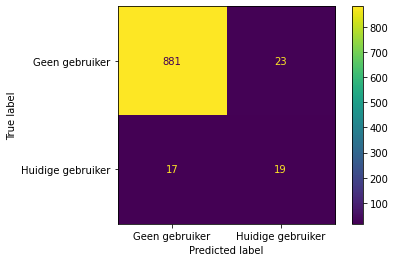

                   precision    recall  f1-score   support

   Geen gebruiker       0.98      0.97      0.98       904
Huidige gebruiker       0.45      0.53      0.49        36

         accuracy                           0.96       940
        macro avg       0.72      0.75      0.73       940
     weighted avg       0.96      0.96      0.96       940



In [18]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Alcohol

## Experiment 1

In [25]:
alcohol_corpus = Corpus[["text", "Alcohol"]].rename(columns={"Alcohol":"label"})

In [26]:
alcohol_corpus

,text,label
0,Beloop: \tPatiÃ«nte heeft 10 minuten van te vo...,Niets gevonden
1,Beloop: \tG5P4 36 wkGrav 1e lijnALL geen Hb Pa...,Niets gevonden
2,Conclusie: \tNormale nacontrole. Kijkt goed te...,Niets gevonden
3,Beleid: \tAlgemeen: Dagopname voor 3x PC a 2....,Niets gevonden
4,Anamnese: \t34W4D,Niets gevonden
...,...,...
4695,Beloop: \tCONSULTENKAMERGezien door co-ass Y. ...,Geen gebruiker
4696,Reden van komst / Verwijzing: \tReden verwijzi...,Geen gebruiker
4697,"Beloop: \tMR CPG7P4M4 // MI: 4x sectio ia, 1x...",Geen gebruiker
4698,Reden van komst / Verwijzing: \tReden van koms...,Geen gebruiker


In [27]:
alcohol_corpus['text'] = alcohol_corpus['text'].str.replace('\t',' ')
alcohol_corpus.drop_duplicates(inplace=True)
alcohol_corpus['text'] = alcohol_corpus['text'].astype(str)

In [28]:
stemmer = SnowballStemmer("dutch")
alcohol_corpus['text'] = alcohol_corpus['text'].str.lower()
alcohol_corpus['text'] = [stemmer.stem(text) for text in alcohol_corpus['text']]
alcohol_corpus = alcohol_corpus.drop(alcohol_corpus[alcohol_corpus.label == '--'].index)
alcohol_corpus_backup = alcohol_corpus.copy()

In [31]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

alcohol_corpus["text"] = alcohol_corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(alcohol_corpus['text'], alcohol_corpus['label'], test_size=0.2, random_state=50)

In [32]:
test_set = alcohol_corpus.loc[indices['index']]
train_set = alcohol_corpus.loc[~alcohol_corpus.index.isin(test_set.index)]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 22.28, NNZs: 4032, Bias: 0.000000, T: 2256, Avg. loss: 0.426019
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 32.24, NNZs: 2175, Bias: 0.000000, T: 4512, Avg. loss: 0.303465
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 39.70, NNZs: 1695, Bias: 0.000000, T: 6768, Avg. loss: 0.259607
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 45.81, NNZs: 1423, Bias: 0.000000, T: 9024, Avg. loss: 0.233179
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 51.19, NNZs: 1228, Bias: 0.000000, T: 11280, Avg. loss: 0.214469
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 55.93, NNZs: 1077, Bias: 0.000000, T: 13536, Avg. loss: 0.201947
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 56.78, NNZs: 1036, Bias: 0.000000, T: 15792, Avg. loss: 0.192500
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 57.61, NNZs: 1026, Bias: 0.000000, T: 18048, Avg. loss: 0.190619
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 58.42, NNZs: 1005, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


Norm: 40.86, NNZs: 437, Bias: 0.000000, T: 15792, Avg. loss: 0.056144
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 41.28, NNZs: 433, Bias: 0.000000, T: 18048, Avg. loss: 0.055897
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 41.69, NNZs: 419, Bias: 0.000000, T: 20304, Avg. loss: 0.055621
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 42.09, NNZs: 407, Bias: 0.000000, T: 22560, Avg. loss: 0.055365
Total training time: 0.05 seconds.
-- Epoch 11
Norm: 42.48, NNZs: 401, Bias: 0.000000, T: 24816, Avg. loss: 0.055120
Total training time: 0.06 seconds.
-- Epoch 12
Norm: 42.55, NNZs: 400, Bias: 0.000000, T: 27072, Avg. loss: 0.054895
Total training time: 0.07 seconds.
-- Epoch 13
Norm: 42.63, NNZs: 400, Bias: 0.000000, T: 29328, Avg. loss: 0.054852
Total training time: 0.07 seconds.
-- Epoch 14
Norm: 42.71, NNZs: 400, Bias: 0.000000, T: 31584, Avg. loss: 0.054809
Total training time: 0.08 seconds.
-- Epoch 15
Norm: 42.78, NNZs: 399, Bias: 0.000000, T: 33840, Avg. loss: 0.054

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.630 total time=   1.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 22.41, NNZs: 4093, Bias: 0.000000, T: 2256, Avg. loss: 0.427913
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 32.55, NNZs: 2196, Bias: 0.000000, T: 4512, Avg. loss: 0.300284
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 39.97, NNZs: 1701, Bias: 0.000000, T: 6768, Avg. loss: 0.257400
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 46.00, NNZs: 1401, Bias: 0.000000, T: 9024, Avg. loss: 0.231677
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 51.36, NNZs: 1216, Bias: 0.000000, T: 11280, Avg. loss: 0.214081
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 56.03, NNZs: 1074, Bias: 0.000000, T: 13536, Avg. loss: 0.201656
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 56.86, NNZs: 1035, Bias: 0.000000, T: 15792, Avg. loss: 0.192747
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 57.67, NNZs: 1023, Bias: 0.000000, T: 18048, Avg. loss: 0.191076
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 58.47, NNZs: 1008, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


Norm: 41.24, NNZs: 436, Bias: 0.000000, T: 18048, Avg. loss: 0.057594
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 41.64, NNZs: 431, Bias: 0.000000, T: 20304, Avg. loss: 0.057371
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 42.04, NNZs: 417, Bias: 0.000000, T: 22560, Avg. loss: 0.057139
Total training time: 0.05 seconds.
-- Epoch 11
Norm: 42.43, NNZs: 407, Bias: 0.000000, T: 24816, Avg. loss: 0.056914
Total training time: 0.06 seconds.
-- Epoch 12
Norm: 42.50, NNZs: 406, Bias: 0.000000, T: 27072, Avg. loss: 0.056724
Total training time: 0.07 seconds.
-- Epoch 13
Norm: 42.58, NNZs: 403, Bias: 0.000000, T: 29328, Avg. loss: 0.056691
Total training time: 0.07 seconds.
-- Epoch 14
Norm: 42.65, NNZs: 400, Bias: 0.000000, T: 31584, Avg. loss: 0.056649
Total training time: 0.08 seconds.
-- Epoch 15
Norm: 42.73, NNZs: 399, Bias: 0.000000, T: 33840, Avg. loss: 0.056610
Total training time: 0.08 seconds.
-- Epoch 16
Norm: 42.81, NNZs: 399, Bias: 0.000000, T: 36096, Avg. loss: 0.05

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.662 total time=   1.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 22.73, NNZs: 4178, Bias: 0.000000, T: 2256, Avg. loss: 0.421863
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.70, NNZs: 2185, Bias: 0.000000, T: 4512, Avg. loss: 0.293588
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.07, NNZs: 1672, Bias: 0.000000, T: 6768, Avg. loss: 0.250344
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 46.24, NNZs: 1384, Bias: 0.000000, T: 9024, Avg. loss: 0.224188
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 51.56, NNZs: 1205, Bias: 0.000000, T: 11280, Avg. loss: 0.206572
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 56.32, NNZs: 1091, Bias: 0.000000, T: 13536, Avg. loss: 0.193438
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 57.17, NNZs: 1064, Bias: 0.000000, T: 15792, Avg. loss: 0.184352
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 57.99, NNZs: 1052, Bias: 0.000000, T: 18048, Avg. loss: 0.182393
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 58.81, NNZs: 1033, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


Norm: 41.95, NNZs: 397, Bias: 0.000000, T: 22560, Avg. loss: 0.058211
Total training time: 0.05 seconds.
-- Epoch 11
Norm: 42.33, NNZs: 391, Bias: 0.000000, T: 24816, Avg. loss: 0.057975
Total training time: 0.06 seconds.
-- Epoch 12
Norm: 42.40, NNZs: 390, Bias: 0.000000, T: 27072, Avg. loss: 0.057836
Total training time: 0.06 seconds.
-- Epoch 13
Norm: 42.48, NNZs: 388, Bias: 0.000000, T: 29328, Avg. loss: 0.057799
Total training time: 0.07 seconds.
-- Epoch 14
Norm: 42.55, NNZs: 387, Bias: 0.000000, T: 31584, Avg. loss: 0.057764
Total training time: 0.07 seconds.
-- Epoch 15
Norm: 42.63, NNZs: 386, Bias: 0.000000, T: 33840, Avg. loss: 0.057722
Total training time: 0.08 seconds.
-- Epoch 16
Norm: 42.70, NNZs: 384, Bias: 0.000000, T: 36096, Avg. loss: 0.057702
Total training time: 0.08 seconds.
-- Epoch 17
Norm: 42.71, NNZs: 384, Bias: 0.000000, T: 38352, Avg. loss: 0.057660
Total training time: 0.09 seconds.
-- Epoch 18
Norm: 42.73, NNZs: 383, Bias: 0.000000, T: 40608, Avg. loss: 0.0

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.668 total time=   1.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 22.58, NNZs: 4203, Bias: 0.000000, T: 2256, Avg. loss: 0.424875
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 32.45, NNZs: 2233, Bias: 0.000000, T: 4512, Avg. loss: 0.295643
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.02, NNZs: 1751, Bias: 0.000000, T: 6768, Avg. loss: 0.252773
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 46.27, NNZs: 1415, Bias: 0.000000, T: 9024, Avg. loss: 0.226342
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 51.59, NNZs: 1266, Bias: 0.000000, T: 11280, Avg. loss: 0.208733
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 56.32, NNZs: 1148, Bias: 0.000000, T: 13536, Avg. loss: 0.195060
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 57.18, NNZs: 1105, Bias: 0.000000, T: 15792, Avg. loss: 0.187155
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 58.00, NNZs: 1087, Bias: 0.000000, T: 18048, Avg. loss: 0.185096
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 58.82, NNZs: 1070, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


Norm: 42.13, NNZs: 400, Bias: 0.000000, T: 22560, Avg. loss: 0.055776
Total training time: 0.05 seconds.
-- Epoch 11
Norm: 42.51, NNZs: 394, Bias: 0.000000, T: 24816, Avg. loss: 0.055563
Total training time: 0.06 seconds.
-- Epoch 12
Norm: 42.59, NNZs: 393, Bias: 0.000000, T: 27072, Avg. loss: 0.055347
Total training time: 0.06 seconds.
-- Epoch 13
Norm: 42.66, NNZs: 392, Bias: 0.000000, T: 29328, Avg. loss: 0.055309
Total training time: 0.07 seconds.
-- Epoch 14
Norm: 42.74, NNZs: 390, Bias: 0.000000, T: 31584, Avg. loss: 0.055262
Total training time: 0.07 seconds.
-- Epoch 15
Norm: 42.81, NNZs: 388, Bias: 0.000000, T: 33840, Avg. loss: 0.055228
Total training time: 0.08 seconds.
-- Epoch 16
Norm: 42.89, NNZs: 387, Bias: 0.000000, T: 36096, Avg. loss: 0.055180
Total training time: 0.08 seconds.
-- Epoch 17
Norm: 42.90, NNZs: 387, Bias: 0.000000, T: 38352, Avg. loss: 0.055145
Total training time: 0.09 seconds.
-- Epoch 18
Norm: 42.92, NNZs: 386, Bias: 0.000000, T: 40608, Avg. loss: 0.0

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.677 total time=   1.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 22.82, NNZs: 4113, Bias: 0.000000, T: 2256, Avg. loss: 0.422830
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 32.75, NNZs: 2193, Bias: 0.000000, T: 4512, Avg. loss: 0.292320
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.30, NNZs: 1701, Bias: 0.000000, T: 6768, Avg. loss: 0.248594
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 46.45, NNZs: 1431, Bias: 0.000000, T: 9024, Avg. loss: 0.220788
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 51.86, NNZs: 1208, Bias: 0.000000, T: 11280, Avg. loss: 0.203497
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 56.62, NNZs: 1067, Bias: 0.000000, T: 13536, Avg. loss: 0.190278
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 57.47, NNZs: 1019, Bias: 0.000000, T: 15792, Avg. loss: 0.181312
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 58.29, NNZs: 1000, Bias: 0.000000, T: 18048, Avg. loss: 0.179614
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 59.10, NNZs: 979, Bias: 0.000000, T: 20304, Avg. lo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


Norm: 42.53, NNZs: 397, Bias: 0.000000, T: 27072, Avg. loss: 0.054838
Total training time: 0.06 seconds.
-- Epoch 13
Norm: 42.61, NNZs: 396, Bias: 0.000000, T: 29328, Avg. loss: 0.054788
Total training time: 0.07 seconds.
-- Epoch 14
Norm: 42.68, NNZs: 395, Bias: 0.000000, T: 31584, Avg. loss: 0.054763
Total training time: 0.07 seconds.
-- Epoch 15
Norm: 42.76, NNZs: 393, Bias: 0.000000, T: 33840, Avg. loss: 0.054723
Total training time: 0.08 seconds.
-- Epoch 16
Norm: 42.83, NNZs: 393, Bias: 0.000000, T: 36096, Avg. loss: 0.054688
Total training time: 0.08 seconds.
-- Epoch 17
Norm: 42.85, NNZs: 393, Bias: 0.000000, T: 38352, Avg. loss: 0.054649
Total training time: 0.09 seconds.
-- Epoch 18
Norm: 42.86, NNZs: 393, Bias: 0.000000, T: 40608, Avg. loss: 0.054642
Total training time: 0.09 seconds.
-- Epoch 19
Norm: 42.88, NNZs: 390, Bias: 0.000000, T: 42864, Avg. loss: 0.054635
Total training time: 0.10 seconds.
-- Epoch 20
Norm: 42.89, NNZs: 390, Bias: 0.000000, T: 45120, Avg. loss: 0.0

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.664 total time=   1.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 135208437855017.58, NNZs: 17369, Bias: 0.000000, T: 2256, Avg. loss: 3159735526189288598274048.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 90458317988936.83, NNZs: 17370, Bias: 0.000000, T: 4512, Avg. loss: 6227555488884622903738368.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 65669914223434.09, NNZs: 17370, Bias: 0.000000, T: 6768, Avg. loss: 2344905630950912570687488.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 48677859029785.43, NNZs: 17370, Bias: 0.000000, T: 9024, Avg. loss: 1140102015532013807730688.000000
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 36719067757188.27, NNZs: 17370, Bias: 0.000000, T: 11280, Avg. loss: 565561984923455612518400.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 28096541423354.12, NNZs: 17370, Bias: 0.000000, T: 13536, Avg. loss: 296707762406625407664128.000000
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 132540923139497.66,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 135224464018049.58, NNZs: 17633, Bias: 0.000000, T: 2256, Avg. loss: 3358140037039954702893056.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 90884836972817.39, NNZs: 17633, Bias: 0.000000, T: 4512, Avg. loss: 6254454509666459155693568.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 65399421708126.90, NNZs: 17633, Bias: 0.000000, T: 6768, Avg. loss: 2468285062418262153756672.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 48497788897576.82, NNZs: 17633, Bias: 0.000000, T: 9024, Avg. loss: 1112418192006189632454656.000000
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 36486643158442.62, NNZs: 17633, Bias: 0.000000, T: 11280, Avg. loss: 573890221563757388103680.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 27969368946553.19, NNZs: 17633, Bias: 0.000000, T: 13536, Avg. loss: 297281588399863630921728.000000
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 139827638243515.81,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 132600406456444.33, NNZs: 17254, Bias: 0.000000, T: 2256, Avg. loss: 3153097852969110479044608.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 89914171063809.58, NNZs: 17256, Bias: 0.000000, T: 4512, Avg. loss: 6019705774292475622457344.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 65815008484605.12, NNZs: 17256, Bias: 0.000000, T: 6768, Avg. loss: 2316008527318844694331392.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 49253607226464.09, NNZs: 17256, Bias: 0.000000, T: 9024, Avg. loss: 1115182379927677941317632.000000
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 37125830875619.73, NNZs: 17256, Bias: 0.000000, T: 11280, Avg. loss: 578789537846683599110144.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 28805674104363.43, NNZs: 17256, Bias: 0.000000, T: 13536, Avg. loss: 290909219466619153022976.000000
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 132924550316705.83,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 132426276466853.84, NNZs: 17607, Bias: 0.000000, T: 2256, Avg. loss: 3086186809553323275845632.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 90320308802609.75, NNZs: 17607, Bias: 0.000000, T: 4512, Avg. loss: 5861835691964838027722752.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 64485358068475.57, NNZs: 17607, Bias: 0.000000, T: 6768, Avg. loss: 2431121970453107645087744.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 48195368874102.28, NNZs: 17607, Bias: 0.000000, T: 9024, Avg. loss: 1068291228811501137559552.000000
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 36237222269138.60, NNZs: 17607, Bias: 0.000000, T: 11280, Avg. loss: 552531841634973308157952.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 27895996971696.45, NNZs: 17607, Bias: 0.000000, T: 13536, Avg. loss: 281992393845365832417280.000000
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 131406098330521.83,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 129453272720612.69, NNZs: 17617, Bias: 0.000000, T: 2256, Avg. loss: 2864039084354335080972288.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 86742969871799.61, NNZs: 17618, Bias: 0.000000, T: 4512, Avg. loss: 5783945251447821087801344.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 61900326516487.14, NNZs: 17618, Bias: 0.000000, T: 6768, Avg. loss: 2236228692129595351105536.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 45450563965346.59, NNZs: 17618, Bias: 0.000000, T: 9024, Avg. loss: 1025347515109142794600448.000000
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 33894128226023.77, NNZs: 17618, Bias: 0.000000, T: 11280, Avg. loss: 503254461711605229944832.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 25585147141871.43, NNZs: 17618, Bias: 0.000000, T: 13536, Avg. loss: 258627399187101885923328.000000
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 134510997865930.30,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 41.12, NNZs: 11529, Bias: 0.000000, T: 2256, Avg. loss: 0.312161
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 48.15, NNZs: 5087, Bias: 0.000000, T: 4512, Avg. loss: 0.058083
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 53.81, NNZs: 3371, Bias: 0.000000, T: 6768, Avg. loss: 0.046959
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 58.72, NNZs: 2575, Bias: 0.000000, T: 9024, Avg. loss: 0.040460
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 62.92, NNZs: 2112, Bias: 0.000000, T: 11280, Avg. loss: 0.034645
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 66.71, NNZs: 1843, Bias: 0.000000, T: 13536, Avg. loss: 0.033299
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 34.55, NNZs: 8802, Bias: 0.000000, T: 2256, Avg. loss: 0.211172
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 40.93, NNZs: 3964, Bias: 0.000000, T: 4512, Avg. loss: 0.047314
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 46.16, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 40.99, NNZs: 11303, Bias: 0.000000, T: 2256, Avg. loss: 0.312184
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 47.77, NNZs: 5074, Bias: 0.000000, T: 4512, Avg. loss: 0.060744
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 53.91, NNZs: 3335, Bias: 0.000000, T: 6768, Avg. loss: 0.049440
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 58.82, NNZs: 2582, Bias: 0.000000, T: 9024, Avg. loss: 0.041597
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 63.07, NNZs: 2130, Bias: 0.000000, T: 11280, Avg. loss: 0.037103
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 66.87, NNZs: 1837, Bias: 0.000000, T: 13536, Avg. loss: 0.033559
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 34.90, NNZs: 8713, Bias: 0.000000, T: 2256, Avg. loss: 0.223613
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.24, NNZs: 3990, Bias: 0.000000, T: 4512, Avg. loss: 0.046562
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 46.61, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 41.10, NNZs: 11421, Bias: 0.000000, T: 2256, Avg. loss: 0.310849
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 48.32, NNZs: 5277, Bias: 0.000000, T: 4512, Avg. loss: 0.059463
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 54.16, NNZs: 3498, Bias: 0.000000, T: 6768, Avg. loss: 0.047399
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 58.99, NNZs: 2665, Bias: 0.000000, T: 9024, Avg. loss: 0.038210
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 63.27, NNZs: 2210, Bias: 0.000000, T: 11280, Avg. loss: 0.033708
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 67.00, NNZs: 1909, Bias: 0.000000, T: 13536, Avg. loss: 0.030544
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 35.36, NNZs: 8869, Bias: 0.000000, T: 2256, Avg. loss: 0.224687
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.96, NNZs: 4033, Bias: 0.000000, T: 4512, Avg. loss: 0.047916
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 47.16, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 40.37, NNZs: 11104, Bias: 0.000000, T: 2256, Avg. loss: 0.289133
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 47.36, NNZs: 5057, Bias: 0.000000, T: 4512, Avg. loss: 0.060136
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 53.11, NNZs: 3322, Bias: 0.000000, T: 6768, Avg. loss: 0.046959
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 58.04, NNZs: 2535, Bias: 0.000000, T: 9024, Avg. loss: 0.040807
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 62.26, NNZs: 2080, Bias: 0.000000, T: 11280, Avg. loss: 0.033751
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 65.90, NNZs: 1799, Bias: 0.000000, T: 13536, Avg. loss: 0.032161
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 34.70, NNZs: 8531, Bias: 0.000000, T: 2256, Avg. loss: 0.208637
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.00, NNZs: 3779, Bias: 0.000000, T: 4512, Avg. loss: 0.044182
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 46.17, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 40.98, NNZs: 11430, Bias: 0.000000, T: 2256, Avg. loss: 0.305926
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 48.13, NNZs: 5247, Bias: 0.000000, T: 4512, Avg. loss: 0.065230
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 53.89, NNZs: 3321, Bias: 0.000000, T: 6768, Avg. loss: 0.048375
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 58.89, NNZs: 2567, Bias: 0.000000, T: 9024, Avg. loss: 0.042671
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 63.13, NNZs: 2099, Bias: 0.000000, T: 11280, Avg. loss: 0.037198
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 66.90, NNZs: 1798, Bias: 0.000000, T: 13536, Avg. loss: 0.035643
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 35.30, NNZs: 8834, Bias: 0.000000, T: 2256, Avg. loss: 0.224276
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.59, NNZs: 4045, Bias: 0.000000, T: 4512, Avg. loss: 0.045715
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 46.93, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 16.05, NNZs: 6636, Bias: 0.000000, T: 2256, Avg. loss: 0.202025
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 21.76, NNZs: 4384, Bias: 0.000000, T: 4512, Avg. loss: 0.097866
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.67, NNZs: 3457, Bias: 0.000000, T: 6768, Avg. loss: 0.075779
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.74, NNZs: 2926, Bias: 0.000000, T: 9024, Avg. loss: 0.065821
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 31.40, NNZs: 2603, Bias: 0.000000, T: 11280, Avg. loss: 0.059507
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 33.68, NNZs: 2362, Bias: 0.000000, T: 13536, Avg. loss: 0.055758
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 15.12, NNZs: 6078, Bias: 0.000000, T: 2256, Avg. loss: 0.152134
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 19.99, NNZs: 3993, Bias: 0.000000, T: 4512, Avg. loss: 0.070494
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.52, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 16.30, NNZs: 6428, Bias: 0.000000, T: 2256, Avg. loss: 0.200076
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 21.55, NNZs: 4251, Bias: 0.000000, T: 4512, Avg. loss: 0.097160
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 25.51, NNZs: 3475, Bias: 0.000000, T: 6768, Avg. loss: 0.075251
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.51, NNZs: 2897, Bias: 0.000000, T: 9024, Avg. loss: 0.066479
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 31.18, NNZs: 2549, Bias: 0.000000, T: 11280, Avg. loss: 0.060360
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 33.52, NNZs: 2335, Bias: 0.000000, T: 13536, Avg. loss: 0.056328
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 14.99, NNZs: 6117, Bias: 0.000000, T: 2256, Avg. loss: 0.149471
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 19.88, NNZs: 3936, Bias: 0.000000, T: 4512, Avg. loss: 0.069160
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.44, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 16.31, NNZs: 6620, Bias: 0.000000, T: 2256, Avg. loss: 0.202330
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 21.84, NNZs: 4482, Bias: 0.000000, T: 4512, Avg. loss: 0.098753
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.73, NNZs: 3482, Bias: 0.000000, T: 6768, Avg. loss: 0.076977
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.75, NNZs: 2967, Bias: 0.000000, T: 9024, Avg. loss: 0.065783
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 31.44, NNZs: 2583, Bias: 0.000000, T: 11280, Avg. loss: 0.060374
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 33.77, NNZs: 2301, Bias: 0.000000, T: 13536, Avg. loss: 0.055712
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 15.10, NNZs: 6091, Bias: 0.000000, T: 2256, Avg. loss: 0.151315
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 20.06, NNZs: 3992, Bias: 0.000000, T: 4512, Avg. loss: 0.069852
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.58, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 16.33, NNZs: 6667, Bias: 0.000000, T: 2256, Avg. loss: 0.197369
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 21.68, NNZs: 4373, Bias: 0.000000, T: 4512, Avg. loss: 0.094338
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.49, NNZs: 3394, Bias: 0.000000, T: 6768, Avg. loss: 0.073184
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.55, NNZs: 2852, Bias: 0.000000, T: 9024, Avg. loss: 0.063143
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 31.21, NNZs: 2507, Bias: 0.000000, T: 11280, Avg. loss: 0.056609
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 33.46, NNZs: 2252, Bias: 0.000000, T: 13536, Avg. loss: 0.053355
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 15.25, NNZs: 6254, Bias: 0.000000, T: 2256, Avg. loss: 0.150549
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 20.31, NNZs: 4046, Bias: 0.000000, T: 4512, Avg. loss: 0.069587
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.76, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 16.34, NNZs: 6756, Bias: 0.000000, T: 2256, Avg. loss: 0.199667
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 21.75, NNZs: 4456, Bias: 0.000000, T: 4512, Avg. loss: 0.096698
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.64, NNZs: 3466, Bias: 0.000000, T: 6768, Avg. loss: 0.074361
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.68, NNZs: 2874, Bias: 0.000000, T: 9024, Avg. loss: 0.063844
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 31.22, NNZs: 2516, Bias: 0.000000, T: 11280, Avg. loss: 0.058510
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 33.48, NNZs: 2259, Bias: 0.000000, T: 13536, Avg. loss: 0.053367
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 15.06, NNZs: 6336, Bias: 0.000000, T: 2256, Avg. loss: 0.150947
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 19.91, NNZs: 4039, Bias: 0.000000, T: 4512, Avg. loss: 0.072088
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.56, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.36, NNZs: 30800, Bias: -0.085960, T: 2256, Avg. loss: 0.188491
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.93, NNZs: 30800, Bias: -0.122620, T: 4512, Avg. loss: 0.159215
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.33, NNZs: 30800, Bias: -0.149788, T: 6768, Avg. loss: 0.141347
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.61, NNZs: 30800, Bias: -0.171032, T: 9024, Avg. loss: 0.129673
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.82, NNZs: 30800, Bias: -0.188376, T: 11280, Avg. loss: 0.121527
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.99, NNZs: 30800, Bias: -0.202956, T: 13536, Avg. loss: 0.115431
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 1.48, NNZs: 30800, Bias: -0.093452, T: 2256, Avg. loss: 0.181492
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.11, NNZs: 30800, Bias: -0.133989, T: 4512, Avg. loss: 0.145892
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.35, NNZs: 31087, Bias: -0.083363, T: 2256, Avg. loss: 0.189241
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.91, NNZs: 31087, Bias: -0.119885, T: 4512, Avg. loss: 0.160416
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.30, NNZs: 31087, Bias: -0.146848, T: 6768, Avg. loss: 0.143008
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.57, NNZs: 31087, Bias: -0.168027, T: 9024, Avg. loss: 0.131623
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.78, NNZs: 31087, Bias: -0.185440, T: 11280, Avg. loss: 0.123558
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.95, NNZs: 31087, Bias: -0.200153, T: 13536, Avg. loss: 0.117435
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 1.45, NNZs: 31087, Bias: -0.090365, T: 2256, Avg. loss: 0.182745
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.09, NNZs: 31087, Bias: -0.130888, T: 4512, Avg. loss: 0.146737
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.35, NNZs: 30611, Bias: -0.084910, T: 2256, Avg. loss: 0.188952
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.91, NNZs: 30611, Bias: -0.121533, T: 4512, Avg. loss: 0.160444
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.31, NNZs: 30611, Bias: -0.148994, T: 6768, Avg. loss: 0.142668
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.60, NNZs: 30611, Bias: -0.170504, T: 9024, Avg. loss: 0.130829
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.81, NNZs: 30611, Bias: -0.188064, T: 11280, Avg. loss: 0.122622
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.98, NNZs: 30611, Bias: -0.202825, T: 13536, Avg. loss: 0.116516
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 1.48, NNZs: 30611, Bias: -0.092581, T: 2256, Avg. loss: 0.181681
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.11, NNZs: 30611, Bias: -0.133166, T: 4512, Avg. loss: 0.145951
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.31, NNZs: 30973, Bias: -0.083153, T: 2256, Avg. loss: 0.190043
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.88, NNZs: 30973, Bias: -0.119770, T: 4512, Avg. loss: 0.161195
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.28, NNZs: 30973, Bias: -0.147073, T: 6768, Avg. loss: 0.143317
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.56, NNZs: 30973, Bias: -0.168480, T: 9024, Avg. loss: 0.131508
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.78, NNZs: 30973, Bias: -0.185993, T: 11280, Avg. loss: 0.123290
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.95, NNZs: 30973, Bias: -0.200747, T: 13536, Avg. loss: 0.117142
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 1.44, NNZs: 30973, Bias: -0.092131, T: 2256, Avg. loss: 0.182755
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.07, NNZs: 30973, Bias: -0.132738, T: 4512, Avg. loss: 0.147297
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.29, NNZs: 31025, Bias: -0.082268, T: 2256, Avg. loss: 0.190959
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.84, NNZs: 31025, Bias: -0.118837, T: 4512, Avg. loss: 0.163003
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.25, NNZs: 31025, Bias: -0.146468, T: 6768, Avg. loss: 0.145285
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.54, NNZs: 31025, Bias: -0.168281, T: 9024, Avg. loss: 0.133210
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.76, NNZs: 31025, Bias: -0.186161, T: 11280, Avg. loss: 0.124804
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.93, NNZs: 31025, Bias: -0.201230, T: 13536, Avg. loss: 0.118542
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 1.48, NNZs: 31025, Bias: -0.092746, T: 2256, Avg. loss: 0.181869
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.11, NNZs: 31025, Bias: -0.133363, T: 4512, Avg. loss: 0.146287
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 91.11, NNZs: 30366, Bias: -0.940927, T: 2256, Avg. loss: 0.932137
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 44.13, NNZs: 30644, Bias: -1.002930, T: 4512, Avg. loss: 0.884721
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.93, NNZs: 30695, Bias: -1.005794, T: 6768, Avg. loss: 0.306489
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 30.27, NNZs: 30720, Bias: -0.976119, T: 9024, Avg. loss: 0.171558
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 27.59, NNZs: 30727, Bias: -0.962940, T: 11280, Avg. loss: 0.073078
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 26.22, NNZs: 30732, Bias: -1.007554, T: 13536, Avg. loss: 0.031189
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 25.17, NNZs: 30714, Bias: -1.031453, T: 15792, Avg. loss: 0.015143
Total training time: 0.02 seconds.
Convergence after 7 epochs took 0.02 seconds
-- Epoch 1
Norm: 87.80, NNZs: 30195, Bias: -1.025485, T: 2256, Avg. loss: 0.895799
Total training time: 0.00 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 91.60, NNZs: 30636, Bias: -0.894366, T: 2256, Avg. loss: 0.912972
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.59, NNZs: 30889, Bias: -0.860367, T: 4512, Avg. loss: 0.899958
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.36, NNZs: 30978, Bias: -1.038384, T: 6768, Avg. loss: 0.296444
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 30.10, NNZs: 30975, Bias: -1.049291, T: 9024, Avg. loss: 0.168854
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 28.02, NNZs: 30996, Bias: -1.091688, T: 11280, Avg. loss: 0.082097
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 26.71, NNZs: 31000, Bias: -1.038010, T: 13536, Avg. loss: 0.030782
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 89.22, NNZs: 30557, Bias: -0.860715, T: 2256, Avg. loss: 0.913532
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.01, NNZs: 30883, Bias: -0.865980, T: 4512, Avg. loss: 0.892369
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 91.29, NNZs: 30165, Bias: -1.120401, T: 2256, Avg. loss: 0.951574
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.11, NNZs: 30415, Bias: -0.892877, T: 4512, Avg. loss: 0.901777
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.74, NNZs: 30497, Bias: -1.118388, T: 6768, Avg. loss: 0.297544
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 30.22, NNZs: 30493, Bias: -1.001591, T: 9024, Avg. loss: 0.180701
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 27.15, NNZs: 30527, Bias: -1.006957, T: 11280, Avg. loss: 0.072032
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 26.29, NNZs: 30537, Bias: -1.009005, T: 13536, Avg. loss: 0.035001
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 90.28, NNZs: 29903, Bias: -0.980833, T: 2256, Avg. loss: 0.884564
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.29, NNZs: 30329, Bias: -0.712661, T: 4512, Avg. loss: 0.896308
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 90.51, NNZs: 30491, Bias: -0.944512, T: 2256, Avg. loss: 0.944466
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.94, NNZs: 30812, Bias: -1.157587, T: 4512, Avg. loss: 0.889852
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.77, NNZs: 30884, Bias: -1.044101, T: 6768, Avg. loss: 0.312900
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 30.95, NNZs: 30906, Bias: -0.957597, T: 9024, Avg. loss: 0.171194
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 27.89, NNZs: 30922, Bias: -1.067305, T: 11280, Avg. loss: 0.077673
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 26.35, NNZs: 30938, Bias: -1.056838, T: 13536, Avg. loss: 0.033980
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 25.39, NNZs: 30943, Bias: -1.061295, T: 15792, Avg. loss: 0.015140
Total training time: 0.02 seconds.
Convergence after 7 epochs took 0.02 seconds
-- Epoch 1
Norm: 89.75, NNZs: 30443, Bias: -1.017459, T: 2256, Avg. loss: 0.921418
Total training time: 0.00 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 91.28, NNZs: 30678, Bias: -1.047255, T: 2256, Avg. loss: 0.931704
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.77, NNZs: 30913, Bias: -0.809277, T: 4512, Avg. loss: 0.888960
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 37.76, NNZs: 31016, Bias: -0.985466, T: 6768, Avg. loss: 0.320720
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 30.38, NNZs: 31029, Bias: -0.974305, T: 9024, Avg. loss: 0.177107
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 28.22, NNZs: 31029, Bias: -1.034819, T: 11280, Avg. loss: 0.081269
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 26.34, NNZs: 31026, Bias: -1.016184, T: 13536, Avg. loss: 0.032635
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 90.32, NNZs: 30663, Bias: -0.785589, T: 2256, Avg. loss: 0.940080
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.42, NNZs: 30902, Bias: -0.664392, T: 4512, Avg. loss: 0.909449
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 42.59, NNZs: 5853, Bias: 0.000000, T: 2256, Avg. loss: 0.283312
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 54.12, NNZs: 3439, Bias: 0.000000, T: 4512, Avg. loss: 0.103273
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 62.52, NNZs: 2533, Bias: 0.000000, T: 6768, Avg. loss: 0.070923
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 69.27, NNZs: 1997, Bias: 0.000000, T: 9024, Avg. loss: 0.055759
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 75.14, NNZs: 1756, Bias: 0.000000, T: 11280, Avg. loss: 0.049447
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 80.39, NNZs: 1563, Bias: 0.000000, T: 13536, Avg. loss: 0.043985
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 37.68, NNZs: 5020, Bias: 0.000000, T: 2256, Avg. loss: 0.211942
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 49.10, NNZs: 3034, Bias: 0.000000, T: 4512, Avg. loss: 0.071293
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 57.24, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 42.69, NNZs: 5818, Bias: 0.000000, T: 2256, Avg. loss: 0.278638
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 53.05, NNZs: 3247, Bias: 0.000000, T: 4512, Avg. loss: 0.096658
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 61.84, NNZs: 2412, Bias: 0.000000, T: 6768, Avg. loss: 0.068479
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 68.62, NNZs: 1984, Bias: 0.000000, T: 9024, Avg. loss: 0.054123
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 74.30, NNZs: 1681, Bias: 0.000000, T: 11280, Avg. loss: 0.047395
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 79.50, NNZs: 1483, Bias: 0.000000, T: 13536, Avg. loss: 0.041004
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 36.02, NNZs: 4780, Bias: 0.000000, T: 2256, Avg. loss: 0.203562
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 48.63, NNZs: 2962, Bias: 0.000000, T: 4512, Avg. loss: 0.070376
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 56.27, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 42.17, NNZs: 5975, Bias: 0.000000, T: 2256, Avg. loss: 0.281499
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 53.73, NNZs: 3543, Bias: 0.000000, T: 4512, Avg. loss: 0.100899
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 62.05, NNZs: 2607, Bias: 0.000000, T: 6768, Avg. loss: 0.068201
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 69.12, NNZs: 2105, Bias: 0.000000, T: 9024, Avg. loss: 0.055929
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 75.17, NNZs: 1797, Bias: 0.000000, T: 11280, Avg. loss: 0.045875
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 80.08, NNZs: 1573, Bias: 0.000000, T: 13536, Avg. loss: 0.040676
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 37.02, NNZs: 4933, Bias: 0.000000, T: 2256, Avg. loss: 0.207818
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 48.85, NNZs: 3055, Bias: 0.000000, T: 4512, Avg. loss: 0.075243
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 56.87, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 42.17, NNZs: 5785, Bias: 0.000000, T: 2256, Avg. loss: 0.278455
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 53.80, NNZs: 3373, Bias: 0.000000, T: 4512, Avg. loss: 0.095209
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 62.36, NNZs: 2603, Bias: 0.000000, T: 6768, Avg. loss: 0.067467
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 68.67, NNZs: 2034, Bias: 0.000000, T: 9024, Avg. loss: 0.051397
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 74.98, NNZs: 1738, Bias: 0.000000, T: 11280, Avg. loss: 0.043874
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 80.20, NNZs: 1535, Bias: 0.000000, T: 13536, Avg. loss: 0.038222
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 37.19, NNZs: 4861, Bias: 0.000000, T: 2256, Avg. loss: 0.210892
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 48.72, NNZs: 3054, Bias: 0.000000, T: 4512, Avg. loss: 0.069859
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 56.88, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 42.77, NNZs: 6020, Bias: 0.000000, T: 2256, Avg. loss: 0.276443
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 54.22, NNZs: 3551, Bias: 0.000000, T: 4512, Avg. loss: 0.095243
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 62.42, NNZs: 2480, Bias: 0.000000, T: 6768, Avg. loss: 0.067396
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 69.23, NNZs: 1996, Bias: 0.000000, T: 9024, Avg. loss: 0.054657
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 75.43, NNZs: 1735, Bias: 0.000000, T: 11280, Avg. loss: 0.046105
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 80.27, NNZs: 1511, Bias: 0.000000, T: 13536, Avg. loss: 0.040724
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 37.92, NNZs: 5249, Bias: 0.000000, T: 2256, Avg. loss: 0.212574
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 50.13, NNZs: 3176, Bias: 0.000000, T: 4512, Avg. loss: 0.075067
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 58.20, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.24, NNZs: 17368, Bias: 0.000000, T: 2256, Avg. loss: 0.696902
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 17368, Bias: 0.000000, T: 4512, Avg. loss: 0.682943
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.39, NNZs: 17368, Bias: 0.000000, T: 6768, Avg. loss: 0.674402
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.45, NNZs: 17368, Bias: 0.000000, T: 9024, Avg. loss: 0.667842
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.50, NNZs: 17368, Bias: 0.000000, T: 11280, Avg. loss: 0.662130
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.54, NNZs: 17368, Bias: 0.000000, T: 13536, Avg. loss: 0.657111
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.29, NNZs: 17368, Bias: 0.000000, T: 2256, Avg. loss: 0.693953
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.39, NNZs: 17368, Bias: 0.000000, T: 4512, Avg. loss: 0.676737
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.47, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.23, NNZs: 17634, Bias: 0.000000, T: 2256, Avg. loss: 0.698535
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 17634, Bias: 0.000000, T: 4512, Avg. loss: 0.684374
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.38, NNZs: 17634, Bias: 0.000000, T: 6768, Avg. loss: 0.675883
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 17634, Bias: 0.000000, T: 9024, Avg. loss: 0.669136
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.49, NNZs: 17634, Bias: 0.000000, T: 11280, Avg. loss: 0.663430
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.53, NNZs: 17634, Bias: 0.000000, T: 13536, Avg. loss: 0.658392
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.30, NNZs: 17634, Bias: 0.000000, T: 2256, Avg. loss: 0.692791
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.41, NNZs: 17634, Bias: 0.000000, T: 4512, Avg. loss: 0.674524
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.49, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.24, NNZs: 17258, Bias: 0.000000, T: 2256, Avg. loss: 0.696150
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 17258, Bias: 0.000000, T: 4512, Avg. loss: 0.682409
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.39, NNZs: 17258, Bias: 0.000000, T: 6768, Avg. loss: 0.674168
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.45, NNZs: 17258, Bias: 0.000000, T: 9024, Avg. loss: 0.667697
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.49, NNZs: 17258, Bias: 0.000000, T: 11280, Avg. loss: 0.662217
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.54, NNZs: 17258, Bias: 0.000000, T: 13536, Avg. loss: 0.657263
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.29, NNZs: 17258, Bias: 0.000000, T: 2256, Avg. loss: 0.691479
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.40, NNZs: 17258, Bias: 0.000000, T: 4512, Avg. loss: 0.673038
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.48, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.25, NNZs: 17609, Bias: 0.000000, T: 2256, Avg. loss: 0.694856
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 17609, Bias: 0.000000, T: 4512, Avg. loss: 0.680283
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.41, NNZs: 17609, Bias: 0.000000, T: 6768, Avg. loss: 0.671518
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 17609, Bias: 0.000000, T: 9024, Avg. loss: 0.664700
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.51, NNZs: 17609, Bias: 0.000000, T: 11280, Avg. loss: 0.658885
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.55, NNZs: 17609, Bias: 0.000000, T: 13536, Avg. loss: 0.653785
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.29, NNZs: 17609, Bias: 0.000000, T: 2256, Avg. loss: 0.692717
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.39, NNZs: 17609, Bias: 0.000000, T: 4512, Avg. loss: 0.675424
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.47, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.25, NNZs: 17613, Bias: 0.000000, T: 2256, Avg. loss: 0.694904
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 17613, Bias: 0.000000, T: 4512, Avg. loss: 0.680907
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.41, NNZs: 17613, Bias: 0.000000, T: 6768, Avg. loss: 0.672291
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 17613, Bias: 0.000000, T: 9024, Avg. loss: 0.665430
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.51, NNZs: 17613, Bias: 0.000000, T: 11280, Avg. loss: 0.659767
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.55, NNZs: 17613, Bias: 0.000000, T: 13536, Avg. loss: 0.654730
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.29, NNZs: 17613, Bias: 0.000000, T: 2256, Avg. loss: 0.690088
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.40, NNZs: 17613, Bias: 0.000000, T: 4512, Avg. loss: 0.672588
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.48, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 22.93, NNZs: 17371, Bias: 0.000000, T: 2256, Avg. loss: 0.389702
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 30.86, NNZs: 17371, Bias: 0.000000, T: 4512, Avg. loss: 0.231918
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.48, NNZs: 17371, Bias: 0.000000, T: 6768, Avg. loss: 0.186136
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 38.45, NNZs: 17371, Bias: 0.000000, T: 9024, Avg. loss: 0.162964
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 40.43, NNZs: 17371, Bias: 0.000000, T: 11280, Avg. loss: 0.149426
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 41.80, NNZs: 17371, Bias: 0.000000, T: 13536, Avg. loss: 0.140905
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 41.97, NNZs: 17371, Bias: 0.000000, T: 15792, Avg. loss: 0.129861
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 42.13, NNZs: 17371, Bias: 0.000000, T: 18048, Avg. loss: 0.129135
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 42.27, NNZs: 17371, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.672 total time=   1.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 23.13, NNZs: 17633, Bias: 0.000000, T: 2256, Avg. loss: 0.389135
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.03, NNZs: 17633, Bias: 0.000000, T: 4512, Avg. loss: 0.230841
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.64, NNZs: 17633, Bias: 0.000000, T: 6768, Avg. loss: 0.185340
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 38.59, NNZs: 17633, Bias: 0.000000, T: 9024, Avg. loss: 0.162299
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 40.56, NNZs: 17633, Bias: 0.000000, T: 11280, Avg. loss: 0.148870
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 41.91, NNZs: 17633, Bias: 0.000000, T: 13536, Avg. loss: 0.140452
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 42.06, NNZs: 17633, Bias: 0.000000, T: 15792, Avg. loss: 0.130176
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 42.21, NNZs: 17633, Bias: 0.000000, T: 18048, Avg. loss: 0.128971
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 42.35, NNZs: 17633, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.781 total time=   1.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 22.98, NNZs: 17258, Bias: 0.000000, T: 2256, Avg. loss: 0.393243
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 30.96, NNZs: 17258, Bias: 0.000000, T: 4512, Avg. loss: 0.233740
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.61, NNZs: 17258, Bias: 0.000000, T: 6768, Avg. loss: 0.187551
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 38.59, NNZs: 17258, Bias: 0.000000, T: 9024, Avg. loss: 0.164225
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 40.59, NNZs: 17258, Bias: 0.000000, T: 11280, Avg. loss: 0.150604
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 41.96, NNZs: 17258, Bias: 0.000000, T: 13536, Avg. loss: 0.142029
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 42.13, NNZs: 17258, Bias: 0.000000, T: 15792, Avg. loss: 0.131042
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 42.29, NNZs: 17258, Bias: 0.000000, T: 18048, Avg. loss: 0.129989
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 42.43, NNZs: 17258, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.670 total time=   1.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 23.08, NNZs: 17606, Bias: 0.000000, T: 2256, Avg. loss: 0.386647
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.07, NNZs: 17606, Bias: 0.000000, T: 4512, Avg. loss: 0.226591
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.68, NNZs: 17606, Bias: 0.000000, T: 6768, Avg. loss: 0.180835
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 38.62, NNZs: 17606, Bias: 0.000000, T: 9024, Avg. loss: 0.157916
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 40.58, NNZs: 17606, Bias: 0.000000, T: 11280, Avg. loss: 0.144633
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 41.92, NNZs: 17606, Bias: 0.000000, T: 13536, Avg. loss: 0.136335
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 42.08, NNZs: 17606, Bias: 0.000000, T: 15792, Avg. loss: 0.125903
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 42.23, NNZs: 17606, Bias: 0.000000, T: 18048, Avg. loss: 0.125172
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 42.37, NNZs: 17606, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.666 total time=   1.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 23.20, NNZs: 17616, Bias: 0.000000, T: 2256, Avg. loss: 0.388791
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.25, NNZs: 17616, Bias: 0.000000, T: 4512, Avg. loss: 0.228879
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.90, NNZs: 17616, Bias: 0.000000, T: 6768, Avg. loss: 0.182530
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 38.87, NNZs: 17616, Bias: 0.000000, T: 9024, Avg. loss: 0.159280
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 40.84, NNZs: 17616, Bias: 0.000000, T: 11280, Avg. loss: 0.145817
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 42.19, NNZs: 17616, Bias: 0.000000, T: 13536, Avg. loss: 0.137424
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 42.35, NNZs: 17616, Bias: 0.000000, T: 15792, Avg. loss: 0.128586
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 42.49, NNZs: 17616, Bias: 0.000000, T: 18048, Avg. loss: 0.126074
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 42.62, NNZs: 17616, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.677 total time=   1.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 51.50, NNZs: 12665, Bias: -1.419816, T: 2256, Avg. loss: 0.135982
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 34.54, NNZs: 13321, Bias: -1.342640, T: 4512, Avg. loss: 0.010940
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 26.21, NNZs: 13651, Bias: -1.261581, T: 6768, Avg. loss: 0.003786
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 21.37, NNZs: 13784, Bias: -1.203812, T: 9024, Avg. loss: 0.001831
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 18.17, NNZs: 13893, Bias: -1.156767, T: 11280, Avg. loss: 0.001053
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 15.69, NNZs: 13933, Bias: -1.138874, T: 13536, Avg. loss: 0.000457
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 52.62, NNZs: 11899, Bias: -1.102537, T: 2256, Avg. loss: 0.128351
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 33.89, NNZs: 12391, Bias: -1.166610, T: 4512, Avg. loss: 0.008658
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 51.40, NNZs: 12569, Bias: -1.504677, T: 2256, Avg. loss: 0.116323
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 34.61, NNZs: 13434, Bias: -1.447882, T: 4512, Avg. loss: 0.012703
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 26.50, NNZs: 13801, Bias: -1.362275, T: 6768, Avg. loss: 0.004116
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 21.30, NNZs: 13922, Bias: -1.314905, T: 9024, Avg. loss: 0.000903
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 18.11, NNZs: 14018, Bias: -1.273146, T: 11280, Avg. loss: 0.000972
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 15.85, NNZs: 14124, Bias: -1.238865, T: 13536, Avg. loss: 0.000266
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 51.27, NNZs: 11863, Bias: -1.121378, T: 2256, Avg. loss: 0.118523
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 34.32, NNZs: 12604, Bias: -1.044542, T: 4512, Avg. loss: 0.017038
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 52.51, NNZs: 12684, Bias: -1.425214, T: 2256, Avg. loss: 0.126746
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 35.85, NNZs: 13510, Bias: -1.454719, T: 4512, Avg. loss: 0.014588
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 26.80, NNZs: 13672, Bias: -1.371060, T: 6768, Avg. loss: 0.002345
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 21.45, NNZs: 13777, Bias: -1.344249, T: 9024, Avg. loss: 0.001026
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 18.45, NNZs: 13832, Bias: -1.255748, T: 11280, Avg. loss: 0.000371
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 15.97, NNZs: 13870, Bias: -1.239906, T: 13536, Avg. loss: 0.000368
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 51.92, NNZs: 11572, Bias: -1.187819, T: 2256, Avg. loss: 0.123255
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 35.28, NNZs: 12496, Bias: -1.216898, T: 4512, Avg. loss: 0.014733
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 52.13, NNZs: 12658, Bias: -1.529651, T: 2256, Avg. loss: 0.121032
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 35.04, NNZs: 13425, Bias: -1.565275, T: 4512, Avg. loss: 0.010830
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 26.25, NNZs: 13747, Bias: -1.510277, T: 6768, Avg. loss: 0.003223
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 21.22, NNZs: 13895, Bias: -1.473403, T: 9024, Avg. loss: 0.001408
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 18.14, NNZs: 13946, Bias: -1.413172, T: 11280, Avg. loss: 0.000965
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 15.71, NNZs: 14007, Bias: -1.386263, T: 13536, Avg. loss: 0.000502
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 50.99, NNZs: 11911, Bias: -1.402093, T: 2256, Avg. loss: 0.120740
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 34.80, NNZs: 12612, Bias: -1.278764, T: 4512, Avg. loss: 0.012181
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 50.95, NNZs: 12640, Bias: -1.389774, T: 2256, Avg. loss: 0.120578
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 34.40, NNZs: 13491, Bias: -1.320655, T: 4512, Avg. loss: 0.011061
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 26.05, NNZs: 13824, Bias: -1.286922, T: 6768, Avg. loss: 0.003103
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 21.44, NNZs: 14037, Bias: -1.242230, T: 9024, Avg. loss: 0.001748
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 17.93, NNZs: 14083, Bias: -1.223721, T: 11280, Avg. loss: 0.000635
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 15.60, NNZs: 14129, Bias: -1.190852, T: 13536, Avg. loss: 0.000147
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 52.69, NNZs: 11643, Bias: -1.297229, T: 2256, Avg. loss: 0.120712
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 35.40, NNZs: 12302, Bias: -1.291195, T: 4512, Avg. loss: 0.008528
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 47.26, NNZs: 5312, Bias: 0.000000, T: 2820, Avg. loss: 0.264204
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 60.05, NNZs: 2878, Bias: 0.000000, T: 5640, Avg. loss: 0.093833
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 69.38, NNZs: 2119, Bias: 0.000000, T: 8460, Avg. loss: 0.069963
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 76.90, NNZs: 1743, Bias: 0.000000, T: 11280, Avg. loss: 0.056426
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 83.92, NNZs: 1487, Bias: 0.000000, T: 14100, Avg. loss: 0.050235
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 89.97, NNZs: 1364, Bias: 0.000000, T: 16920, Avg. loss: 0.044144
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 41.19, NNZs: 4455, Bias: 0.000000, T: 2820, Avg. loss: 0.198470
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 54.78, NNZs: 2577, Bias: 0.000000, T: 5640, Avg. loss: 0.066356
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 63.61, 

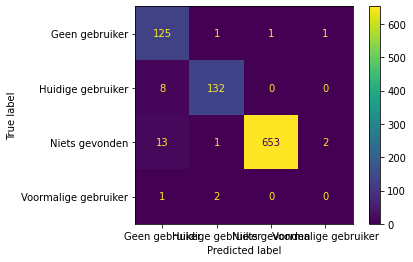

                      precision    recall  f1-score   support

      Geen gebruiker       0.85      0.98      0.91       128
   Huidige gebruiker       0.97      0.94      0.96       140
      Niets gevonden       1.00      0.98      0.99       669
Voormalige gebruiker       0.00      0.00      0.00         3

            accuracy                           0.97       940
           macro avg       0.70      0.72      0.71       940
        weighted avg       0.97      0.97      0.97       940



In [26]:
# Ngram 2 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

## Experiment 2

In [27]:
alcohol_corpus = alcohol_corpus_backup.copy()
stemmer = SnowballStemmer("dutch")
alcohol_corpus['text'] = alcohol_corpus['text'].str.lower()
alcohol_corpus['text'] = [stemmer.stem(text) for text in alcohol_corpus['text']]
alcohol_corpus['label'] = alcohol_corpus['label'].str.replace('Niets gevonden','Geen gebruiker')
alcohol_corpus['label'] = alcohol_corpus['label'].str.replace('Voormalige gebruiker','Geen gebruiker')
alcohol_corpus = alcohol_corpus.drop(alcohol_corpus[alcohol_corpus.label == '--'].index)
alcohol_corpus = alcohol_corpus.drop(alcohol_corpus[alcohol_corpus.label == 'Onbekend'].index)
alcohol_corpus_backup = alcohol_corpus.copy()

In [28]:
test_set = alcohol_corpus.loc[indices['index']]
train_set = alcohol_corpus.loc[~alcohol_corpus.index.isin(test_set.index)]

In [29]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.32, NNZs: 4611, Bias: 0.000000, T: 2256, Avg. loss: 0.412179
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 33.50, NNZs: 2286, Bias: 0.000000, T: 4512, Avg. loss: 0.278322
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 41.23, NNZs: 1738, Bias: 0.000000, T: 6768, Avg. loss: 0.232306
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 47.48, NNZs: 1467, Bias: 0.000000, T: 9024, Avg. loss: 0.205351
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 52.82, NNZs: 1233, Bias: 0.000000, T: 11280, Avg. loss: 0.188080
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 57.54, NNZs: 1089, Bias: 0.000000, T: 13536, Avg. loss: 0.175286
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 58.37, NNZs: 1054, Bias: 0.000000, T: 15792, Avg. loss: 0.167702
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 59.18, NNZs: 1036, Bias: 0.000000, T: 18048, Avg. loss: 0.166075
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 59.98, NNZs: 995, Bias: 0.000000, T: 20304, Avg. lo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


Norm: 57.06, NNZs: 1380, Bias: 0.000000, T: 13536, Avg. loss: 0.128525
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 57.83, NNZs: 1322, Bias: 0.000000, T: 15792, Avg. loss: 0.123600
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 58.58, NNZs: 1276, Bias: 0.000000, T: 18048, Avg. loss: 0.122597
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 59.33, NNZs: 1219, Bias: 0.000000, T: 20304, Avg. loss: 0.121468
Total training time: 0.08 seconds.
-- Epoch 10
Norm: 60.05, NNZs: 1168, Bias: 0.000000, T: 22560, Avg. loss: 0.120426
Total training time: 0.09 seconds.
-- Epoch 11
Norm: 60.77, NNZs: 1141, Bias: 0.000000, T: 24816, Avg. loss: 0.119429
Total training time: 0.10 seconds.
-- Epoch 12
Norm: 60.91, NNZs: 1133, Bias: 0.000000, T: 27072, Avg. loss: 0.118618
Total training time: 0.11 seconds.
-- Epoch 13
Norm: 61.05, NNZs: 1131, Bias: 0.000000, T: 29328, Avg. loss: 0.118436
Total training time: 0.11 seconds.
-- Epoch 14
Norm: 61.19, NNZs: 1129, Bias: 0.000000, T: 31584, Avg. los

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.615 total time=   2.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.15, NNZs: 4740, Bias: 0.000000, T: 2256, Avg. loss: 0.423806
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 33.60, NNZs: 2408, Bias: 0.000000, T: 4512, Avg. loss: 0.287544
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 41.21, NNZs: 1897, Bias: 0.000000, T: 6768, Avg. loss: 0.242064
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 47.50, NNZs: 1486, Bias: 0.000000, T: 9024, Avg. loss: 0.214269
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 52.93, NNZs: 1271, Bias: 0.000000, T: 11280, Avg. loss: 0.196377
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 57.78, NNZs: 1144, Bias: 0.000000, T: 13536, Avg. loss: 0.183831
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 58.64, NNZs: 1102, Bias: 0.000000, T: 15792, Avg. loss: 0.175097
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 59.48, NNZs: 1085, Bias: 0.000000, T: 18048, Avg. loss: 0.173344
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 60.30, NNZs: 1069, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


Norm: 60.29, NNZs: 1380, Bias: 0.000000, T: 20304, Avg. loss: 0.126117
Total training time: 0.07 seconds.
-- Epoch 10
Norm: 61.05, NNZs: 1347, Bias: 0.000000, T: 22560, Avg. loss: 0.124925
Total training time: 0.08 seconds.
-- Epoch 11
Norm: 61.79, NNZs: 1282, Bias: 0.000000, T: 24816, Avg. loss: 0.123984
Total training time: 0.09 seconds.
-- Epoch 12
Norm: 61.93, NNZs: 1272, Bias: 0.000000, T: 27072, Avg. loss: 0.123093
Total training time: 0.09 seconds.
-- Epoch 13
Norm: 62.08, NNZs: 1261, Bias: 0.000000, T: 29328, Avg. loss: 0.122901
Total training time: 0.10 seconds.
-- Epoch 14
Norm: 62.22, NNZs: 1233, Bias: 0.000000, T: 31584, Avg. loss: 0.122696
Total training time: 0.11 seconds.
-- Epoch 15
Norm: 62.36, NNZs: 1231, Bias: 0.000000, T: 33840, Avg. loss: 0.122484
Total training time: 0.12 seconds.
-- Epoch 16
Norm: 62.51, NNZs: 1230, Bias: 0.000000, T: 36096, Avg. loss: 0.122279
Total training time: 0.13 seconds.
-- Epoch 17
Norm: 62.54, NNZs: 1228, Bias: 0.000000, T: 38352, Avg. 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.658 total time=   2.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.01, NNZs: 4745, Bias: 0.000000, T: 2256, Avg. loss: 0.427378
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 33.28, NNZs: 2434, Bias: 0.000000, T: 4512, Avg. loss: 0.294265
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 41.01, NNZs: 1968, Bias: 0.000000, T: 6768, Avg. loss: 0.248194
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 47.37, NNZs: 1606, Bias: 0.000000, T: 9024, Avg. loss: 0.222102
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 52.79, NNZs: 1348, Bias: 0.000000, T: 11280, Avg. loss: 0.203452
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 57.62, NNZs: 1225, Bias: 0.000000, T: 13536, Avg. loss: 0.190540
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 58.46, NNZs: 1112, Bias: 0.000000, T: 15792, Avg. loss: 0.182377
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 59.29, NNZs: 1099, Bias: 0.000000, T: 18048, Avg. loss: 0.180525
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 60.11, NNZs: 1081, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


Norm: 48.31, NNZs: 1937, Bias: 0.000000, T: 9024, Avg. loss: 0.161102
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 53.30, NNZs: 1666, Bias: 0.000000, T: 11280, Avg. loss: 0.149254
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 57.68, NNZs: 1513, Bias: 0.000000, T: 13536, Avg. loss: 0.140689
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 58.46, NNZs: 1466, Bias: 0.000000, T: 15792, Avg. loss: 0.135631
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 59.24, NNZs: 1430, Bias: 0.000000, T: 18048, Avg. loss: 0.134466
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 60.00, NNZs: 1399, Bias: 0.000000, T: 20304, Avg. loss: 0.133358
Total training time: 0.08 seconds.
-- Epoch 10
Norm: 60.75, NNZs: 1350, Bias: 0.000000, T: 22560, Avg. loss: 0.132268
Total training time: 0.10 seconds.
-- Epoch 11
Norm: 61.48, NNZs: 1253, Bias: 0.000000, T: 24816, Avg. loss: 0.131204
Total training time: 0.11 seconds.
-- Epoch 12
Norm: 61.62, NNZs: 1250, Bias: 0.000000, T: 27072, Avg. loss: 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.678 total time=   2.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.19, NNZs: 4734, Bias: 0.000000, T: 2256, Avg. loss: 0.420790
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 33.50, NNZs: 2270, Bias: 0.000000, T: 4512, Avg. loss: 0.284531
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 41.31, NNZs: 1816, Bias: 0.000000, T: 6768, Avg. loss: 0.237582
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 47.64, NNZs: 1405, Bias: 0.000000, T: 9024, Avg. loss: 0.210559
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 53.02, NNZs: 1220, Bias: 0.000000, T: 11280, Avg. loss: 0.192923
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 57.80, NNZs: 1068, Bias: 0.000000, T: 13536, Avg. loss: 0.179584
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 58.66, NNZs: 1027, Bias: 0.000000, T: 15792, Avg. loss: 0.171796
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 59.49, NNZs: 1000, Bias: 0.000000, T: 18048, Avg. loss: 0.169919
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 60.31, NNZs: 972, Bias: 0.000000, T: 20304, Avg. lo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


Norm: 58.90, NNZs: 1275, Bias: 0.000000, T: 18048, Avg. loss: 0.128227
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 59.64, NNZs: 1253, Bias: 0.000000, T: 20304, Avg. loss: 0.127073
Total training time: 0.08 seconds.
-- Epoch 10
Norm: 60.37, NNZs: 1228, Bias: 0.000000, T: 22560, Avg. loss: 0.126032
Total training time: 0.09 seconds.
-- Epoch 11
Norm: 61.09, NNZs: 1185, Bias: 0.000000, T: 24816, Avg. loss: 0.125013
Total training time: 0.09 seconds.
-- Epoch 12
Norm: 61.23, NNZs: 1126, Bias: 0.000000, T: 27072, Avg. loss: 0.124208
Total training time: 0.10 seconds.
-- Epoch 13
Norm: 61.37, NNZs: 1120, Bias: 0.000000, T: 29328, Avg. loss: 0.124017
Total training time: 0.11 seconds.
-- Epoch 14
Norm: 61.51, NNZs: 1116, Bias: 0.000000, T: 31584, Avg. loss: 0.123829
Total training time: 0.12 seconds.
-- Epoch 15
Norm: 61.65, NNZs: 1113, Bias: 0.000000, T: 33840, Avg. loss: 0.123636
Total training time: 0.13 seconds.
-- Epoch 16
Norm: 61.79, NNZs: 1106, Bias: 0.000000, T: 36096, Avg. l

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.639 total time=   2.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.15, NNZs: 4696, Bias: 0.000000, T: 2256, Avg. loss: 0.423211
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 33.45, NNZs: 2454, Bias: 0.000000, T: 4512, Avg. loss: 0.288431
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 41.13, NNZs: 1950, Bias: 0.000000, T: 6768, Avg. loss: 0.242504
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 47.41, NNZs: 1560, Bias: 0.000000, T: 9024, Avg. loss: 0.216248
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 52.82, NNZs: 1354, Bias: 0.000000, T: 11280, Avg. loss: 0.198491
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 57.63, NNZs: 1219, Bias: 0.000000, T: 13536, Avg. loss: 0.185828
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 58.48, NNZs: 1177, Bias: 0.000000, T: 15792, Avg. loss: 0.177348
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 59.32, NNZs: 1157, Bias: 0.000000, T: 18048, Avg. loss: 0.175627
Total training time: 0.09 seconds.
-- Epoch 9
Norm: 60.14, NNZs: 1138, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s



Norm: 48.15, NNZs: 1837, Bias: 0.000000, T: 9024, Avg. loss: 0.156686
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 53.08, NNZs: 1621, Bias: 0.000000, T: 11280, Avg. loss: 0.144743
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 57.45, NNZs: 1452, Bias: 0.000000, T: 13536, Avg. loss: 0.135907
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 58.23, NNZs: 1397, Bias: 0.000000, T: 15792, Avg. loss: 0.130944
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 59.00, NNZs: 1364, Bias: 0.000000, T: 18048, Avg. loss: 0.129766
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 59.75, NNZs: 1310, Bias: 0.000000, T: 20304, Avg. loss: 0.128622
Total training time: 0.08 seconds.
-- Epoch 10
Norm: 60.49, NNZs: 1263, Bias: 0.000000, T: 22560, Avg. loss: 0.127485
Total training time: 0.09 seconds.
-- Epoch 11
Norm: 61.22, NNZs: 1223, Bias: 0.000000, T: 24816, Avg. loss: 0.126433
Total training time: 0.10 seconds.
-- Epoch 12
Norm: 61.37, NNZs: 1216, Bias: 0.000000, T: 27072, Avg. loss:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.650 total time=   2.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 129186261999720.98, NNZs: 24512, Bias: 0.000000, T: 2256, Avg. loss: 2859633071752113228349440.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 86226429823564.64, NNZs: 24513, Bias: 0.000000, T: 4512, Avg. loss: 5787665555746811732295680.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 61350255699662.02, NNZs: 24513, Bias: 0.000000, T: 6768, Avg. loss: 2222895348895482608877568.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 44613346707225.87, NNZs: 24513, Bias: 0.000000, T: 9024, Avg. loss: 1026244400290700453740544.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 33063935170685.93, NNZs: 24513, Bias: 0.000000, T: 11280, Avg. loss: 495460824954132924203008.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 24830393958818.47, NNZs: 24513, Bias: 0.000000, T: 13536, Avg. loss: 248100109707550251810816.000000
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 129229260032540.67,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 132313967709140.36, NNZs: 24341, Bias: 0.000000, T: 2256, Avg. loss: 2981288166881290138681344.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 88921519454639.84, NNZs: 24341, Bias: 0.000000, T: 4512, Avg. loss: 5984018897117751954898944.000000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 62618881631498.27, NNZs: 24341, Bias: 0.000000, T: 6768, Avg. loss: 2411116396446892265832448.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 45701999808659.17, NNZs: 24341, Bias: 0.000000, T: 9024, Avg. loss: 1054282442348245853143040.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 34556976383115.16, NNZs: 24341, Bias: 0.000000, T: 11280, Avg. loss: 498942836501995753308160.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 26387293573593.15, NNZs: 24341, Bias: 0.000000, T: 13536, Avg. loss: 261855050163536032432128.000000
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 137531408607938.31,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 131842621852249.19, NNZs: 24909, Bias: 0.000000, T: 2256, Avg. loss: 2906381597553637273370624.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 87173574321954.53, NNZs: 24910, Bias: 0.000000, T: 4512, Avg. loss: 6078427471175576253890560.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 61918125212956.53, NNZs: 24910, Bias: 0.000000, T: 6768, Avg. loss: 2290788912247662473904128.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 44946208827573.72, NNZs: 24910, Bias: 0.000000, T: 9024, Avg. loss: 1047541871843348804796416.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 32882397729887.96, NNZs: 24910, Bias: 0.000000, T: 11280, Avg. loss: 522150933061550399815680.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 24620229602453.57, NNZs: 24910, Bias: 0.000000, T: 13536, Avg. loss: 248069582287243214585856.000000
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 129784298002488.22,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 133453088367785.91, NNZs: 25353, Bias: 0.000000, T: 2256, Avg. loss: 2879425635471321007652864.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 89474048088444.83, NNZs: 25353, Bias: 0.000000, T: 4512, Avg. loss: 5967337283411143974453248.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 64206267655677.79, NNZs: 25353, Bias: 0.000000, T: 6768, Avg. loss: 2350156568019660848496640.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 47171409484245.79, NNZs: 25353, Bias: 0.000000, T: 9024, Avg. loss: 1100340048031304984297472.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 35383580963516.24, NNZs: 25353, Bias: 0.000000, T: 11280, Avg. loss: 541210572317530091683840.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 27225939572765.97, NNZs: 25353, Bias: 0.000000, T: 13536, Avg. loss: 267666964367744520159232.000000
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 133294104756172.11,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 133264522930756.02, NNZs: 25269, Bias: 0.000000, T: 2256, Avg. loss: 2990736630095626629021696.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 89984364885089.98, NNZs: 25275, Bias: 0.000000, T: 4512, Avg. loss: 6046248534577394369953792.000000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 64313117162632.30, NNZs: 25275, Bias: 0.000000, T: 6768, Avg. loss: 2412489953549722251689984.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 47830622117259.27, NNZs: 25275, Bias: 0.000000, T: 9024, Avg. loss: 1080105536846388894105600.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 35908178862354.73, NNZs: 25275, Bias: 0.000000, T: 11280, Avg. loss: 553819621359037018275840.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 27546820038668.90, NNZs: 25275, Bias: 0.000000, T: 13536, Avg. loss: 282230763705789665247232.000000
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 133602296751498.38,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


[CV 5/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.7915127974877743, clf__eta0=0.05539740212799926, clf__fit_intercept=False, clf__l1_ratio=0.9152680641407671, clf__learning_rate=optimal, clf__loss=squared_epsilon_insensitive, clf__max_iter=80, clf__penalty=l1, clf__power_t=0.6359093112142983, clf__shuffle=True, clf__tol=0.9361199211609239, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.175 total time=   2.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 39.00, NNZs: 12338, Bias: 0.000000, T: 2256, Avg. loss: 0.255514
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 45.86, NNZs: 4737, Bias: 0.000000, T: 4512, Avg. loss: 0.054850
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 51.59, NNZs: 3085, Bias: 0.000000, T: 6768, Avg. loss: 0.046837
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 56.37, NNZs: 2405, Bias: 0.000000, T: 9024, Avg. loss: 0.042113
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 60.57, NNZs: 1956, Bias: 0.000000, T: 11280, Avg. loss: 0.036877
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 64.23, NNZs: 1713, Bias: 0.000000, T: 13536, Avg. loss: 0.034052
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 34.01, NNZs: 9929, Bias: 0.000000, T: 2256, Avg. loss: 0.191314
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 40.14, NNZs: 3965, Bias: 0.000000, T: 4512, Avg. loss: 0.044262
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 45.58, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 39.82, NNZs: 12775, Bias: 0.000000, T: 2256, Avg. loss: 0.263290
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 47.03, NNZs: 5164, Bias: 0.000000, T: 4512, Avg. loss: 0.063009
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 52.82, NNZs: 3356, Bias: 0.000000, T: 6768, Avg. loss: 0.047251
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 57.72, NNZs: 2582, Bias: 0.000000, T: 9024, Avg. loss: 0.042242
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 62.01, NNZs: 2190, Bias: 0.000000, T: 11280, Avg. loss: 0.037251
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 65.76, NNZs: 1875, Bias: 0.000000, T: 13536, Avg. loss: 0.033863
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 34.05, NNZs: 10111, Bias: 0.000000, T: 2256, Avg. loss: 0.186500
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 40.59, NNZs: 4107, Bias: 0.000000, T: 4512, Avg. loss: 0.045969
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 45.75,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 40.20, NNZs: 13177, Bias: 0.000000, T: 2256, Avg. loss: 0.271818
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 47.37, NNZs: 5278, Bias: 0.000000, T: 4512, Avg. loss: 0.057836
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 53.43, NNZs: 3509, Bias: 0.000000, T: 6768, Avg. loss: 0.047846
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 58.35, NNZs: 2562, Bias: 0.000000, T: 9024, Avg. loss: 0.040449
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 62.59, NNZs: 2234, Bias: 0.000000, T: 11280, Avg. loss: 0.034989
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 66.36, NNZs: 1915, Bias: 0.000000, T: 13536, Avg. loss: 0.032184
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 33.99, NNZs: 9660, Bias: 0.000000, T: 2256, Avg. loss: 0.194721
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 40.57, NNZs: 4006, Bias: 0.000000, T: 4512, Avg. loss: 0.048295
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 46.06, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 39.21, NNZs: 12604, Bias: 0.000000, T: 2256, Avg. loss: 0.259195
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 46.63, NNZs: 5068, Bias: 0.000000, T: 4512, Avg. loss: 0.062099
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 52.58, NNZs: 3406, Bias: 0.000000, T: 6768, Avg. loss: 0.051754
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 57.54, NNZs: 2531, Bias: 0.000000, T: 9024, Avg. loss: 0.044646
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 61.76, NNZs: 2067, Bias: 0.000000, T: 11280, Avg. loss: 0.039124
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 65.61, NNZs: 1838, Bias: 0.000000, T: 13536, Avg. loss: 0.036011
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 34.23, NNZs: 10235, Bias: 0.000000, T: 2256, Avg. loss: 0.197218
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 41.17, NNZs: 4211, Bias: 0.000000, T: 4512, Avg. loss: 0.051485
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 46.66,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 39.44, NNZs: 12474, Bias: 0.000000, T: 2256, Avg. loss: 0.257779
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 46.25, NNZs: 4727, Bias: 0.000000, T: 4512, Avg. loss: 0.055917
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 51.95, NNZs: 3111, Bias: 0.000000, T: 6768, Avg. loss: 0.044443
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 56.65, NNZs: 2375, Bias: 0.000000, T: 9024, Avg. loss: 0.038239
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 60.81, NNZs: 2042, Bias: 0.000000, T: 11280, Avg. loss: 0.034605
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 64.45, NNZs: 1736, Bias: 0.000000, T: 13536, Avg. loss: 0.032040
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 34.54, NNZs: 10167, Bias: 0.000000, T: 2256, Avg. loss: 0.195474
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 40.69, NNZs: 3874, Bias: 0.000000, T: 4512, Avg. loss: 0.040395
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 45.94,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 16.77, NNZs: 7555, Bias: 0.000000, T: 2256, Avg. loss: 0.176930
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 21.69, NNZs: 4413, Bias: 0.000000, T: 4512, Avg. loss: 0.079185
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.10, NNZs: 3386, Bias: 0.000000, T: 6768, Avg. loss: 0.063561
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 27.85, NNZs: 2867, Bias: 0.000000, T: 9024, Avg. loss: 0.056945
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 30.27, NNZs: 2497, Bias: 0.000000, T: 11280, Avg. loss: 0.052529
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 32.29, NNZs: 2231, Bias: 0.000000, T: 13536, Avg. loss: 0.049910
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 15.23, NNZs: 7226, Bias: 0.000000, T: 2256, Avg. loss: 0.135066
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 19.84, NNZs: 4379, Bias: 0.000000, T: 4512, Avg. loss: 0.062062
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 23.16, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 16.96, NNZs: 7761, Bias: 0.000000, T: 2256, Avg. loss: 0.184636
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 21.92, NNZs: 4716, Bias: 0.000000, T: 4512, Avg. loss: 0.085541
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.57, NNZs: 3603, Bias: 0.000000, T: 6768, Avg. loss: 0.068749
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.33, NNZs: 3016, Bias: 0.000000, T: 9024, Avg. loss: 0.061698
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 30.77, NNZs: 2650, Bias: 0.000000, T: 11280, Avg. loss: 0.056639
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 32.93, NNZs: 2408, Bias: 0.000000, T: 13536, Avg. loss: 0.053877
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 15.43, NNZs: 7368, Bias: 0.000000, T: 2256, Avg. loss: 0.135029
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 19.84, NNZs: 4548, Bias: 0.000000, T: 4512, Avg. loss: 0.061800
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.20, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 17.08, NNZs: 7647, Bias: 0.000000, T: 2256, Avg. loss: 0.187276
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 22.22, NNZs: 4822, Bias: 0.000000, T: 4512, Avg. loss: 0.086695
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.86, NNZs: 3700, Bias: 0.000000, T: 6768, Avg. loss: 0.068876
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.79, NNZs: 3075, Bias: 0.000000, T: 9024, Avg. loss: 0.060236
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 31.24, NNZs: 2720, Bias: 0.000000, T: 11280, Avg. loss: 0.055622
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 33.46, NNZs: 2507, Bias: 0.000000, T: 13536, Avg. loss: 0.052171
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 15.27, NNZs: 6963, Bias: 0.000000, T: 2256, Avg. loss: 0.138454
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 20.13, NNZs: 4452, Bias: 0.000000, T: 4512, Avg. loss: 0.063374
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.45, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 16.83, NNZs: 7688, Bias: 0.000000, T: 2256, Avg. loss: 0.183215
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 21.71, NNZs: 4546, Bias: 0.000000, T: 4512, Avg. loss: 0.085070
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.40, NNZs: 3442, Bias: 0.000000, T: 6768, Avg. loss: 0.067768
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.17, NNZs: 2923, Bias: 0.000000, T: 9024, Avg. loss: 0.060015
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 30.75, NNZs: 2605, Bias: 0.000000, T: 11280, Avg. loss: 0.055732
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 32.84, NNZs: 2250, Bias: 0.000000, T: 13536, Avg. loss: 0.052185
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 15.31, NNZs: 7175, Bias: 0.000000, T: 2256, Avg. loss: 0.140399
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 20.33, NNZs: 4332, Bias: 0.000000, T: 4512, Avg. loss: 0.064624
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.60, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 16.70, NNZs: 7947, Bias: 0.000000, T: 2256, Avg. loss: 0.185925
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 21.90, NNZs: 4825, Bias: 0.000000, T: 4512, Avg. loss: 0.086221
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 25.51, NNZs: 3641, Bias: 0.000000, T: 6768, Avg. loss: 0.068865
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.38, NNZs: 2985, Bias: 0.000000, T: 9024, Avg. loss: 0.060689
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 30.90, NNZs: 2598, Bias: 0.000000, T: 11280, Avg. loss: 0.056086
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 33.03, NNZs: 2319, Bias: 0.000000, T: 13536, Avg. loss: 0.052721
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 15.60, NNZs: 7219, Bias: 0.000000, T: 2256, Avg. loss: 0.138406
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 20.18, NNZs: 4299, Bias: 0.000000, T: 4512, Avg. loss: 0.064038
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.43, N

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.261 total time=   2.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.47, NNZs: 44500, Bias: -0.096013, T: 2256, Avg. loss: 0.186186
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.03, NNZs: 44500, Bias: -0.134260, T: 4512, Avg. loss: 0.156410
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.44, NNZs: 44500, Bias: -0.162902, T: 6768, Avg. loss: 0.138377
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.74, NNZs: 44500, Bias: -0.185636, T: 9024, Avg. loss: 0.125636
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.98, NNZs: 44500, Bias: -0.204174, T: 11280, Avg. loss: 0.116556
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 3.16, NNZs: 44500, Bias: -0.219548, T: 13536, Avg. loss: 0.109935
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.53, NNZs: 44500, Bias: -0.099707, T: 2256, Avg. loss: 0.180721
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.14, NNZs: 44500, Bias: -0.141084, T: 4512, Avg. loss: 0.145922
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.29, NNZs: 45400, Bias: -0.090128, T: 2256, Avg. loss: 0.191275
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.83, NNZs: 45400, Bias: -0.128029, T: 4512, Avg. loss: 0.163131
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.24, NNZs: 45400, Bias: -0.156699, T: 6768, Avg. loss: 0.145559
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.54, NNZs: 45400, Bias: -0.179693, T: 9024, Avg. loss: 0.132911
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.77, NNZs: 45400, Bias: -0.198751, T: 11280, Avg. loss: 0.123713
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.96, NNZs: 45400, Bias: -0.214871, T: 13536, Avg. loss: 0.116762
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.31, NNZs: 45400, Bias: -0.092221, T: 2256, Avg. loss: 0.188421
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 45400, Bias: -0.133383, T: 4512, Avg. loss: 0.155508
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.28, NNZs: 45981, Bias: -0.090687, T: 2256, Avg. loss: 0.191351
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 45981, Bias: -0.128481, T: 4512, Avg. loss: 0.163752
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.21, NNZs: 45981, Bias: -0.157135, T: 6768, Avg. loss: 0.146464
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.51, NNZs: 45981, Bias: -0.180215, T: 9024, Avg. loss: 0.133958
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.74, NNZs: 45981, Bias: -0.199380, T: 11280, Avg. loss: 0.124770
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.93, NNZs: 45981, Bias: -0.215621, T: 13536, Avg. loss: 0.117796
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.30, NNZs: 45981, Bias: -0.091709, T: 2256, Avg. loss: 0.188273
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.89, NNZs: 45981, Bias: -0.132638, T: 4512, Avg. loss: 0.155401
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.27, NNZs: 47077, Bias: -0.089977, T: 2256, Avg. loss: 0.191477
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 47077, Bias: -0.127797, T: 4512, Avg. loss: 0.163194
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.23, NNZs: 47077, Bias: -0.156688, T: 6768, Avg. loss: 0.145258
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.54, NNZs: 47077, Bias: -0.179979, T: 9024, Avg. loss: 0.131974
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.79, NNZs: 47077, Bias: -0.199295, T: 11280, Avg. loss: 0.122205
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 2.99, NNZs: 47077, Bias: -0.215591, T: 13536, Avg. loss: 0.114801
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.32, NNZs: 47077, Bias: -0.092564, T: 2256, Avg. loss: 0.187378
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.92, NNZs: 47077, Bias: -0.133566, T: 4512, Avg. loss: 0.153754
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.27, NNZs: 46144, Bias: -0.091760, T: 2256, Avg. loss: 0.192085
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 46144, Bias: -0.129776, T: 4512, Avg. loss: 0.164610
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.20, NNZs: 46144, Bias: -0.158752, T: 6768, Avg. loss: 0.147374
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.50, NNZs: 46144, Bias: -0.182242, T: 9024, Avg. loss: 0.134478
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.75, NNZs: 46144, Bias: -0.201844, T: 11280, Avg. loss: 0.124871
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 2.94, NNZs: 46144, Bias: -0.218491, T: 13536, Avg. loss: 0.117507
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.30, NNZs: 46144, Bias: -0.093071, T: 2256, Avg. loss: 0.188371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.89, NNZs: 46144, Bias: -0.134218, T: 4512, Avg. loss: 0.155461
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 92.82, NNZs: 43873, Bias: -0.967746, T: 2256, Avg. loss: 0.871099
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.03, NNZs: 44209, Bias: -0.911249, T: 4512, Avg. loss: 0.925158
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.00, NNZs: 44372, Bias: -1.050408, T: 6768, Avg. loss: 0.270582
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 29.09, NNZs: 44396, Bias: -0.989677, T: 9024, Avg. loss: 0.167988
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 26.20, NNZs: 44395, Bias: -0.989998, T: 11280, Avg. loss: 0.076183
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 24.45, NNZs: 44410, Bias: -0.975975, T: 13536, Avg. loss: 0.028493
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 90.68, NNZs: 43755, Bias: -0.889104, T: 2256, Avg. loss: 0.846967
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.67, NNZs: 44236, Bias: -0.782093, T: 4512, Avg. loss: 0.895064
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 91.47, NNZs: 44347, Bias: -0.901867, T: 2256, Avg. loss: 0.875592
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.13, NNZs: 45071, Bias: -1.083904, T: 4512, Avg. loss: 0.889152
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.79, NNZs: 45222, Bias: -1.065603, T: 6768, Avg. loss: 0.306739
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.08, NNZs: 45201, Bias: -0.941546, T: 9024, Avg. loss: 0.167685
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 26.40, NNZs: 45206, Bias: -1.030148, T: 11280, Avg. loss: 0.070846
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 24.63, NNZs: 45234, Bias: -1.004267, T: 13536, Avg. loss: 0.026518
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 23.86, NNZs: 45237, Bias: -1.014786, T: 15792, Avg. loss: 0.010351
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 90.51, NNZs: 44694, Bias: -0.884272, T: 2256, Avg. loss: 0.849136
Total training time: 0.00 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 92.72, NNZs: 45285, Bias: -1.224134, T: 2256, Avg. loss: 0.871268
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.82, NNZs: 45850, Bias: -0.867184, T: 4512, Avg. loss: 0.929433
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.69, NNZs: 45970, Bias: -1.020781, T: 6768, Avg. loss: 0.282831
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 29.03, NNZs: 45934, Bias: -1.052589, T: 9024, Avg. loss: 0.166274
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 26.76, NNZs: 45950, Bias: -1.008664, T: 11280, Avg. loss: 0.071804
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 24.34, NNZs: 45964, Bias: -1.067937, T: 13536, Avg. loss: 0.028482
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 91.57, NNZs: 45287, Bias: -0.826728, T: 2256, Avg. loss: 0.852205
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.14, NNZs: 45783, Bias: -0.742047, T: 4512, Avg. loss: 0.914541
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 91.93, NNZs: 46474, Bias: -1.130912, T: 2256, Avg. loss: 0.875835
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.35, NNZs: 46972, Bias: -0.848376, T: 4512, Avg. loss: 0.931504
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.33, NNZs: 47082, Bias: -1.066728, T: 6768, Avg. loss: 0.289186
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 29.02, NNZs: 47110, Bias: -1.035353, T: 9024, Avg. loss: 0.172162
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 26.09, NNZs: 47096, Bias: -1.014404, T: 11280, Avg. loss: 0.070269
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 24.49, NNZs: 47110, Bias: -1.001397, T: 13536, Avg. loss: 0.029974
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 90.74, NNZs: 46417, Bias: -1.007793, T: 2256, Avg. loss: 0.855228
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.08, NNZs: 46884, Bias: -0.601085, T: 4512, Avg. loss: 0.904027
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 93.42, NNZs: 45428, Bias: -0.893555, T: 2256, Avg. loss: 0.872670
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.19, NNZs: 45876, Bias: -1.037317, T: 4512, Avg. loss: 0.932646
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.25, NNZs: 46027, Bias: -0.996327, T: 6768, Avg. loss: 0.273939
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 28.47, NNZs: 46038, Bias: -0.956558, T: 9024, Avg. loss: 0.170355
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 25.84, NNZs: 46049, Bias: -1.010600, T: 11280, Avg. loss: 0.070464
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 24.37, NNZs: 46048, Bias: -1.015966, T: 13536, Avg. loss: 0.028869
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 90.57, NNZs: 45179, Bias: -1.039606, T: 2256, Avg. loss: 0.864622
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.16, NNZs: 45808, Bias: -0.815602, T: 4512, Avg. loss: 0.906787
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 40.95, NNZs: 6009, Bias: 0.000000, T: 2256, Avg. loss: 0.230761
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 52.01, NNZs: 3282, Bias: 0.000000, T: 4512, Avg. loss: 0.085832
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 59.89, NNZs: 2472, Bias: 0.000000, T: 6768, Avg. loss: 0.059161
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 66.34, NNZs: 1933, Bias: 0.000000, T: 9024, Avg. loss: 0.048367
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 72.18, NNZs: 1692, Bias: 0.000000, T: 11280, Avg. loss: 0.041537
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 77.40, NNZs: 1495, Bias: 0.000000, T: 13536, Avg. loss: 0.036217
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 36.66, NNZs: 5264, Bias: 0.000000, T: 2256, Avg. loss: 0.175609
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 47.46, NNZs: 2929, Bias: 0.000000, T: 4512, Avg. loss: 0.064783
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 55.82, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 40.23, NNZs: 5768, Bias: 0.000000, T: 2256, Avg. loss: 0.217333
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 51.46, NNZs: 3237, Bias: 0.000000, T: 4512, Avg. loss: 0.085410
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 59.65, NNZs: 2428, Bias: 0.000000, T: 6768, Avg. loss: 0.063583
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 66.33, NNZs: 1957, Bias: 0.000000, T: 9024, Avg. loss: 0.051862
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 72.20, NNZs: 1666, Bias: 0.000000, T: 11280, Avg. loss: 0.044582
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 77.36, NNZs: 1489, Bias: 0.000000, T: 13536, Avg. loss: 0.038513
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 37.30, NNZs: 5524, Bias: 0.000000, T: 2256, Avg. loss: 0.174615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 46.97, NNZs: 3054, Bias: 0.000000, T: 4512, Avg. loss: 0.055474
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 54.36, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 41.35, NNZs: 6269, Bias: 0.000000, T: 2256, Avg. loss: 0.237577
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 53.29, NNZs: 3603, Bias: 0.000000, T: 4512, Avg. loss: 0.093371
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 61.16, NNZs: 2633, Bias: 0.000000, T: 6768, Avg. loss: 0.062841
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 68.13, NNZs: 2076, Bias: 0.000000, T: 9024, Avg. loss: 0.055795
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 73.93, NNZs: 1823, Bias: 0.000000, T: 11280, Avg. loss: 0.046535
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 79.35, NNZs: 1646, Bias: 0.000000, T: 13536, Avg. loss: 0.041691
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 35.66, NNZs: 5474, Bias: 0.000000, T: 2256, Avg. loss: 0.188279
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 46.93, NNZs: 3039, Bias: 0.000000, T: 4512, Avg. loss: 0.068713
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 54.98, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 41.37, NNZs: 6113, Bias: 0.000000, T: 2256, Avg. loss: 0.225719
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 52.32, NNZs: 3275, Bias: 0.000000, T: 4512, Avg. loss: 0.083196
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 60.30, NNZs: 2389, Bias: 0.000000, T: 6768, Avg. loss: 0.059091
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 66.69, NNZs: 1946, Bias: 0.000000, T: 9024, Avg. loss: 0.049690
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 72.65, NNZs: 1706, Bias: 0.000000, T: 11280, Avg. loss: 0.043318
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 77.88, NNZs: 1501, Bias: 0.000000, T: 13536, Avg. loss: 0.038383
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 36.17, NNZs: 5195, Bias: 0.000000, T: 2256, Avg. loss: 0.184760
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 47.15, NNZs: 2828, Bias: 0.000000, T: 4512, Avg. loss: 0.064286
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 54.99, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 41.43, NNZs: 6184, Bias: 0.000000, T: 2256, Avg. loss: 0.225840
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 52.75, NNZs: 3401, Bias: 0.000000, T: 4512, Avg. loss: 0.085810
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 60.86, NNZs: 2417, Bias: 0.000000, T: 6768, Avg. loss: 0.061649
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 67.35, NNZs: 1854, Bias: 0.000000, T: 9024, Avg. loss: 0.049423
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 73.14, NNZs: 1712, Bias: 0.000000, T: 11280, Avg. loss: 0.042904
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 78.39, NNZs: 1466, Bias: 0.000000, T: 13536, Avg. loss: 0.036862
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 36.76, NNZs: 5297, Bias: 0.000000, T: 2256, Avg. loss: 0.184684
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 47.92, NNZs: 2998, Bias: 0.000000, T: 4512, Avg. loss: 0.062945
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 55.45, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.25, NNZs: 24505, Bias: 0.000000, T: 2256, Avg. loss: 0.696591
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 24505, Bias: 0.000000, T: 4512, Avg. loss: 0.683292
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.40, NNZs: 24505, Bias: 0.000000, T: 6768, Avg. loss: 0.675593
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.45, NNZs: 24505, Bias: 0.000000, T: 9024, Avg. loss: 0.669180
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.50, NNZs: 24505, Bias: 0.000000, T: 11280, Avg. loss: 0.663806
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.54, NNZs: 24505, Bias: 0.000000, T: 13536, Avg. loss: 0.659206
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.31, NNZs: 24505, Bias: 0.000000, T: 2256, Avg. loss: 0.689617
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.41, NNZs: 24505, Bias: 0.000000, T: 4512, Avg. loss: 0.672809
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.49, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.23, NNZs: 24342, Bias: 0.000000, T: 2256, Avg. loss: 0.698741
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 24342, Bias: 0.000000, T: 4512, Avg. loss: 0.686121
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.37, NNZs: 24342, Bias: 0.000000, T: 6768, Avg. loss: 0.678688
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.42, NNZs: 24342, Bias: 0.000000, T: 9024, Avg. loss: 0.672748
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.47, NNZs: 24342, Bias: 0.000000, T: 11280, Avg. loss: 0.667705
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.51, NNZs: 24342, Bias: 0.000000, T: 13536, Avg. loss: 0.663276
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.30, NNZs: 24342, Bias: 0.000000, T: 2256, Avg. loss: 0.695803
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.40, NNZs: 24342, Bias: 0.000000, T: 4512, Avg. loss: 0.679280
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.48, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.24, NNZs: 24916, Bias: 0.000000, T: 2256, Avg. loss: 0.697793
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 24916, Bias: 0.000000, T: 4512, Avg. loss: 0.684932
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.38, NNZs: 24916, Bias: 0.000000, T: 6768, Avg. loss: 0.677322
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.43, NNZs: 24916, Bias: 0.000000, T: 9024, Avg. loss: 0.671342
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.48, NNZs: 24916, Bias: 0.000000, T: 11280, Avg. loss: 0.666222
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 24916, Bias: 0.000000, T: 13536, Avg. loss: 0.661724
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.30, NNZs: 24916, Bias: 0.000000, T: 2256, Avg. loss: 0.691679
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.41, NNZs: 24916, Bias: 0.000000, T: 4512, Avg. loss: 0.675038
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.48, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.23, NNZs: 25354, Bias: 0.000000, T: 2256, Avg. loss: 0.699679
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 25354, Bias: 0.000000, T: 4512, Avg. loss: 0.686721
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.37, NNZs: 25354, Bias: 0.000000, T: 6768, Avg. loss: 0.678896
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.42, NNZs: 25354, Bias: 0.000000, T: 9024, Avg. loss: 0.672825
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.47, NNZs: 25354, Bias: 0.000000, T: 11280, Avg. loss: 0.667537
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.51, NNZs: 25354, Bias: 0.000000, T: 13536, Avg. loss: 0.663002
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.31, NNZs: 25354, Bias: 0.000000, T: 2256, Avg. loss: 0.695711
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.41, NNZs: 25354, Bias: 0.000000, T: 4512, Avg. loss: 0.678724
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.49, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.24, NNZs: 25278, Bias: 0.000000, T: 2256, Avg. loss: 0.697888
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 25278, Bias: 0.000000, T: 4512, Avg. loss: 0.685114
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.38, NNZs: 25278, Bias: 0.000000, T: 6768, Avg. loss: 0.677453
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.44, NNZs: 25278, Bias: 0.000000, T: 9024, Avg. loss: 0.671252
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.48, NNZs: 25278, Bias: 0.000000, T: 11280, Avg. loss: 0.666129
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 25278, Bias: 0.000000, T: 13536, Avg. loss: 0.661559
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.29, NNZs: 25278, Bias: 0.000000, T: 2256, Avg. loss: 0.692109
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.39, NNZs: 25278, Bias: 0.000000, T: 4512, Avg. loss: 0.675782
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.47, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 22.66, NNZs: 24511, Bias: 0.000000, T: 2256, Avg. loss: 0.357293
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.29, NNZs: 24511, Bias: 0.000000, T: 4512, Avg. loss: 0.209770
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.06, NNZs: 24511, Bias: 0.000000, T: 6768, Avg. loss: 0.163211
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 38.99, NNZs: 24511, Bias: 0.000000, T: 9024, Avg. loss: 0.141007
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 40.90, NNZs: 24511, Bias: 0.000000, T: 11280, Avg. loss: 0.128510
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 42.17, NNZs: 24511, Bias: 0.000000, T: 13536, Avg. loss: 0.120869
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 42.35, NNZs: 24511, Bias: 0.000000, T: 15792, Avg. loss: 0.116638
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 42.49, NNZs: 24511, Bias: 0.000000, T: 18048, Avg. loss: 0.111656
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 42.61, NNZs: 24511, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.666 total time=   2.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 22.59, NNZs: 24335, Bias: 0.000000, T: 2256, Avg. loss: 0.360225
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.12, NNZs: 24335, Bias: 0.000000, T: 4512, Avg. loss: 0.214498
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.90, NNZs: 24335, Bias: 0.000000, T: 6768, Avg. loss: 0.168621
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 38.87, NNZs: 24335, Bias: 0.000000, T: 9024, Avg. loss: 0.146385
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 40.81, NNZs: 24335, Bias: 0.000000, T: 11280, Avg. loss: 0.133728
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 42.11, NNZs: 24335, Bias: 0.000000, T: 13536, Avg. loss: 0.125913
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 42.31, NNZs: 24335, Bias: 0.000000, T: 15792, Avg. loss: 0.126089
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 42.47, NNZs: 24335, Bias: 0.000000, T: 18048, Avg. loss: 0.119141
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 42.62, NNZs: 24335, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.692 total time=   2.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.19, NNZs: 24923, Bias: 0.000000, T: 2256, Avg. loss: 0.374759
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.64, NNZs: 24923, Bias: 0.000000, T: 4512, Avg. loss: 0.218666
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.39, NNZs: 24923, Bias: 0.000000, T: 6768, Avg. loss: 0.172063
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 39.36, NNZs: 24923, Bias: 0.000000, T: 9024, Avg. loss: 0.149391
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 41.31, NNZs: 24923, Bias: 0.000000, T: 11280, Avg. loss: 0.136430
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 42.62, NNZs: 24923, Bias: 0.000000, T: 13536, Avg. loss: 0.128408
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 42.80, NNZs: 24923, Bias: 0.000000, T: 15792, Avg. loss: 0.125302
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 42.94, NNZs: 24923, Bias: 0.000000, T: 18048, Avg. loss: 0.120067
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 43.07, NNZs: 24923, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.701 total time=   2.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.30, NNZs: 25350, Bias: 0.000000, T: 2256, Avg. loss: 0.370857
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.54, NNZs: 25350, Bias: 0.000000, T: 4512, Avg. loss: 0.212829
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.17, NNZs: 25350, Bias: 0.000000, T: 6768, Avg. loss: 0.166956
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 39.04, NNZs: 25350, Bias: 0.000000, T: 9024, Avg. loss: 0.144972
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 40.91, NNZs: 25350, Bias: 0.000000, T: 11280, Avg. loss: 0.132564
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 42.17, NNZs: 25350, Bias: 0.000000, T: 13536, Avg. loss: 0.124961
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 42.33, NNZs: 25350, Bias: 0.000000, T: 15792, Avg. loss: 0.119136
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 42.46, NNZs: 25350, Bias: 0.000000, T: 18048, Avg. loss: 0.115925
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 42.59, NNZs: 25350, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.708 total time=   2.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 23.13, NNZs: 25275, Bias: 0.000000, T: 2256, Avg. loss: 0.360170
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.27, NNZs: 25275, Bias: 0.000000, T: 4512, Avg. loss: 0.213405
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.88, NNZs: 25275, Bias: 0.000000, T: 6768, Avg. loss: 0.167737
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 38.77, NNZs: 25275, Bias: 0.000000, T: 9024, Avg. loss: 0.145590
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 40.66, NNZs: 25275, Bias: 0.000000, T: 11280, Avg. loss: 0.132991
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 41.94, NNZs: 25275, Bias: 0.000000, T: 13536, Avg. loss: 0.125228
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 42.11, NNZs: 25275, Bias: 0.000000, T: 15792, Avg. loss: 0.126400
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 42.26, NNZs: 25275, Bias: 0.000000, T: 18048, Avg. loss: 0.116647
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 42.39, NNZs: 25275, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.674 total time=   2.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 48.19, NNZs: 15678, Bias: -0.939376, T: 2256, Avg. loss: 0.077634
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.82, NNZs: 16977, Bias: -1.014419, T: 4512, Avg. loss: 0.008911
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 24.06, NNZs: 17442, Bias: -0.962049, T: 6768, Avg. loss: 0.002398
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 19.25, NNZs: 17713, Bias: -0.942589, T: 9024, Avg. loss: 0.001454
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 16.33, NNZs: 17908, Bias: -0.912337, T: 11280, Avg. loss: 0.001130
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 14.08, NNZs: 17957, Bias: -0.888857, T: 13536, Avg. loss: 0.000655
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 48.68, NNZs: 15148, Bias: -0.901907, T: 2256, Avg. loss: 0.080069
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.55, NNZs: 16409, Bias: -0.939977, T: 4512, Avg. loss: 0.010636
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 46.48, NNZs: 16247, Bias: -1.061542, T: 2256, Avg. loss: 0.096148
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.05, NNZs: 17461, Bias: -1.092155, T: 4512, Avg. loss: 0.007935
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 23.56, NNZs: 17992, Bias: -1.068019, T: 6768, Avg. loss: 0.003477
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 19.10, NNZs: 18301, Bias: -1.036303, T: 9024, Avg. loss: 0.001472
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 16.33, NNZs: 18497, Bias: -1.002556, T: 11280, Avg. loss: 0.001157
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 14.35, NNZs: 18618, Bias: -0.968855, T: 13536, Avg. loss: 0.000712
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 48.11, NNZs: 15031, Bias: -1.255261, T: 2256, Avg. loss: 0.091576
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.86, NNZs: 16163, Bias: -1.238855, T: 4512, Avg. loss: 0.010757
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 47.92, NNZs: 16730, Bias: -1.209963, T: 2256, Avg. loss: 0.086620
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.28, NNZs: 17911, Bias: -1.256117, T: 4512, Avg. loss: 0.007900
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 24.24, NNZs: 18361, Bias: -1.229977, T: 6768, Avg. loss: 0.002586
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 19.97, NNZs: 18613, Bias: -1.172493, T: 9024, Avg. loss: 0.001198
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 16.98, NNZs: 18836, Bias: -1.144356, T: 11280, Avg. loss: 0.000868
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 14.94, NNZs: 18960, Bias: -1.109205, T: 13536, Avg. loss: 0.000409
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 49.33, NNZs: 15362, Bias: -1.270680, T: 2256, Avg. loss: 0.095814
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.41, NNZs: 16666, Bias: -1.283729, T: 4512, Avg. loss: 0.008415
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 46.10, NNZs: 15976, Bias: -1.049545, T: 2256, Avg. loss: 0.090801
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31.68, NNZs: 17575, Bias: -1.079956, T: 4512, Avg. loss: 0.009997
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 23.89, NNZs: 18006, Bias: -1.025889, T: 6768, Avg. loss: 0.002393
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 19.38, NNZs: 18314, Bias: -0.993080, T: 9024, Avg. loss: 0.000714
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 16.38, NNZs: 18478, Bias: -0.977337, T: 11280, Avg. loss: 0.000726
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 14.08, NNZs: 18563, Bias: -0.965719, T: 13536, Avg. loss: 0.000171
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 49.74, NNZs: 15506, Bias: -1.103249, T: 2256, Avg. loss: 0.102359
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.81, NNZs: 16684, Bias: -1.139538, T: 4512, Avg. loss: 0.009562
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 47.51, NNZs: 16888, Bias: -1.029198, T: 2256, Avg. loss: 0.097703
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 33.20, NNZs: 18351, Bias: -1.188721, T: 4512, Avg. loss: 0.013147
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 25.05, NNZs: 18875, Bias: -1.215392, T: 6768, Avg. loss: 0.003741
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 20.21, NNZs: 18991, Bias: -1.167489, T: 9024, Avg. loss: 0.001216
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 16.96, NNZs: 19169, Bias: -1.138272, T: 11280, Avg. loss: 0.000983
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 14.85, NNZs: 19269, Bias: -1.103739, T: 13536, Avg. loss: 0.000952
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 47.17, NNZs: 14592, Bias: -1.199581, T: 2256, Avg. loss: 0.098369
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.06, NNZs: 15921, Bias: -1.160170, T: 4512, Avg. loss: 0.010266
Total training time: 0.00 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 43.18, NNZs: 10898, Bias: 0.000000, T: 2820, Avg. loss: 0.242089
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 51.64, NNZs: 3824, Bias: 0.000000, T: 5640, Avg. loss: 0.060067
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 58.45, NNZs: 2572, Bias: 0.000000, T: 8460, Avg. loss: 0.051217
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 64.01, NNZs: 2062, Bias: 0.000000, T: 11280, Avg. loss: 0.043640
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 68.80, NNZs: 1727, Bias: 0.000000, T: 14100, Avg. loss: 0.039597
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 73.10, NNZs: 1491, Bias: 0.000000, T: 16920, Avg. loss: 0.036835
Total training time: 0.06 seconds.
Convergence after 6 epochs took 0.06 seconds
-- Epoch 1
Norm: 36.97, NNZs: 8570, Bias: 0.000000, T: 2820, Avg. loss: 0.174234
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 44.75, NNZs: 3189, Bias: 0.000000, T: 5640, Avg. loss: 0.048570
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 50.82,

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


0.9691489361702128


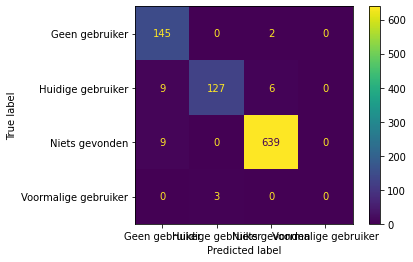

                      precision    recall  f1-score   support

      Geen gebruiker       0.89      0.99      0.94       147
   Huidige gebruiker       0.98      0.89      0.93       142
      Niets gevonden       0.99      0.99      0.99       648
Voormalige gebruiker       0.00      0.00      0.00         3

            accuracy                           0.97       940
           macro avg       0.71      0.72      0.71       940
        weighted avg       0.97      0.97      0.97       940



/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [33]:
# Ngram 3 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(train_set['text'], train_set['label'])  
predicted_nb = random_search.predict(test_set['text'])
print(np.mean(predicted_nb == test_set['label']))
cm = confusion_matrix(test_set['label'], predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(test_set['label'], predicted_nb,
    target_names=random_search.classes_))

# Drugs

## Experiment 1

In [34]:
drugs_corpus = Corpus[["text", "Drugs"]].rename(columns={"Drugs":"label"})

In [35]:
drugs_corpus

,text,label
0,Beloop: \tPatiÃ«nte heeft 10 minuten van te vo...,Niets gevonden
1,Beloop: \tG5P4 36 wkGrav 1e lijnALL geen Hb Pa...,Niets gevonden
2,Conclusie: \tNormale nacontrole. Kijkt goed te...,Niets gevonden
3,Beleid: \tAlgemeen: Dagopname voor 3x PC a 2....,Niets gevonden
4,Anamnese: \t34W4D,Niets gevonden
...,...,...
4695,Beloop: \tCONSULTENKAMERGezien door co-ass Y. ...,Geen gebruiker
4696,Reden van komst / Verwijzing: \tReden verwijzi...,Geen gebruiker
4697,"Beloop: \tMR CPG7P4M4 // MI: 4x sectio ia, 1x...",Geen gebruiker
4698,Reden van komst / Verwijzing: \tReden van koms...,Geen gebruiker


In [36]:
drugs_corpus['text'] = drugs_corpus['text'].str.replace('\t',' ')
drugs_corpus.drop_duplicates(inplace=True)
drugs_corpus['text'] = drugs_corpus['text'].astype(str)

In [37]:
stemmer = SnowballStemmer("dutch")
drugs_corpus['text'] = drugs_corpus['text'].str.lower()
drugs_corpus['text'] = [stemmer.stem(text) for text in drugs_corpus['text']]
drugs_corpus = drugs_corpus.drop(drugs_corpus[drugs_corpus.label == '--'].index)
drugs_corpus_backup = drugs_corpus.copy()

In [38]:
test_set = drugs_corpus.loc[indices['index']]
train_set = drugs_corpus.loc[~drugs_corpus.index.isin(test_set.index)]

In [39]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 24.21, NNZs: 4615, Bias: 0.000000, T: 2256, Avg. loss: 0.372406
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 33.69, NNZs: 2438, Bias: 0.000000, T: 4512, Avg. loss: 0.242599
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 40.62, NNZs: 1850, Bias: 0.000000, T: 6768, Avg. loss: 0.207252
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 46.30, NNZs: 1527, Bias: 0.000000, T: 9024, Avg. loss: 0.187163
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 51.09, NNZs: 1305, Bias: 0.000000, T: 11280, Avg. loss: 0.174724
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 55.42, NNZs: 1167, Bias: 0.000000, T: 13536, Avg. loss: 0.165470
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 56.17, NNZs: 1121, Bias: 0.000000, T: 15792, Avg. loss: 0.158781
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 56.90, NNZs: 1103, Bias: 0.000000, T: 18048, Avg. loss: 0.157306
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 57.63, NNZs: 1088, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


Norm: 60.11, NNZs: 1090, Bias: 0.000000, T: 29328, Avg. loss: 0.121032
Total training time: 0.09 seconds.
-- Epoch 14
Norm: 60.25, NNZs: 1087, Bias: 0.000000, T: 31584, Avg. loss: 0.120842
Total training time: 0.10 seconds.
-- Epoch 15
Norm: 60.39, NNZs: 1083, Bias: 0.000000, T: 33840, Avg. loss: 0.120649
Total training time: 0.11 seconds.
-- Epoch 16
Norm: 60.53, NNZs: 1078, Bias: 0.000000, T: 36096, Avg. loss: 0.120453
Total training time: 0.11 seconds.
-- Epoch 17
Norm: 60.56, NNZs: 1075, Bias: 0.000000, T: 38352, Avg. loss: 0.120292
Total training time: 0.12 seconds.
-- Epoch 18
Norm: 60.58, NNZs: 1074, Bias: 0.000000, T: 40608, Avg. loss: 0.120257
Total training time: 0.13 seconds.
-- Epoch 19
Norm: 60.61, NNZs: 1072, Bias: 0.000000, T: 42864, Avg. loss: 0.120221
Total training time: 0.13 seconds.
-- Epoch 20
Norm: 60.64, NNZs: 1066, Bias: 0.000000, T: 45120, Avg. loss: 0.120183
Total training time: 0.14 seconds.
-- Epoch 1
Norm: 21.81, NNZs: 2083, Bias: 0.000000, T: 2256, Avg. lo

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.454 total time=   2.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 24.06, NNZs: 4502, Bias: 0.000000, T: 2256, Avg. loss: 0.378823
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 33.69, NNZs: 2376, Bias: 0.000000, T: 4512, Avg. loss: 0.247574
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.67, NNZs: 1855, Bias: 0.000000, T: 6768, Avg. loss: 0.210898
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 46.30, NNZs: 1589, Bias: 0.000000, T: 9024, Avg. loss: 0.192550
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 51.25, NNZs: 1344, Bias: 0.000000, T: 11280, Avg. loss: 0.179227
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 55.55, NNZs: 1190, Bias: 0.000000, T: 13536, Avg. loss: 0.169114
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 56.33, NNZs: 1138, Bias: 0.000000, T: 15792, Avg. loss: 0.162885
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 57.09, NNZs: 1120, Bias: 0.000000, T: 18048, Avg. loss: 0.161492
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 57.84, NNZs: 1111, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


Norm: 60.92, NNZs: 1076, Bias: 0.000000, T: 38352, Avg. loss: 0.124888
Total training time: 0.12 seconds.
-- Epoch 18
Norm: 60.95, NNZs: 1076, Bias: 0.000000, T: 40608, Avg. loss: 0.124849
Total training time: 0.13 seconds.
-- Epoch 19
Norm: 60.98, NNZs: 1074, Bias: 0.000000, T: 42864, Avg. loss: 0.124811
Total training time: 0.14 seconds.
-- Epoch 20
Norm: 61.01, NNZs: 1074, Bias: 0.000000, T: 45120, Avg. loss: 0.124770
Total training time: 0.14 seconds.
-- Epoch 1
Norm: 22.06, NNZs: 2206, Bias: 0.000000, T: 2256, Avg. loss: 0.143931
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 27.83, NNZs: 935, Bias: 0.000000, T: 4512, Avg. loss: 0.067662
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 31.72, NNZs: 673, Bias: 0.000000, T: 6768, Avg. loss: 0.057403
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 34.70, NNZs: 534, Bias: 0.000000, T: 9024, Avg. loss: 0.052476
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 37.19, NNZs: 470, Bias: 0.000000, T: 11280, Avg. loss: 0.04974

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.465 total time=   1.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 23.90, NNZs: 4759, Bias: 0.000000, T: 2256, Avg. loss: 0.390999
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 33.38, NNZs: 2435, Bias: 0.000000, T: 4512, Avg. loss: 0.264020
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.30, NNZs: 1889, Bias: 0.000000, T: 6768, Avg. loss: 0.227788
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 46.07, NNZs: 1566, Bias: 0.000000, T: 9024, Avg. loss: 0.208517
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 51.01, NNZs: 1353, Bias: 0.000000, T: 11280, Avg. loss: 0.194129
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 55.36, NNZs: 1212, Bias: 0.000000, T: 13536, Avg. loss: 0.184516
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 56.15, NNZs: 1180, Bias: 0.000000, T: 15792, Avg. loss: 0.177806
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 56.92, NNZs: 1152, Bias: 0.000000, T: 18048, Avg. loss: 0.176255
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 57.69, NNZs: 1135, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


-- Epoch 17
Norm: 60.87, NNZs: 1094, Bias: 0.000000, T: 38352, Avg. loss: 0.133378
Total training time: 0.12 seconds.
-- Epoch 18
Norm: 60.89, NNZs: 1092, Bias: 0.000000, T: 40608, Avg. loss: 0.133341
Total training time: 0.13 seconds.
-- Epoch 19
Norm: 60.92, NNZs: 1091, Bias: 0.000000, T: 42864, Avg. loss: 0.133299
Total training time: 0.13 seconds.
-- Epoch 20
Norm: 60.95, NNZs: 1088, Bias: 0.000000, T: 45120, Avg. loss: 0.133260
Total training time: 0.14 seconds.
-- Epoch 1
Norm: 22.03, NNZs: 2167, Bias: 0.000000, T: 2256, Avg. loss: 0.143248
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 27.66, NNZs: 933, Bias: 0.000000, T: 4512, Avg. loss: 0.067566
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 31.52, NNZs: 660, Bias: 0.000000, T: 6768, Avg. loss: 0.057583
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 34.57, NNZs: 538, Bias: 0.000000, T: 9024, Avg. loss: 0.052913
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 37.08, NNZs: 440, Bias: 0.000000, T: 11280, Avg. l

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.483 total time=   1.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 24.19, NNZs: 4449, Bias: 0.000000, T: 2256, Avg. loss: 0.371827
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 33.43, NNZs: 2241, Bias: 0.000000, T: 4512, Avg. loss: 0.244003
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.27, NNZs: 1740, Bias: 0.000000, T: 6768, Avg. loss: 0.209746
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 45.89, NNZs: 1439, Bias: 0.000000, T: 9024, Avg. loss: 0.191518
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 50.72, NNZs: 1257, Bias: 0.000000, T: 11280, Avg. loss: 0.178344
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 55.02, NNZs: 1110, Bias: 0.000000, T: 13536, Avg. loss: 0.168571
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 55.77, NNZs: 1069, Bias: 0.000000, T: 15792, Avg. loss: 0.162098
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 56.50, NNZs: 1045, Bias: 0.000000, T: 18048, Avg. loss: 0.160692
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 57.23, NNZs: 1030, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


Norm: 60.31, NNZs: 977, Bias: 0.000000, T: 38352, Avg. loss: 0.122112
Total training time: 0.12 seconds.
-- Epoch 18
Norm: 60.33, NNZs: 977, Bias: 0.000000, T: 40608, Avg. loss: 0.122076
Total training time: 0.13 seconds.
-- Epoch 19
Norm: 60.36, NNZs: 974, Bias: 0.000000, T: 42864, Avg. loss: 0.122039
Total training time: 0.14 seconds.
-- Epoch 20
Norm: 60.39, NNZs: 973, Bias: 0.000000, T: 45120, Avg. loss: 0.122002
Total training time: 0.14 seconds.
-- Epoch 1
Norm: 22.00, NNZs: 2144, Bias: 0.000000, T: 2256, Avg. loss: 0.140352
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 27.69, NNZs: 960, Bias: 0.000000, T: 4512, Avg. loss: 0.064491
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 31.31, NNZs: 667, Bias: 0.000000, T: 6768, Avg. loss: 0.054771
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 34.32, NNZs: 528, Bias: 0.000000, T: 9024, Avg. loss: 0.051258
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 36.74, NNZs: 420, Bias: 0.000000, T: 11280, Avg. loss: 0.048352
To

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.456 total time=   1.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 23.98, NNZs: 4687, Bias: 0.000000, T: 2256, Avg. loss: 0.368798
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 33.34, NNZs: 2347, Bias: 0.000000, T: 4512, Avg. loss: 0.240981
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 40.30, NNZs: 1857, Bias: 0.000000, T: 6768, Avg. loss: 0.207760
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 45.83, NNZs: 1580, Bias: 0.000000, T: 9024, Avg. loss: 0.188489
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 50.53, NNZs: 1370, Bias: 0.000000, T: 11280, Avg. loss: 0.176599
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 54.78, NNZs: 1196, Bias: 0.000000, T: 13536, Avg. loss: 0.167920
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 55.53, NNZs: 1149, Bias: 0.000000, T: 15792, Avg. loss: 0.161530
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 56.27, NNZs: 1128, Bias: 0.000000, T: 18048, Avg. loss: 0.160219
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 56.99, NNZs: 1112, Bias: 0.000000, T: 20304, Avg. l

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


Norm: 59.98, NNZs: 1086, Bias: 0.000000, T: 36096, Avg. loss: 0.123746
Total training time: 0.12 seconds.
-- Epoch 17
Norm: 60.00, NNZs: 1085, Bias: 0.000000, T: 38352, Avg. loss: 0.123578
Total training time: 0.13 seconds.
-- Epoch 18
Norm: 60.03, NNZs: 1085, Bias: 0.000000, T: 40608, Avg. loss: 0.123546
Total training time: 0.13 seconds.
-- Epoch 19
Norm: 60.06, NNZs: 1084, Bias: 0.000000, T: 42864, Avg. loss: 0.123509
Total training time: 0.14 seconds.
-- Epoch 20
Norm: 60.09, NNZs: 1083, Bias: 0.000000, T: 45120, Avg. loss: 0.123472
Total training time: 0.15 seconds.
-- Epoch 1
Norm: 21.91, NNZs: 2097, Bias: 0.000000, T: 2256, Avg. loss: 0.139690
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 27.55, NNZs: 927, Bias: 0.000000, T: 4512, Avg. loss: 0.065050
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 31.35, NNZs: 651, Bias: 0.000000, T: 6768, Avg. loss: 0.055387
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 34.23, NNZs: 508, Bias: 0.000000, T: 9024, Avg. loss: 0.050

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.460 total time=   2.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 136399865443107.08, NNZs: 20242, Bias: 0.000000, T: 2256, Avg. loss: 2895400461871134374100992.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 90253939288077.56, NNZs: 20242, Bias: 0.000000, T: 4512, Avg. loss: 6470054885660864720928768.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 64926105156142.91, NNZs: 20242, Bias: 0.000000, T: 6768, Avg. loss: 2378694738842177998159872.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 47404580578558.70, NNZs: 20242, Bias: 0.000000, T: 9024, Avg. loss: 1139663001965593026887680.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 35104471567215.73, NNZs: 20242, Bias: 0.000000, T: 11280, Avg. loss: 565081641414579388940288.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 26596769544535.94, NNZs: 20242, Bias: 0.000000, T: 13536, Avg. loss: 281985318063253091254272.000000
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 134288384560208.77,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 138736941360665.23, NNZs: 20286, Bias: 0.000000, T: 2256, Avg. loss: 3091199460552712474591232.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 93775082255068.39, NNZs: 20286, Bias: 0.000000, T: 4512, Avg. loss: 6498660853219750114754560.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 67909811850776.91, NNZs: 20286, Bias: 0.000000, T: 6768, Avg. loss: 2568693420288364433637376.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 49760411591814.72, NNZs: 20286, Bias: 0.000000, T: 9024, Avg. loss: 1244134251871307424595968.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 37477426708862.99, NNZs: 20286, Bias: 0.000000, T: 11280, Avg. loss: 602709387862436407672832.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 28730913957719.48, NNZs: 20286, Bias: 0.000000, T: 13536, Avg. loss: 306194120902529494548480.000000
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 131033236252963.11,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 138701538809020.58, NNZs: 20900, Bias: 0.000000, T: 2256, Avg. loss: 3201125591850014549737472.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 92870407106674.84, NNZs: 20902, Bias: 0.000000, T: 4512, Avg. loss: 6522787196941336695537664.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 66809418903469.48, NNZs: 20902, Bias: 0.000000, T: 6768, Avg. loss: 2555205038689255153467392.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 48861484742868.33, NNZs: 20902, Bias: 0.000000, T: 9024, Avg. loss: 1213730362028606361698304.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 36603505400237.48, NNZs: 20902, Bias: 0.000000, T: 11280, Avg. loss: 587676206180344390483968.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 27851171464522.94, NNZs: 20902, Bias: 0.000000, T: 13536, Avg. loss: 300670480780760807636992.000000
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 136138593029610.50,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 142116275295509.31, NNZs: 21041, Bias: 0.000000, T: 2256, Avg. loss: 3120160307470367260147712.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 95186628493537.77, NNZs: 21041, Bias: 0.000000, T: 4512, Avg. loss: 6966363887813215075172352.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 67789653372968.30, NNZs: 21041, Bias: 0.000000, T: 6768, Avg. loss: 2715140556950613354610688.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 49733569905113.89, NNZs: 21041, Bias: 0.000000, T: 9024, Avg. loss: 1240439039670108083453952.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 37440021840072.22, NNZs: 21041, Bias: 0.000000, T: 11280, Avg. loss: 611157662970076723150848.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 28402547914545.73, NNZs: 21041, Bias: 0.000000, T: 13536, Avg. loss: 318320130340711022198784.000000
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 135841634898177.17,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 136502481989103.17, NNZs: 20998, Bias: 0.000000, T: 2256, Avg. loss: 3042205183279164850962432.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 91989882388820.97, NNZs: 20998, Bias: 0.000000, T: 4512, Avg. loss: 6343251388010779658682368.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 66004242828396.64, NNZs: 20998, Bias: 0.000000, T: 6768, Avg. loss: 2467341477170261128118272.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 48793307890851.83, NNZs: 20998, Bias: 0.000000, T: 9024, Avg. loss: 1158091325051283783548928.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 36532640390954.74, NNZs: 20998, Bias: 0.000000, T: 11280, Avg. loss: 584218370232888443535360.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 27645113885334.36, NNZs: 20998, Bias: 0.000000, T: 13536, Avg. loss: 299681169753429589884928.000000
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 108111439907693.12,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 36.20, NNZs: 10520, Bias: 0.000000, T: 2256, Avg. loss: 0.215204
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 43.26, NNZs: 4546, Bias: 0.000000, T: 4512, Avg. loss: 0.058325
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 49.00, NNZs: 3097, Bias: 0.000000, T: 6768, Avg. loss: 0.042961
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 53.82, NNZs: 2436, Bias: 0.000000, T: 9024, Avg. loss: 0.036726
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 57.89, NNZs: 2048, Bias: 0.000000, T: 11280, Avg. loss: 0.030955
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 61.51, NNZs: 1761, Bias: 0.000000, T: 13536, Avg. loss: 0.030026
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 23.15, NNZs: 4546, Bias: 0.000000, T: 2256, Avg. loss: 0.095755
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 28.39, NNZs: 2233, Bias: 0.000000, T: 4512, Avg. loss: 0.025659
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 32.12, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 38.09, NNZs: 11641, Bias: 0.000000, T: 2256, Avg. loss: 0.253667
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 44.85, NNZs: 5007, Bias: 0.000000, T: 4512, Avg. loss: 0.050801
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 50.64, NNZs: 3340, Bias: 0.000000, T: 6768, Avg. loss: 0.045174
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 55.56, NNZs: 2583, Bias: 0.000000, T: 9024, Avg. loss: 0.037367
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 59.78, NNZs: 2084, Bias: 0.000000, T: 11280, Avg. loss: 0.034118
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 63.51, NNZs: 1791, Bias: 0.000000, T: 13536, Avg. loss: 0.029936
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 23.80, NNZs: 4596, Bias: 0.000000, T: 2256, Avg. loss: 0.101806
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 28.90, NNZs: 2366, Bias: 0.000000, T: 4512, Avg. loss: 0.027015
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 32.96, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 38.27, NNZs: 11413, Bias: 0.000000, T: 2256, Avg. loss: 0.258320
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 45.34, NNZs: 5129, Bias: 0.000000, T: 4512, Avg. loss: 0.054948
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 51.31, NNZs: 3482, Bias: 0.000000, T: 6768, Avg. loss: 0.043819
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 56.21, NNZs: 2657, Bias: 0.000000, T: 9024, Avg. loss: 0.037954
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 60.53, NNZs: 2183, Bias: 0.000000, T: 11280, Avg. loss: 0.032527
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 64.30, NNZs: 1862, Bias: 0.000000, T: 13536, Avg. loss: 0.029909
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 23.19, NNZs: 4440, Bias: 0.000000, T: 2256, Avg. loss: 0.092596
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 28.18, NNZs: 2220, Bias: 0.000000, T: 4512, Avg. loss: 0.023301
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 32.29, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 36.97, NNZs: 10768, Bias: 0.000000, T: 2256, Avg. loss: 0.228775
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 43.80, NNZs: 4792, Bias: 0.000000, T: 4512, Avg. loss: 0.049572
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 49.51, NNZs: 3089, Bias: 0.000000, T: 6768, Avg. loss: 0.040310
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 54.13, NNZs: 2373, Bias: 0.000000, T: 9024, Avg. loss: 0.033546
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 58.25, NNZs: 1956, Bias: 0.000000, T: 11280, Avg. loss: 0.031503
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 61.85, NNZs: 1713, Bias: 0.000000, T: 13536, Avg. loss: 0.027429
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 22.98, NNZs: 4451, Bias: 0.000000, T: 2256, Avg. loss: 0.090596
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 28.23, NNZs: 2117, Bias: 0.000000, T: 4512, Avg. loss: 0.026515
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 32.08, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 36.65, NNZs: 10904, Bias: 0.000000, T: 2256, Avg. loss: 0.229098
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 43.41, NNZs: 4637, Bias: 0.000000, T: 4512, Avg. loss: 0.049269
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 49.11, NNZs: 3114, Bias: 0.000000, T: 6768, Avg. loss: 0.039842
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 53.72, NNZs: 2429, Bias: 0.000000, T: 9024, Avg. loss: 0.032619
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 57.86, NNZs: 1993, Bias: 0.000000, T: 11280, Avg. loss: 0.030765
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 61.51, NNZs: 1673, Bias: 0.000000, T: 13536, Avg. loss: 0.028061
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 23.07, NNZs: 4342, Bias: 0.000000, T: 2256, Avg. loss: 0.090867
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 27.88, NNZs: 2094, Bias: 0.000000, T: 4512, Avg. loss: 0.023668
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 31.82, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 13.58, NNZs: 5779, Bias: 0.000000, T: 2256, Avg. loss: 0.157410
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 17.75, NNZs: 3514, Bias: 0.000000, T: 4512, Avg. loss: 0.089114
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 20.81, NNZs: 2759, Bias: 0.000000, T: 6768, Avg. loss: 0.075131
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.39, NNZs: 2314, Bias: 0.000000, T: 9024, Avg. loss: 0.065945
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 25.73, NNZs: 2072, Bias: 0.000000, T: 11280, Avg. loss: 0.061376
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 27.70, NNZs: 1865, Bias: 0.000000, T: 13536, Avg. loss: 0.057527
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 70.32, NNZs: 9438, Bias: 0.000000, T: 2256, Avg. loss: 0.565286
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 334.59, NNZs: 13208, Bias: 0.000000, T: 4512, Avg. loss: 27.411078
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1274.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 13.74, NNZs: 5931, Bias: 0.000000, T: 2256, Avg. loss: 0.167412
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 17.79, NNZs: 3709, Bias: 0.000000, T: 4512, Avg. loss: 0.097293
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 21.05, NNZs: 3001, Bias: 0.000000, T: 6768, Avg. loss: 0.082196
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.70, NNZs: 2510, Bias: 0.000000, T: 9024, Avg. loss: 0.073602
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 26.05, NNZs: 2212, Bias: 0.000000, T: 11280, Avg. loss: 0.068056
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 28.27, NNZs: 2028, Bias: 0.000000, T: 13536, Avg. loss: 0.063707
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 42.53, NNZs: 9652, Bias: 0.000000, T: 2256, Avg. loss: 0.382372
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 161.15, NNZs: 9861, Bias: 0.000000, T: 4512, Avg. loss: 4.964868
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 761.77,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 13.81, NNZs: 5863, Bias: 0.000000, T: 2256, Avg. loss: 0.171529
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 18.02, NNZs: 3765, Bias: 0.000000, T: 4512, Avg. loss: 0.097947
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 21.20, NNZs: 2992, Bias: 0.000000, T: 6768, Avg. loss: 0.083633
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.97, NNZs: 2532, Bias: 0.000000, T: 9024, Avg. loss: 0.075272
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 26.49, NNZs: 2268, Bias: 0.000000, T: 11280, Avg. loss: 0.068322
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 28.64, NNZs: 2080, Bias: 0.000000, T: 13536, Avg. loss: 0.064681
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 87.10, NNZs: 12046, Bias: 0.000000, T: 2256, Avg. loss: 1.751067
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1886.18, NNZs: 17512, Bias: 0.000000, T: 4512, Avg. loss: 752.531552
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 14

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 13.69, NNZs: 5812, Bias: 0.000000, T: 2256, Avg. loss: 0.163631
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 17.63, NNZs: 3622, Bias: 0.000000, T: 4512, Avg. loss: 0.093694
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 20.85, NNZs: 2846, Bias: 0.000000, T: 6768, Avg. loss: 0.080266
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.58, NNZs: 2422, Bias: 0.000000, T: 9024, Avg. loss: 0.071614
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 25.91, NNZs: 2166, Bias: 0.000000, T: 11280, Avg. loss: 0.066287
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 28.02, NNZs: 1949, Bias: 0.000000, T: 13536, Avg. loss: 0.061975
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 176.64, NNZs: 10618, Bias: 0.000000, T: 2256, Avg. loss: 1.693567
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 911.87, NNZs: 17441, Bias: 0.000000, T: 4512, Avg. loss: 172.258195
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 87

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 13.68, NNZs: 5788, Bias: 0.000000, T: 2256, Avg. loss: 0.160613
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 17.65, NNZs: 3728, Bias: 0.000000, T: 4512, Avg. loss: 0.093908
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 20.78, NNZs: 2952, Bias: 0.000000, T: 6768, Avg. loss: 0.079661
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.42, NNZs: 2508, Bias: 0.000000, T: 9024, Avg. loss: 0.070997
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 25.79, NNZs: 2248, Bias: 0.000000, T: 11280, Avg. loss: 0.065659
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 27.87, NNZs: 2047, Bias: 0.000000, T: 13536, Avg. loss: 0.061373
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 40.16, NNZs: 9913, Bias: 0.000000, T: 2256, Avg. loss: 0.418924
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 134.85, NNZs: 9587, Bias: 0.000000, T: 4512, Avg. loss: 2.933631
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 813.73,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.33, NNZs: 35570, Bias: -0.076996, T: 2256, Avg. loss: 0.197509
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.83, NNZs: 35570, Bias: -0.104205, T: 4512, Avg. loss: 0.174577
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.22, NNZs: 35570, Bias: -0.124866, T: 6768, Avg. loss: 0.160627
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.56, NNZs: 35570, Bias: -0.142259, T: 9024, Avg. loss: 0.149357
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.85, NNZs: 35570, Bias: -0.157573, T: 11280, Avg. loss: 0.139611
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 3.12, NNZs: 35570, Bias: -0.171296, T: 13536, Avg. loss: 0.130957
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 2.22, NNZs: 35570, Bias: -0.116717, T: 2256, Avg. loss: 0.129167
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.76, NNZs: 35570, Bias: -0.154974, T: 4512, Avg. loss: 0.070549
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.15, NNZs: 36165, Bias: -0.066329, T: 2256, Avg. loss: 0.200336
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.65, NNZs: 36165, Bias: -0.093064, T: 4512, Avg. loss: 0.179000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.05, NNZs: 36165, Bias: -0.113527, T: 6768, Avg. loss: 0.165518
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.38, NNZs: 36165, Bias: -0.130806, T: 9024, Avg. loss: 0.154593
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.67, NNZs: 36165, Bias: -0.146068, T: 11280, Avg. loss: 0.145130
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.94, NNZs: 36165, Bias: -0.159902, T: 13536, Avg. loss: 0.136650
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 2.13, NNZs: 36165, Bias: -0.114993, T: 2256, Avg. loss: 0.131619
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.65, NNZs: 36165, Bias: -0.153194, T: 4512, Avg. loss: 0.075931
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.11, NNZs: 37176, Bias: -0.064631, T: 2256, Avg. loss: 0.201480
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.58, NNZs: 37176, Bias: -0.090977, T: 4512, Avg. loss: 0.182101
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.95, NNZs: 37176, Bias: -0.111253, T: 6768, Avg. loss: 0.169783
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 37176, Bias: -0.128416, T: 9024, Avg. loss: 0.159787
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.55, NNZs: 37176, Bias: -0.143597, T: 11280, Avg. loss: 0.151124
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.80, NNZs: 37176, Bias: -0.157372, T: 13536, Avg. loss: 0.143360
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 2.17, NNZs: 37176, Bias: -0.115162, T: 2256, Avg. loss: 0.130955
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.68, NNZs: 37176, Bias: -0.153063, T: 4512, Avg. loss: 0.075350
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.14, NNZs: 37234, Bias: -0.066421, T: 2256, Avg. loss: 0.200452
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.63, NNZs: 37234, Bias: -0.092901, T: 4512, Avg. loss: 0.179557
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 37234, Bias: -0.113232, T: 6768, Avg. loss: 0.166221
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.35, NNZs: 37234, Bias: -0.130428, T: 9024, Avg. loss: 0.155389
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.65, NNZs: 37234, Bias: -0.145631, T: 11280, Avg. loss: 0.145995
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.92, NNZs: 37234, Bias: -0.159419, T: 13536, Avg. loss: 0.137575
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 2.15, NNZs: 37234, Bias: -0.114957, T: 2256, Avg. loss: 0.130901
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.66, NNZs: 37234, Bias: -0.152855, T: 4512, Avg. loss: 0.075618
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 1.15, NNZs: 37169, Bias: -0.066392, T: 2256, Avg. loss: 0.200258
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.65, NNZs: 37169, Bias: -0.093052, T: 4512, Avg. loss: 0.178854
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.04, NNZs: 37169, Bias: -0.113483, T: 6768, Avg. loss: 0.165204
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.38, NNZs: 37169, Bias: -0.130744, T: 9024, Avg. loss: 0.154124
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.68, NNZs: 37169, Bias: -0.145994, T: 11280, Avg. loss: 0.144519
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.95, NNZs: 37169, Bias: -0.159816, T: 13536, Avg. loss: 0.135909
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 2.14, NNZs: 37169, Bias: -0.114392, T: 2256, Avg. loss: 0.129807
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.65, NNZs: 37169, Bias: -0.151881, T: 4512, Avg. loss: 0.074412
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 90.44, NNZs: 34955, Bias: -1.032679, T: 2256, Avg. loss: 0.855511
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.19, NNZs: 35379, Bias: -0.920046, T: 4512, Avg. loss: 0.911686
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 34.83, NNZs: 35503, Bias: -1.119673, T: 6768, Avg. loss: 0.291173
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 27.68, NNZs: 35519, Bias: -1.030261, T: 9024, Avg. loss: 0.168345
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 24.66, NNZs: 35524, Bias: -1.071113, T: 11280, Avg. loss: 0.069140
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 22.57, NNZs: 35533, Bias: -1.077115, T: 13536, Avg. loss: 0.030761
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 90.24, NNZs: 34992, Bias: -0.916491, T: 2256, Avg. loss: 0.835617
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 39.62, NNZs: 35396, Bias: -0.913356, T: 4512, Avg. loss: 0.931306
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 92.56, NNZs: 35675, Bias: -0.989206, T: 2256, Avg. loss: 0.876532
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.83, NNZs: 35988, Bias: -0.900625, T: 4512, Avg. loss: 0.911511
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 34.38, NNZs: 36085, Bias: -1.038024, T: 6768, Avg. loss: 0.291798
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 27.39, NNZs: 36101, Bias: -1.098941, T: 9024, Avg. loss: 0.166786
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 24.96, NNZs: 36111, Bias: -1.069799, T: 11280, Avg. loss: 0.074231
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 23.61, NNZs: 36123, Bias: -1.099825, T: 13536, Avg. loss: 0.029320
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 88.99, NNZs: 35444, Bias: -1.004355, T: 2256, Avg. loss: 0.811183
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 40.41, NNZs: 35909, Bias: -0.947239, T: 4512, Avg. loss: 0.896840
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 91.85, NNZs: 36708, Bias: -1.086944, T: 2256, Avg. loss: 0.893491
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.63, NNZs: 36923, Bias: -0.932296, T: 4512, Avg. loss: 0.909407
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.06, NNZs: 37050, Bias: -1.066485, T: 6768, Avg. loss: 0.283805
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 27.44, NNZs: 37068, Bias: -1.129551, T: 9024, Avg. loss: 0.169872
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 24.46, NNZs: 37075, Bias: -1.093610, T: 11280, Avg. loss: 0.076167
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 23.15, NNZs: 37081, Bias: -1.121571, T: 13536, Avg. loss: 0.029155
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 89.27, NNZs: 36352, Bias: -0.746552, T: 2256, Avg. loss: 0.812179
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 39.54, NNZs: 36487, Bias: -0.820964, T: 4512, Avg. loss: 0.918142
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 92.29, NNZs: 36766, Bias: -0.874410, T: 2256, Avg. loss: 0.877945
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.48, NNZs: 36845, Bias: -0.748548, T: 4512, Avg. loss: 0.923787
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 35.06, NNZs: 37196, Bias: -1.045464, T: 6768, Avg. loss: 0.293798
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 27.64, NNZs: 37207, Bias: -0.959359, T: 9024, Avg. loss: 0.172137
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 24.75, NNZs: 37226, Bias: -1.051193, T: 11280, Avg. loss: 0.075358
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 23.79, NNZs: 37228, Bias: -1.019978, T: 13536, Avg. loss: 0.030080
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 90.17, NNZs: 36725, Bias: -1.018573, T: 2256, Avg. loss: 0.833043
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 38.50, NNZs: 37066, Bias: -0.835251, T: 4512, Avg. loss: 0.944721
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 92.34, NNZs: 36550, Bias: -1.220703, T: 2256, Avg. loss: 0.862201
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 40.97, NNZs: 36934, Bias: -0.857185, T: 4512, Avg. loss: 0.928839
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 34.94, NNZs: 37071, Bias: -1.158575, T: 6768, Avg. loss: 0.278136
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 27.05, NNZs: 37079, Bias: -1.075293, T: 9024, Avg. loss: 0.169830
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 24.08, NNZs: 37086, Bias: -1.095330, T: 11280, Avg. loss: 0.067211
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 22.22, NNZs: 37093, Bias: -1.071491, T: 13536, Avg. loss: 0.026464
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 89.03, NNZs: 36483, Bias: -0.883139, T: 2256, Avg. loss: 0.818370
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 38.40, NNZs: 36871, Bias: -0.912821, T: 4512, Avg. loss: 0.943398
Total training time: 0.01 seconds.
-- Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 31.88, NNZs: 4254, Bias: 0.000000, T: 2256, Avg. loss: 0.206276
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.04, NNZs: 2488, Bias: 0.000000, T: 4512, Avg. loss: 0.100195
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 49.43, NNZs: 1857, Bias: 0.000000, T: 6768, Avg. loss: 0.073817
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 55.69, NNZs: 1560, Bias: 0.000000, T: 9024, Avg. loss: 0.061981
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 61.16, NNZs: 1389, Bias: 0.000000, T: 11280, Avg. loss: 0.053222
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 66.05, NNZs: 1257, Bias: 0.000000, T: 13536, Avg. loss: 0.046279
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 68.12, NNZs: 6163, Bias: 0.000000, T: 2256, Avg. loss: 0.338413
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 80.52, NNZs: 3957, Bias: 0.000000, T: 4512, Avg. loss: 0.142355
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 82.99, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 31.84, NNZs: 4266, Bias: 0.000000, T: 2256, Avg. loss: 0.199187
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.64, NNZs: 2427, Bias: 0.000000, T: 4512, Avg. loss: 0.098707
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 49.08, NNZs: 1863, Bias: 0.000000, T: 6768, Avg. loss: 0.076321
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 55.19, NNZs: 1512, Bias: 0.000000, T: 9024, Avg. loss: 0.064964
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 60.52, NNZs: 1363, Bias: 0.000000, T: 11280, Avg. loss: 0.057359
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 65.34, NNZs: 1176, Bias: 0.000000, T: 13536, Avg. loss: 0.051824
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 74.36, NNZs: 7184, Bias: 0.000000, T: 2256, Avg. loss: 0.332937
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 87.07, NNZs: 4482, Bias: 0.000000, T: 4512, Avg. loss: 0.117159
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 92.90, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 32.61, NNZs: 4405, Bias: 0.000000, T: 2256, Avg. loss: 0.209384
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.67, NNZs: 2619, Bias: 0.000000, T: 4512, Avg. loss: 0.105113
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 50.43, NNZs: 1968, Bias: 0.000000, T: 6768, Avg. loss: 0.080683
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 57.04, NNZs: 1645, Bias: 0.000000, T: 9024, Avg. loss: 0.067844
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 62.64, NNZs: 1439, Bias: 0.000000, T: 11280, Avg. loss: 0.060000
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 67.81, NNZs: 1318, Bias: 0.000000, T: 13536, Avg. loss: 0.052325
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 72.50, NNZs: 6666, Bias: 0.000000, T: 2256, Avg. loss: 0.326433
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 82.93, NNZs: 4149, Bias: 0.000000, T: 4512, Avg. loss: 0.128645
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 88.97, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 32.17, NNZs: 4407, Bias: 0.000000, T: 2256, Avg. loss: 0.210986
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.18, NNZs: 2604, Bias: 0.000000, T: 4512, Avg. loss: 0.097338
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 49.84, NNZs: 1970, Bias: 0.000000, T: 6768, Avg. loss: 0.074112
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 55.86, NNZs: 1616, Bias: 0.000000, T: 9024, Avg. loss: 0.061901
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 61.74, NNZs: 1441, Bias: 0.000000, T: 11280, Avg. loss: 0.054071
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 66.40, NNZs: 1277, Bias: 0.000000, T: 13536, Avg. loss: 0.047994
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 70.21, NNZs: 6918, Bias: 0.000000, T: 2256, Avg. loss: 0.360722
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 82.75, NNZs: 4379, Bias: 0.000000, T: 4512, Avg. loss: 0.104592
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 87.26, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 30.82, NNZs: 3924, Bias: 0.000000, T: 2256, Avg. loss: 0.188541
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41.04, NNZs: 2363, Bias: 0.000000, T: 4512, Avg. loss: 0.099872
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 48.78, NNZs: 1841, Bias: 0.000000, T: 6768, Avg. loss: 0.075367
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 55.26, NNZs: 1551, Bias: 0.000000, T: 9024, Avg. loss: 0.062742
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 60.89, NNZs: 1377, Bias: 0.000000, T: 11280, Avg. loss: 0.052266
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 65.70, NNZs: 1222, Bias: 0.000000, T: 13536, Avg. loss: 0.046153
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 72.71, NNZs: 6413, Bias: 0.000000, T: 2256, Avg. loss: 0.305998
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 86.20, NNZs: 4528, Bias: 0.000000, T: 4512, Avg. loss: 0.108880
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 92.11, N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.25, NNZs: 20243, Bias: 0.000000, T: 2256, Avg. loss: 0.697439
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 20243, Bias: 0.000000, T: 4512, Avg. loss: 0.684023
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.41, NNZs: 20243, Bias: 0.000000, T: 6768, Avg. loss: 0.675866
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 20243, Bias: 0.000000, T: 9024, Avg. loss: 0.669409
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.52, NNZs: 20243, Bias: 0.000000, T: 11280, Avg. loss: 0.663930
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.56, NNZs: 20243, Bias: 0.000000, T: 13536, Avg. loss: 0.659102
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.36, NNZs: 20243, Bias: 0.000000, T: 2256, Avg. loss: 0.666324
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.49, NNZs: 20243, Bias: 0.000000, T: 4512, Avg. loss: 0.632238
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.59, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.26, NNZs: 20285, Bias: 0.000000, T: 2256, Avg. loss: 0.697503
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.35, NNZs: 20285, Bias: 0.000000, T: 4512, Avg. loss: 0.684566
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.41, NNZs: 20285, Bias: 0.000000, T: 6768, Avg. loss: 0.676844
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 20285, Bias: 0.000000, T: 9024, Avg. loss: 0.670722
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.51, NNZs: 20285, Bias: 0.000000, T: 11280, Avg. loss: 0.665512
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.56, NNZs: 20285, Bias: 0.000000, T: 13536, Avg. loss: 0.660915
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.37, NNZs: 20285, Bias: 0.000000, T: 2256, Avg. loss: 0.665268
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.50, NNZs: 20285, Bias: 0.000000, T: 4512, Avg. loss: 0.631727
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.60, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.24, NNZs: 20900, Bias: 0.000000, T: 2256, Avg. loss: 0.698534
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 20900, Bias: 0.000000, T: 4512, Avg. loss: 0.685955
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.39, NNZs: 20900, Bias: 0.000000, T: 6768, Avg. loss: 0.678398
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.45, NNZs: 20900, Bias: 0.000000, T: 9024, Avg. loss: 0.672404
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.50, NNZs: 20900, Bias: 0.000000, T: 11280, Avg. loss: 0.667326
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.54, NNZs: 20900, Bias: 0.000000, T: 13536, Avg. loss: 0.662833
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.36, NNZs: 20900, Bias: 0.000000, T: 2256, Avg. loss: 0.673155
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.48, NNZs: 20900, Bias: 0.000000, T: 4512, Avg. loss: 0.640021
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.58, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.25, NNZs: 21038, Bias: 0.000000, T: 2256, Avg. loss: 0.697414
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 21038, Bias: 0.000000, T: 4512, Avg. loss: 0.684099
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.41, NNZs: 21038, Bias: 0.000000, T: 6768, Avg. loss: 0.676051
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 21038, Bias: 0.000000, T: 9024, Avg. loss: 0.669691
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.51, NNZs: 21038, Bias: 0.000000, T: 11280, Avg. loss: 0.664283
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.56, NNZs: 21038, Bias: 0.000000, T: 13536, Avg. loss: 0.659510
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.41, NNZs: 21038, Bias: 0.000000, T: 2256, Avg. loss: 0.679766
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.52, NNZs: 21038, Bias: 0.000000, T: 4512, Avg. loss: 0.642762
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.62, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 0.24, NNZs: 20988, Bias: 0.000000, T: 2256, Avg. loss: 0.697959
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 20988, Bias: 0.000000, T: 4512, Avg. loss: 0.684100
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.40, NNZs: 20988, Bias: 0.000000, T: 6768, Avg. loss: 0.675693
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 20988, Bias: 0.000000, T: 9024, Avg. loss: 0.669033
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.51, NNZs: 20988, Bias: 0.000000, T: 11280, Avg. loss: 0.663383
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.56, NNZs: 20988, Bias: 0.000000, T: 13536, Avg. loss: 0.658393
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.36, NNZs: 20988, Bias: 0.000000, T: 2256, Avg. loss: 0.667899
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.48, NNZs: 20988, Bias: 0.000000, T: 4512, Avg. loss: 0.632249
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.58, NN

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 20.03, NNZs: 20245, Bias: 0.000000, T: 2256, Avg. loss: 0.328345
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 26.87, NNZs: 20245, Bias: 0.000000, T: 4512, Avg. loss: 0.195752
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 30.72, NNZs: 20245, Bias: 0.000000, T: 6768, Avg. loss: 0.158840
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 33.18, NNZs: 20245, Bias: 0.000000, T: 9024, Avg. loss: 0.140206
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 34.84, NNZs: 20245, Bias: 0.000000, T: 11280, Avg. loss: 0.129086
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 36.01, NNZs: 20245, Bias: 0.000000, T: 13536, Avg. loss: 0.121914
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 36.28, NNZs: 20245, Bias: 0.000000, T: 15792, Avg. loss: 0.118053
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 36.48, NNZs: 20245, Bias: 0.000000, T: 18048, Avg. loss: 0.114382
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 36.65, NNZs: 20245, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.464 total time=   1.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 19.84, NNZs: 20280, Bias: 0.000000, T: 2256, Avg. loss: 0.332221
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 26.67, NNZs: 20280, Bias: 0.000000, T: 4512, Avg. loss: 0.203957
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 30.59, NNZs: 20280, Bias: 0.000000, T: 6768, Avg. loss: 0.167036
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 33.12, NNZs: 20280, Bias: 0.000000, T: 9024, Avg. loss: 0.147981
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 34.85, NNZs: 20280, Bias: 0.000000, T: 11280, Avg. loss: 0.136463
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 36.06, NNZs: 20280, Bias: 0.000000, T: 13536, Avg. loss: 0.128963
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 36.34, NNZs: 20280, Bias: 0.000000, T: 15792, Avg. loss: 0.126872
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 36.57, NNZs: 20280, Bias: 0.000000, T: 18048, Avg. loss: 0.122686
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 36.76, NNZs: 20280, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.564 total time=   1.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 20.66, NNZs: 20905, Bias: 0.000000, T: 2256, Avg. loss: 0.339505
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 27.21, NNZs: 20905, Bias: 0.000000, T: 4512, Avg. loss: 0.204053
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 30.96, NNZs: 20905, Bias: 0.000000, T: 6768, Avg. loss: 0.167866
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 33.39, NNZs: 20905, Bias: 0.000000, T: 9024, Avg. loss: 0.149224
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 35.08, NNZs: 20905, Bias: 0.000000, T: 11280, Avg. loss: 0.137902
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 36.27, NNZs: 20905, Bias: 0.000000, T: 13536, Avg. loss: 0.130479
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 36.51, NNZs: 20905, Bias: 0.000000, T: 15792, Avg. loss: 0.127341
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 36.72, NNZs: 20905, Bias: 0.000000, T: 18048, Avg. loss: 0.124284
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 36.89, NNZs: 20905, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.485 total time=   1.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 20.52, NNZs: 21039, Bias: 0.000000, T: 2256, Avg. loss: 0.333753
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 26.94, NNZs: 21039, Bias: 0.000000, T: 4512, Avg. loss: 0.196047
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 30.62, NNZs: 21039, Bias: 0.000000, T: 6768, Avg. loss: 0.159833
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 33.00, NNZs: 21039, Bias: 0.000000, T: 9024, Avg. loss: 0.141421
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 34.62, NNZs: 21039, Bias: 0.000000, T: 11280, Avg. loss: 0.130387
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 35.77, NNZs: 21039, Bias: 0.000000, T: 13536, Avg. loss: 0.123248
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 36.00, NNZs: 21039, Bias: 0.000000, T: 15792, Avg. loss: 0.116915
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 36.18, NNZs: 21039, Bias: 0.000000, T: 18048, Avg. loss: 0.114930
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 36.34, NNZs: 21039, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.468 total time=   1.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


-- Epoch 1
Norm: 20.46, NNZs: 20996, Bias: 0.000000, T: 2256, Avg. loss: 0.329812
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 26.91, NNZs: 20996, Bias: 0.000000, T: 4512, Avg. loss: 0.196633
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 30.59, NNZs: 20996, Bias: 0.000000, T: 6768, Avg. loss: 0.160794
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 32.98, NNZs: 20996, Bias: 0.000000, T: 9024, Avg. loss: 0.142335
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 34.62, NNZs: 20996, Bias: 0.000000, T: 11280, Avg. loss: 0.131207
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 35.78, NNZs: 20996, Bias: 0.000000, T: 13536, Avg. loss: 0.123983
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 36.03, NNZs: 20996, Bias: 0.000000, T: 15792, Avg. loss: 0.120410
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 36.24, NNZs: 20996, Bias: 0.000000, T: 18048, Avg. loss: 0.116650
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 36.41, NNZs: 20996, Bias: 0.000000, T: 2030

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.460 total time=   1.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 31.65, NNZs: 11746, Bias: -0.907718, T: 2256, Avg. loss: 0.035831
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 22.46, NNZs: 13771, Bias: -0.899890, T: 4512, Avg. loss: 0.006988
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 16.61, NNZs: 13980, Bias: -0.864159, T: 6768, Avg. loss: 0.000748
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 13.25, NNZs: 14114, Bias: -0.848974, T: 9024, Avg. loss: 0.000631
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 11.13, NNZs: 14248, Bias: -0.824243, T: 11280, Avg. loss: 0.000224
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 9.87, NNZs: 14415, Bias: -0.799354, T: 13536, Avg. loss: 0.000280
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 155.70, NNZs: 11550, Bias: -1.857560, T: 2256, Avg. loss: 0.711657
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 110.21, NNZs: 12566, Bias: -2.122127, T: 4512, Avg. loss: 0.181174
Total training time: 0.00 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 32.09, NNZs: 12446, Bias: -0.953273, T: 2256, Avg. loss: 0.048808
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 22.47, NNZs: 13795, Bias: -0.926439, T: 4512, Avg. loss: 0.004817
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 17.28, NNZs: 14426, Bias: -0.922077, T: 6768, Avg. loss: 0.001309
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 13.87, NNZs: 14548, Bias: -0.907301, T: 9024, Avg. loss: 0.000356
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 11.78, NNZs: 14716, Bias: -0.887206, T: 11280, Avg. loss: 0.000391
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 10.41, NNZs: 14798, Bias: -0.856095, T: 13536, Avg. loss: 0.000309
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 193.24, NNZs: 14426, Bias: -3.269940, T: 2256, Avg. loss: 1.249629
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 127.96, NNZs: 15298, Bias: -3.932056, T: 4512, Avg. loss: 0.169346
Total training time: 0.00 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 32.83, NNZs: 13034, Bias: -1.046340, T: 2256, Avg. loss: 0.053097
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 22.80, NNZs: 14293, Bias: -1.096419, T: 4512, Avg. loss: 0.005796
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 17.14, NNZs: 14657, Bias: -1.050610, T: 6768, Avg. loss: 0.001076
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 13.81, NNZs: 14849, Bias: -1.025520, T: 9024, Avg. loss: 0.000785
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 11.75, NNZs: 14968, Bias: -1.003698, T: 11280, Avg. loss: 0.000324
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 10.41, NNZs: 15150, Bias: -0.979134, T: 13536, Avg. loss: 0.000364
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 176.80, NNZs: 13747, Bias: -2.643294, T: 2256, Avg. loss: 1.230971
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 126.71, NNZs: 15737, Bias: -3.091533, T: 4512, Avg. loss: 0.172820
Total training time: 0.00 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 31.84, NNZs: 12120, Bias: -0.983189, T: 2256, Avg. loss: 0.042207
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 22.13, NNZs: 13684, Bias: -1.062159, T: 4512, Avg. loss: 0.005713
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 16.97, NNZs: 14370, Bias: -1.034520, T: 6768, Avg. loss: 0.002033
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 13.55, NNZs: 14635, Bias: -1.016019, T: 9024, Avg. loss: 0.000435
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 11.63, NNZs: 14832, Bias: -0.977503, T: 11280, Avg. loss: 0.000585
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 10.18, NNZs: 14984, Bias: -0.959852, T: 13536, Avg. loss: 0.000156
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 166.72, NNZs: 13927, Bias: -3.242408, T: 2256, Avg. loss: 1.108388
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 117.75, NNZs: 14557, Bias: -3.423149, T: 4512, Avg. loss: 0.181012
Total training time: 0.00 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1
Norm: 30.61, NNZs: 12093, Bias: -0.997121, T: 2256, Avg. loss: 0.046681
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 21.05, NNZs: 13490, Bias: -1.017995, T: 4512, Avg. loss: 0.005288
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 16.36, NNZs: 13984, Bias: -0.964272, T: 6768, Avg. loss: 0.001016
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 13.38, NNZs: 14419, Bias: -0.952669, T: 9024, Avg. loss: 0.000895
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 11.23, NNZs: 14529, Bias: -0.930285, T: 11280, Avg. loss: 0.000178
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 9.91, NNZs: 14760, Bias: -0.912427, T: 13536, Avg. loss: 0.000262
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 166.69, NNZs: 12578, Bias: -2.567970, T: 2256, Avg. loss: 0.842213
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 117.87, NNZs: 14111, Bias: -3.277933, T: 4512, Avg. loss: 0.243189
Total training time: 0.00 seconds.
-- Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
Norm: 40.59, NNZs: 9936, Bias: 0.000000, T: 2820, Avg. loss: 0.221910
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 48.99, NNZs: 3769, Bias: 0.000000, T: 5640, Avg. loss: 0.061477
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 55.91, NNZs: 2609, Bias: 0.000000, T: 8460, Avg. loss: 0.051451
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 61.51, NNZs: 2017, Bias: 0.000000, T: 11280, Avg. loss: 0.042721
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 66.40, NNZs: 1678, Bias: 0.000000, T: 14100, Avg. loss: 0.040107
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 70.77, NNZs: 1462, Bias: 0.000000, T: 16920, Avg. loss: 0.037562
Total training time: 0.05 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 25.93, NNZs: 4116, Bias: 0.000000, T: 2820, Avg. loss: 0.089652
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 31.64, NNZs: 1853, Bias: 0.000000, T: 5640, Avg. loss: 0.026766
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 36.61, 

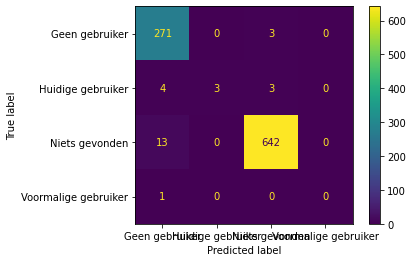

                      precision    recall  f1-score   support

      Geen gebruiker       0.94      0.99      0.96       274
   Huidige gebruiker       1.00      0.30      0.46        10
      Niets gevonden       0.99      0.98      0.99       655
Voormalige gebruiker       0.00      0.00      0.00         1

            accuracy                           0.97       940
           macro avg       0.73      0.57      0.60       940
        weighted avg       0.97      0.97      0.97       940



/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [40]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(train_set['text'], train_set['label'])  
predicted_nb = random_search.predict(test_set['text'])
print(np.mean(predicted_nb == test_set['label']))
cm = confusion_matrix(test_set['label'], predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(test_set['label'], predicted_nb,
    target_names=random_search.classes_))

## Experiment 2

In [38]:
drugs_corpus = drugs_corpus_backup.copy()
stemmer = SnowballStemmer("dutch")
drugs_corpus['text'] = drugs_corpus['text'].str.lower()
drugs_corpus['text'] = [stemmer.stem(text) for text in drugs_corpus['text']]
drugs_corpus['label'] = drugs_corpus['label'].str.replace('Niets gevonden','Geen gebruiker')
drugs_corpus['label'] = drugs_corpus['label'].str.replace('Voormalige gebruiker','Geen gebruiker')
drugs_corpus = drugs_corpus.drop(drugs_corpus[drugs_corpus.label == '--'].index)
drugs_corpus = drugs_corpus.drop(drugs_corpus[drugs_corpus.label == 'Onbekend'].index)
drugs_corpus_backup = drugs_corpus.copy()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(drugs_corpus['text'], drugs_corpus['label'], test_size=0.4, random_state=50, stratify=drugs_corpus['label'])

In [40]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 18.47, NNZs: 2696, Bias: 0.000000, T: 1692, Avg. loss: 0.199440
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 23.45, NNZs: 1399, Bias: 0.000000, T: 3384, Avg. loss: 0.120576
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 27.12, NNZs: 1125, Bias: 0.000000, T: 5076, Avg. loss: 0.106255
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 30.00, NNZs: 927, Bias: 0.000000, T: 6768, Avg. loss: 0.097759
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 32.59, NNZs: 837, Bias: 0.000000, T: 8460, Avg. loss: 0.092464
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 35.08, NNZs: 715, Bias: 0.000000, T: 10152, Avg. loss: 0.088493
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 35.48, NNZs: 683, Bias: 0.000000, T: 11844, Avg. loss: 0.085685
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 35.87, NNZs: 676, Bias: 0.000000, T: 13536, Avg. loss: 0.085222
Total training time: 0.04 seconds.
-- Epoch 9
No

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.496 total time=   1.0s
-- Epoch 1
Norm: 18.82, NNZs: 2774, Bias: 0.000000, T: 1692, Avg. loss: 0.199068
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 23.65, NNZs: 1436, Bias: 0.000000, T: 3384, Avg. loss: 0.119559
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 27.27, NNZs: 1132, Bias: 0.000000, T: 5076, Avg. loss: 0.104558
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 30.40, NNZs: 958, Bias: 0.000000, T: 6768, Avg. loss: 0.095440
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 32.79, NNZs: 840, Bias: 0.000000, T: 8460, Avg. loss: 0.089932
Total training time: 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.497 total time=   1.0s
-- Epoch 1
Norm: 18.07, NNZs: 2704, Bias: 0.000000, T: 1692, Avg. loss: 0.201281
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 23.28, NNZs: 1415, Bias: 0.000000, T: 3384, Avg. loss: 0.121100
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 26.97, NNZs: 1101, Bias: 0.000000, T: 5076, Avg. loss: 0.105554
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 30.06, NNZs: 974, Bias: 0.000000, T: 6768, Avg. loss: 0.096842
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 32.71, NNZs: 864, Bias: 0.000000, T: 8460, Avg. loss: 0.090875
Total training time: 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.497 total time=   1.0s
-- Epoch 1
Norm: 18.66, NNZs: 2893, Bias: 0.000000, T: 1692, Avg. loss: 0.199789
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 24.04, NNZs: 1439, Bias: 0.000000, T: 3384, Avg. loss: 0.118616
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 27.63, NNZs: 1113, Bias: 0.000000, T: 5076, Avg. loss: 0.102587
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 30.63, NNZs: 961, Bias: 0.000000, T: 6768, Avg. loss: 0.094364
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 33.29, NNZs: 841, Bias: 0.000000, T: 8460, Avg. loss: 0.088701
Total training time: 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.497 total time=   1.0s
-- Epoch 1
Norm: 18.43, NNZs: 2651, Bias: 0.000000, T: 1692, Avg. loss: 0.199172
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 23.46, NNZs: 1383, Bias: 0.000000, T: 3384, Avg. loss: 0.121110
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 26.91, NNZs: 1053, Bias: 0.000000, T: 5076, Avg. loss: 0.106703
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 29.72, NNZs: 902, Bias: 0.000000, T: 6768, Avg. loss: 0.097707
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 32.46, NNZs: 802, Bias: 0.000000, T: 8460, Avg. loss: 0.093073
Total training time: 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.496 total time=   1.0s
-- Epoch 1
Norm: 129708398208349.47, NNZs: 15958, Bias: 0.000000, T: 1692, Avg. loss: 3465118249261160573435904.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 82386468135499.41, NNZs: 15958, Bias: 0.000000, T: 3384, Avg. loss: 8254489573177965307494400.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 56500264473418.91, NNZs: 15958, Bias: 0.000000, T: 5076, Avg. loss: 2985567971803376534945792.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 40983830317346.35, NNZs: 15958, Bias: 0.000000, T: 6768, Avg. loss: 1266067714408781229

-- Epoch 1
Norm: 20.84, NNZs: 5189, Bias: 0.000000, T: 1692, Avg. loss: 0.098922
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 24.25, NNZs: 2555, Bias: 0.000000, T: 3384, Avg. loss: 0.018837
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 27.39, NNZs: 1697, Bias: 0.000000, T: 5076, Avg. loss: 0.016303
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 29.92, NNZs: 1356, Bias: 0.000000, T: 6768, Avg. loss: 0.012610
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 32.19, NNZs: 1145, Bias: 0.000000, T: 8460, Avg. loss: 0.010149
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 34.16, NNZs: 1009, Bias: 0.000000, T: 10152, Avg. loss: 0.009694
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
[CV 2/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__p

-- Epoch 1
Norm: 5147458.56, NNZs: 16258, Bias: 0.000000, T: 1692, Avg. loss: 13839620501.327869
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 369052242004.25, NNZs: 16258, Bias: 0.000000, T: 3384, Avg. loss: 33088783671689555968.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 34546936173321.74, NNZs: 16258, Bias: 0.000000, T: 5076, Avg. loss: 568308780723587298361344.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 27410264994667.27, NNZs: 16258, Bias: 0.000000, T: 6768, Avg. loss: 1270426362493890723840000.000000
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 29934611278201.66, NNZs: 16258, Bias: 0.000000, T: 8460, Avg. loss: 1131294266053912577441792.000000
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 30908995010136.66, NNZs: 16258, Bias: 0.000000, T: 10152, Avg. loss: 1553660331940965542526976.000000
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__

-- Epoch 1
Norm: 95.63, NNZs: 27832, Bias: -0.873485, T: 1692, Avg. loss: 0.955375
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 44.53, NNZs: 28079, Bias: -0.715885, T: 3384, Avg. loss: 1.238390
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 35.09, NNZs: 28197, Bias: -0.857775, T: 5076, Avg. loss: 0.393132
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 24.01, NNZs: 28196, Bias: -0.852115, T: 6768, Avg. loss: 0.320709
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 19.63, NNZs: 28201, Bias: -0.939676, T: 8460, Avg. loss: 0.134461
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 15.64, NNZs: 28192, Bias: -0.932215, T: 10152, Avg. loss: 0.072931
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 13.07, NNZs: 28182, Bias: -0.882960, T: 11844, Avg. loss: 0.032707
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 11.83, NNZs: 28172, Bias: -0.897661, T: 13536, Avg. loss: 0.013664
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 11.05, NNZs: 28163, Bias: -0.878288,

-- Epoch 1
Norm: 96.56, NNZs: 8349, Bias: 0.000000, T: 1692, Avg. loss: 1.367029
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 114.74, NNZs: 6083, Bias: 0.000000, T: 3384, Avg. loss: 0.752709
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 131.02, NNZs: 4707, Bias: 0.000000, T: 5076, Avg. loss: 0.476471
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 135.61, NNZs: 3829, Bias: 0.000000, T: 6768, Avg. loss: 0.303964
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 144.83, NNZs: 3429, Bias: 0.000000, T: 8460, Avg. loss: 0.416648
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 148.99, NNZs: 2985, Bias: 0.000000, T: 10152, Avg. loss: 0.284858
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.03 seconds
[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__

-- Epoch 1
Norm: 0.35, NNZs: 16259, Bias: 0.000000, T: 1692, Avg. loss: 0.727358
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.52, NNZs: 16259, Bias: 0.000000, T: 3384, Avg. loss: 0.759480
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 16259, Bias: 0.000000, T: 5076, Avg. loss: 0.775454
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.75, NNZs: 16259, Bias: 0.000000, T: 6768, Avg. loss: 0.787766
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.84, NNZs: 16259, Bias: 0.000000, T: 8460, Avg. loss: 0.798212
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.92, NNZs: 16259, Bias: 0.000000, T: 10152, Avg. loss: 0.807796
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.695 total time=   1.0s
-- Epoch 1
Norm: 41.40, NNZs: 15979, Bias: 0.000000, T: 1692, Avg. loss: 0.841834
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.34, NNZs: 15979, Bias: 0.000000, T: 3384, Avg. loss: 0.287261
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 44.60, NNZs: 15979, Bias: 0.000000, T: 5076, Avg. loss: 0.207921
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 43.08, NNZs: 15979, Bias: 0.000000, T: 6768, Avg. loss: 0.102306
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 41.52, NNZs: 15979, Bias: 0.000000, T: 8460, Avg. loss: 0.077585
Total 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.561 total time=   1.0s
-- Epoch 1
Norm: 39.19, NNZs: 16411, Bias: 0.000000, T: 1692, Avg. loss: 0.813075
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.94, NNZs: 16411, Bias: 0.000000, T: 3384, Avg. loss: 0.235980
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 42.69, NNZs: 16411, Bias: 0.000000, T: 5076, Avg. loss: 0.142817
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 41.17, NNZs: 16411, Bias: 0.000000, T: 6768, Avg. loss: 0.093065
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 39.96, NNZs: 16411, Bias: 0.000000, T: 8460, Avg. loss: 0.078322
Total 

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-- Epoch 1
Norm: 44.65, NNZs: 16258, Bias: 0.000000, T: 1692, Avg. loss: 0.749191
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 46.67, NNZs: 16258, Bias: 0.000000, T: 3384, Avg. loss: 0.334475
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 48.30, NNZs: 16258, Bias: 0.000000, T: 5076, Avg. loss: 0.253952
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 48.73, NNZs: 16258, Bias: 0.000000, T: 6768, Avg. loss: 0.178092
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 46.04, NNZs: 16258, Bias: 0.000000, T: 8460, Avg. loss: 0.082572
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 43.74, NNZs: 16258, Bias: 0.000000, T: 10152, Avg. loss: 0.066176
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 43.31, NNZs: 16258, Bias: 0.000000, T: 11844, Avg. loss: 0.059944
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 42.89, NNZs: 16258, Bias: 0.000000, T: 13536, Avg. loss: 0.061639
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 42.48, NNZs: 16258, Bias: 0.000000, T: 15228

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-- Epoch 1
Norm: 43.70, NNZs: 15894, Bias: 0.000000, T: 1692, Avg. loss: 0.785658
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.96, NNZs: 15894, Bias: 0.000000, T: 3384, Avg. loss: 0.231927
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 43.37, NNZs: 15894, Bias: 0.000000, T: 5076, Avg. loss: 0.133720
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 42.01, NNZs: 15894, Bias: 0.000000, T: 6768, Avg. loss: 0.089134
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 40.64, NNZs: 15894, Bias: 0.000000, T: 8460, Avg. loss: 0.076629
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 39.49, NNZs: 15894, Bias: 0.000000, T: 10152, Avg. loss: 0.072297
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 38.60, NNZs: 15894, Bias: 0.000000, T: 11844, Avg. loss: 0.070866
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 38.40, NNZs: 15894, Bias: 0.000000, T: 13536, Avg. loss: 0.064518
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 38.21, NNZs: 15894, Bias: 0.000000, T: 15228

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-- Epoch 1
Norm: 272.92, NNZs: 14503, Bias: -5.225586, T: 1692, Avg. loss: 7.265153
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 210.27, NNZs: 14731, Bias: -5.144568, T: 3384, Avg. loss: 1.900156
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 172.82, NNZs: 14877, Bias: -4.902050, T: 5076, Avg. loss: 0.452705
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 148.45, NNZs: 14904, Bias: -4.809943, T: 6768, Avg. loss: 0.612026
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 133.08, NNZs: 14908, Bias: -4.704384, T: 8460, Avg. loss: 0.388061
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 111.45, NNZs: 14928, Bias: -5.000153, T: 10152, Avg. loss: 0.077611
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
[CV 1/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.21123614325601048, clf__eta0=0.32979731781585486, clf__fit_intercept=True, clf__l1_ratio=0.4775095579144826, clf__learning_rate=optimal, clf__loss=perceptron, clf__

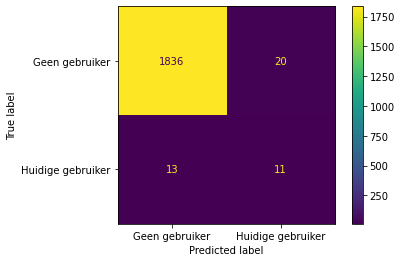

                   precision    recall  f1-score   support

   Geen gebruiker       0.99      0.99      0.99      1856
Huidige gebruiker       0.35      0.46      0.40        24

         accuracy                           0.98      1880
        macro avg       0.67      0.72      0.70      1880
     weighted avg       0.98      0.98      0.98      1880



In [41]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))